<a href="https://colab.research.google.com/github/jean18/INF395-2021-1/blob/main/Tarea2/ANN_2021_1_Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.inf.utfsm.cl/images/slides/Departamento-de-Informtica_HORIZONTAL.png" title="Title text" width="80%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2021 </h1>

<H3 align='center'> Tarea 2 - Redes Neuronales y Deep Learning </H3>
<hr style="height:2px;border:none"/>

## **Temas**  

* Arquitecturas de Redes Convolucionales. 
* Entrenamiento de Redes Convolucionales.
* Regularización.
* Tasas adaptivas, Batchnormalization.
* Problemas Especiales.

## **Formalidades**  

* Equipos de trabajo de 3 personas ya inscritos para la tarea anterior (de existir algún cambio, por favor avisar a la brevedad).
* Formato de entrega: envı́o de Jupyter notebook y link de video Youtube o plataforma a convenir, todo esto vía Aula. 
* Cada persona debe estar en condiciones de realizar una presentación del trabajo realizado por su equipo y responder preguntas sobre el mismo. El día de la defensa oral serán seleccionados 4-5 presentadores aleatoriamente de entre la clase.
* La tarea tiene 2 partes: una pregunta de investigación donde se evalúa la metodología adoptada y un competencia donde pesa más el resultado y el ranking obtenido. 
* Fecha de Entrega de Código: 9 de Julio de 2021 23:59:00 Hrs.
* Fecha de Defensa Oral: 9 de Julio  de 2021 en horario de clases.
* Fecha de Entrega de Video: 9 de Julio  de 2021 23:59:00 Hrs.

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 2 de Julio en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 26 de Junio, horario de clases.
* Fecha de entrega de vídeo: 2 días antes de encuentro.
* Fecha de entrega de Jypter (notebook): commits hasta 2 días antes del encuentro. 
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Pregunta Libre   
[2.](#segundo) Challenge Kaggle


## **1. Pregunta de Investigación**

> **12. Arquitectura de una CNN**: Añadir skip connections a una red convolucional generalmente mejora su desempeño en la tarea de interés.  






### Librerias

In [ ]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import matplotlib.image as mpimg
import tensorflow as tf
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Layer, Dense, BatchNormalization, Dropout, MaxPool2D, Conv2D, Flatten, GlobalAveragePooling2D, Add, Concatenate, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from IPython.display import Image

In [ ]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

# Esta es la ruta en mi drive
path = '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2/'

Mounting your Google Drive ...
Mounted at /content/drive


### Arquitectura a testear

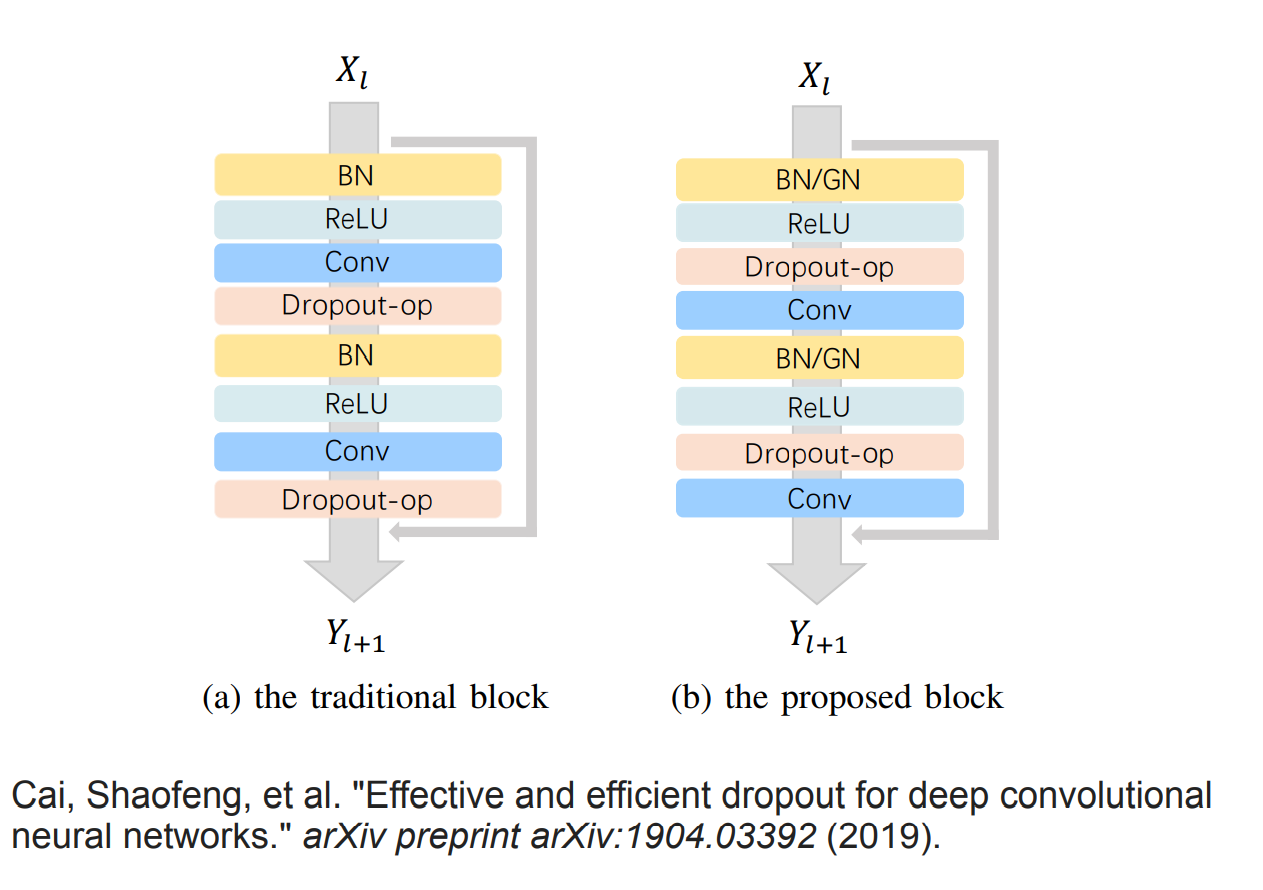

In [ ]:
Image(path + "residual_block_2019.png", width=600)

In [ ]:
class ResidualBlock(Layer):

    def __init__(self, rate, **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.rate = rate
        
    def build(self, input_shape):
        
        self.batch_norm_1 = BatchNormalization(input_shape = input_shape)
        self.conv2d_1 = Conv2D(filters=input_shape[-1], kernel_size=(3, 3), padding='SAME')
        self.batch_norm_2 = BatchNormalization()
        self.conv2d_2 = Conv2D(filters=input_shape[-1], kernel_size=(3, 3), padding='SAME')
        
        
    def call(self, inputs, training=False):
      
        h = self.batch_norm_1(inputs, training = training)
        h = tf.nn.relu(h)

        if training:
          tf.nn.dropout(h, rate=self.rate)

        h = self.conv2d_1(h)
        h = self.batch_norm_2(h, training = training)
        h = tf.nn.relu(h)

        if training:
          tf.nn.dropout(h, rate=self.rate)

        h = self.conv2d_2(h)
        
        return Add()([inputs, h])

class ResidualBlockSinSkip(Layer):

    def __init__(self, rate, **kwargs):
        super(ResidualBlockSinSkip, self).__init__(**kwargs)
        self.rate = rate
        
    def build(self, input_shape):
        
        self.batch_norm_1 = BatchNormalization(input_shape = input_shape)
        self.conv2d_1 = Conv2D(filters=input_shape[-1], kernel_size=(3, 3), padding='SAME')
        self.batch_norm_2 = BatchNormalization()
        self.conv2d_2 = Conv2D(filters=input_shape[-1], kernel_size=(3, 3), padding='SAME')
        
        
    def call(self, inputs, training=False):
      
        h = self.batch_norm_1(inputs, training = training)
        h = tf.nn.relu(h)

        if training:
          tf.nn.dropout(h, rate=self.rate)

        h = self.conv2d_1(h)
        h = self.batch_norm_2(h, training = training)
        h = tf.nn.relu(h)

        if training:
          tf.nn.dropout(h, rate=self.rate)

        h = self.conv2d_2(h)
        
        return h

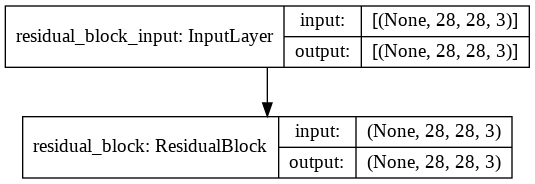

In [ ]:
test_block = Sequential([ResidualBlock(input_shape=(28, 28, 3), rate=0.1, name="residual_block")])

tf.keras.utils.plot_model(test_block, 'test_block.png', show_shapes=True)

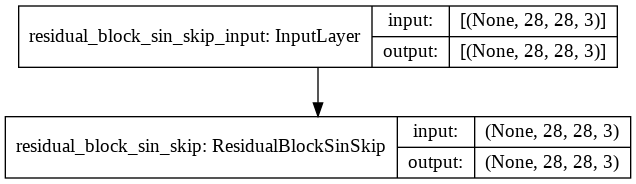

In [ ]:
test_block = Sequential([ResidualBlockSinSkip(input_shape=(28, 28, 3), rate=0.1, name="residual_block_sin_skip")])

tf.keras.utils.plot_model(test_block, 'test_block.png', show_shapes=True)

In [ ]:
class TransitionLayer(Layer):

    def __init__(self, **kwargs):
        super(TransitionLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        
        self.batch_norm_1 = BatchNormalization(input_shape = input_shape)
        self.conv2d_1 = Conv2D(filters=input_shape[-1] // 2, kernel_size=(1, 1))
        self.batch_norm_2 = BatchNormalization()
        self.avg_pool2d_1 = AveragePooling2D(pool_size=(2, 2), strides=2)
        
        
    def call(self, inputs, training=False):
      
        h = self.batch_norm_1(inputs, training = training)
        h = tf.nn.relu(h)
        h = self.conv2d_1(h)
        h = self.batch_norm_2(h, training = training)
        h = tf.nn.relu(h)
        h = self.avg_pool2d_1(h)
        
        return h

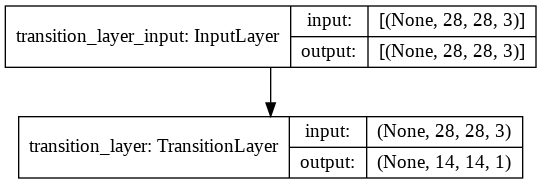

In [ ]:
test_block = Sequential([TransitionLayer(input_shape=(28, 28, 3), name="transition_layer")])

tf.keras.utils.plot_model(test_block, 'test_block.png', show_shapes=True)

In [ ]:
class DataAugmentation(Layer):

  def __init__(self, rgb):

    super(DataAugmentation, self).__init__()
    self.rgb = rgb
    
  def call(self, image, training=False): # Data augmentation only in training
    
    if training: 

      if self.rgb:

        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_contrast(image, 0.5, 1.5)
        image = tf.image.random_saturation(image, 0.7, 1.4)
        image = tf.image.random_brightness(image, 0.2)
        image = tf.clip_by_value(image, 0., 1.)

      else:
        
        image = tf.image.random_flip_left_right(image)

    return image

In [ ]:
def get_model(input_shape, repeticion, num_classes, residual_block, data_augmentation, seed):

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  if(data_augmentation):
    h = DataAugmentation(rgb=True)(inputs)
    h = Conv2D(filters=64, kernel_size=(7, 7), strides=2, activation='relu', name='conv2d_1')(h)

  else:
    h = Conv2D(filters=64, kernel_size=(7, 7), strides=2, activation='relu', name='conv2d_1')(inputs)

  h = MaxPool2D(pool_size=(3, 3), strides=2)(h)

  for i in range(1, 2*(repeticion + 1)):
    h = Conv2D(filters=16 * i // 2, kernel_size=(1, 1), activation='relu', name=f'conv2d_{i+1}')(h)
    h = residual_block(rate=0.1, name=f'residual_block_{i}')(h)

  h = TransitionLayer(name='transition_layer_1')(h)
  h = Flatten()(h)
  h = Dense(512, activation='relu', name='dense_1')(h)

  outputs = Dense(num_classes, activation='softmax', name='dense_output')(h)

  model = Model(inputs=inputs, outputs=outputs)

  return model

In [ ]:
model1 = get_model(input_shape=(32, 32, 1), repeticion=4, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False,
                  seed=1)

model1.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        3200      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 8)           520       
_________________________________________________________________
residual_block_1 (ResidualBl (None, 6, 6, 8)           1232      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          144       
_________________________________________________________________
residual_block_2 (ResidualBl (None, 6, 6, 16)          476

In [ ]:
model2 = get_model(input_shape=(32, 32, 1), repeticion=4, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False,
                  seed=1)

model2.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        3200      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 8)           520       
_________________________________________________________________
residual_block_1 (ResidualBl (None, 6, 6, 8)           1232      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          144       
_________________________________________________________________
residual_block_2 (ResidualBl (None, 6, 6, 16)          476

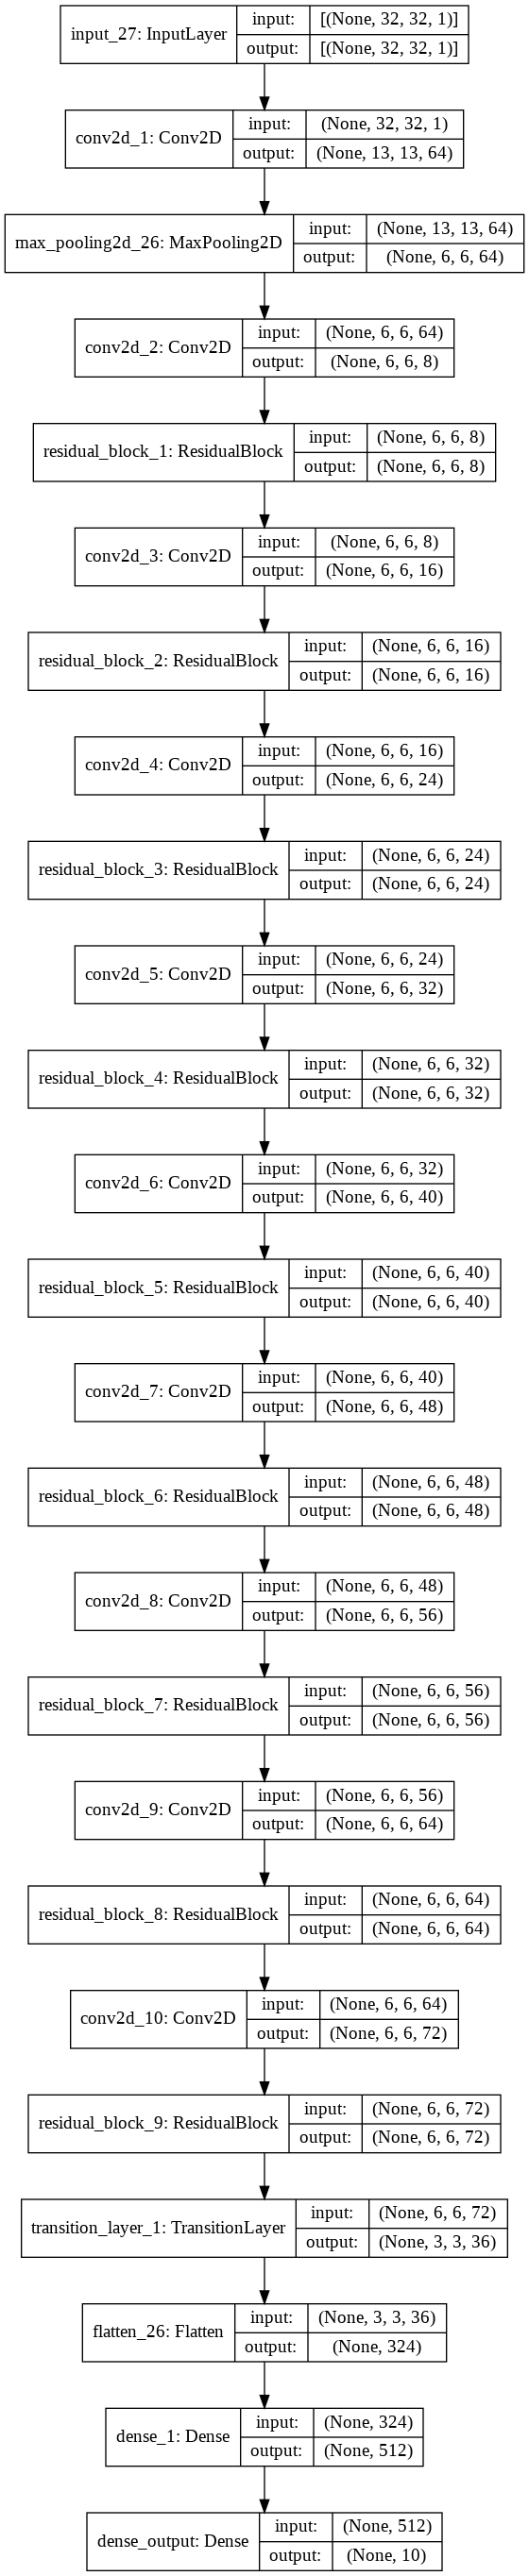

In [ ]:
tf.keras.utils.plot_model(model2, 'model.png', show_shapes=True)

In [ ]:
model3 = get_model(input_shape=(32, 32, 1), repeticion=8, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=1)

model3.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        3200      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 8)           520       
_________________________________________________________________
residual_block_1 (ResidualBl (None, 6, 6, 8)           1232      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          144       
_________________________________________________________________
residual_block_2 (ResidualBl (None, 6, 6, 16)          476

In [ ]:
model4 = get_model(input_shape=(32, 32, 1), repeticion=8, num_classes=10, 
                  residual_block=ResidualBlock, 
                  data_augmentation=False,
                  seed=1)

model4.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        3200      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 8)           520       
_________________________________________________________________
residual_block_1 (ResidualBl (None, 6, 6, 8)           1232      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          144       
_________________________________________________________________
residual_block_2 (ResidualBl (None, 6, 6, 16)          476

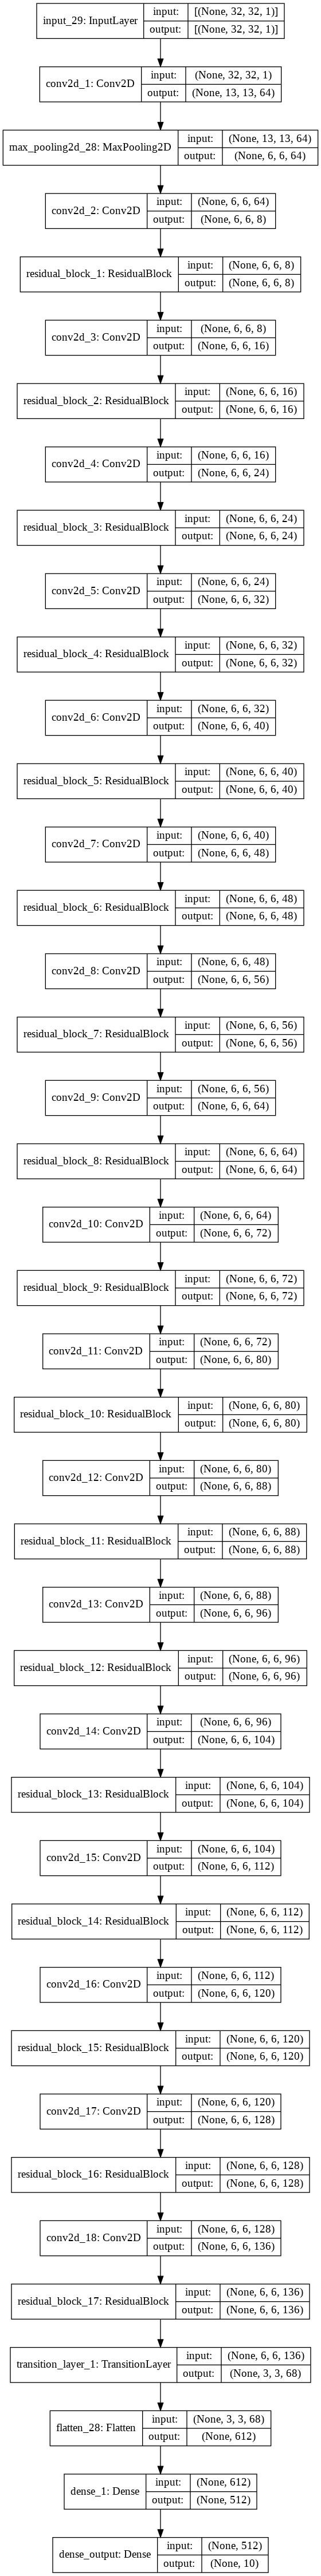

In [ ]:
tf.keras.utils.plot_model(model4, 'model.png', show_shapes=True)

### The Street View House Numbers (SVHN) Dataset

* http://ufldl.stanford.edu/housenumbers/

Este es un dataset de mas de 600.000 digitos en total, y es un conjunto de datos mas dificil que el MNIST, ya que las imagenes estan sacadas desde Google Street View.

In [ ]:
train = loadmat(path + '/train_32x32.mat')
test = loadmat(path + '/test_32x32.mat')

In [ ]:
x_train, y_train = train['X'], train['y']
x_test, y_test = test['X'], test['y']

In [ ]:
# shape of data
print('x_train shape: ' + str(x_train.shape))
print('y_train shape: ' + str(y_train.shape))
print('x_test shape: ' + str(x_test.shape))
print('y_test shape: ' + str(y_test.shape))

x_train shape: (32, 32, 3, 73257)
y_train shape: (73257, 1)
x_test shape: (32, 32, 3, 26032)
y_test shape: (26032, 1)


In [ ]:
# reshape the data
x_train = np.transpose(x_train, [3, 0, 1, 2]) # from HWCN to NHWC
y_train = np.reshape(y_train, -1) 
x_test = np.transpose(x_test, [3, 0, 1, 2])
y_test = np.reshape(y_test, -1)
print('x_train new shape: ' + str(x_train.shape))
print('y_train new shape: ' + str(y_train.shape))
print('x_test new shape: ' + str(x_test.shape))
print('y_test new shape: ' + str(y_test.shape))

x_train new shape: (73257, 32, 32, 3)
y_train new shape: (73257,)
x_test new shape: (26032, 32, 32, 3)
y_test new shape: (26032,)


In [ ]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [ ]:
# label '0' -> 10
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [ ]:
# use one hot enconding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

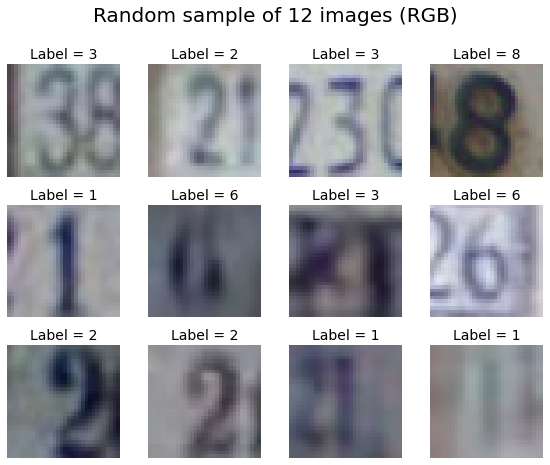

In [ ]:
# select a random sample of images and corresponding labels

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(8, 6))

# title
fig.suptitle('Random sample of 12 images (RGB)', fontsize=20, y=1.07)

# Select 12 random images without duplicates (replace=False)
random=np.random.choice(x_train.shape[0], 12, replace=False)

for i, axi in enumerate(ax.flat):

    img = x_train[random[i], :, :, :]
    axi.set_axis_off()
    axi.imshow(img)
    axi.set_title('Label = {}'.format(np.argmax(y_train[random[i]], axis=0)), fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# convert the training and test images to grayscale and rescale the image values
x_train_gs = np.mean(x_train, axis=-1, keepdims=True)/255.0 #[0,1]
x_test_gs = np.mean(x_test, axis=-1, keepdims=True)/255.0 #[0,1]

#### Semilla 123

In [ ]:
model1 = get_model(input_shape=x_train_gs[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=123)

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model2 = get_model(input_shape=x_train_gs[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=123)


model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model3 = get_model(input_shape=x_train_gs[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=123)

model3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model4 = get_model(input_shape=x_train_gs[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=123)

model4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history2 = model2.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history3 = model3.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history4 = model4.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)

In [ ]:
df1 = pd.DataFrame(history1.history)
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
df4 = pd.DataFrame(history4.history)

In [ ]:
def plot(df1, df2, df3, df4):

  # create figure (fig), and array of axes (ax)
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
  ax = ax.flatten()
  fig.suptitle('Learning curves in training set', fontsize=16, y=1.04)


  ax[0].plot(df1.index, df1['loss'], label='model1_loss')
  ax[0].plot(df1.index, df1['val_loss'], label='model1_val_loss')
  ax[0].plot(df2.index, df2['loss'], '--', label='model2_loss')
  ax[0].plot(df2.index, df2['val_loss'], '--', label='model2_val_loss')
  ax[0].set_title('Model 1 y 2: Loss vs Epoch', fontsize=13)
  ax[0].set_ylabel('Loss')
  ax[0].set_xlabel('Epoch')
  ax[0].legend()

  ax[1].plot(df1.index, df1['accuracy'], label='model1_acc')
  ax[1].plot(df1.index, df1['val_accuracy'], label='model1_val_acc')
  ax[1].plot(df2.index, df2['accuracy'], '--', label='model2_acc')
  ax[1].plot(df2.index, df2['val_accuracy'], '--', label='model2_val_acc')
  ax[1].set_title('Model 1 y 2: Accuracy vs Epoch', fontsize=13)
  ax[1].set_ylabel('Accuracy')
  ax[1].set_xlabel('Epoch')
  ax[1].legend()

  ax[2].plot(df3.index, df3['loss'], label='model3_loss')
  ax[2].plot(df3.index, df3['val_loss'], label='model3_val_loss')
  ax[2].plot(df4.index, df4['loss'], '--', label='model4_loss')
  ax[2].plot(df4.index, df4['val_loss'], '--', label='model4_val_loss')
  ax[2].set_title('Model 3 y 4: Loss vs Epoch', fontsize=13)
  ax[2].set_ylabel('Loss')
  ax[2].set_xlabel('Epoch')
  ax[2].legend()

  ax[3].plot(df3.index, df3['accuracy'], label='model3_acc')
  ax[3].plot(df3.index, df3['val_accuracy'], label='model3_val_acc')
  ax[3].plot(df4.index, df4['accuracy'], '--', label='model4_acc')
  ax[3].plot(df4.index, df4['val_accuracy'], '--', label='model4_val_acc')
  ax[3].set_title('Model 1 y 2: Accuracy vs Epoch', fontsize=13)
  ax[3].set_ylabel('Accuracy')
  ax[3].set_xlabel('Epoch')
  ax[3].legend()

  plt.tight_layout()
  plt.legend()
  plt.show()

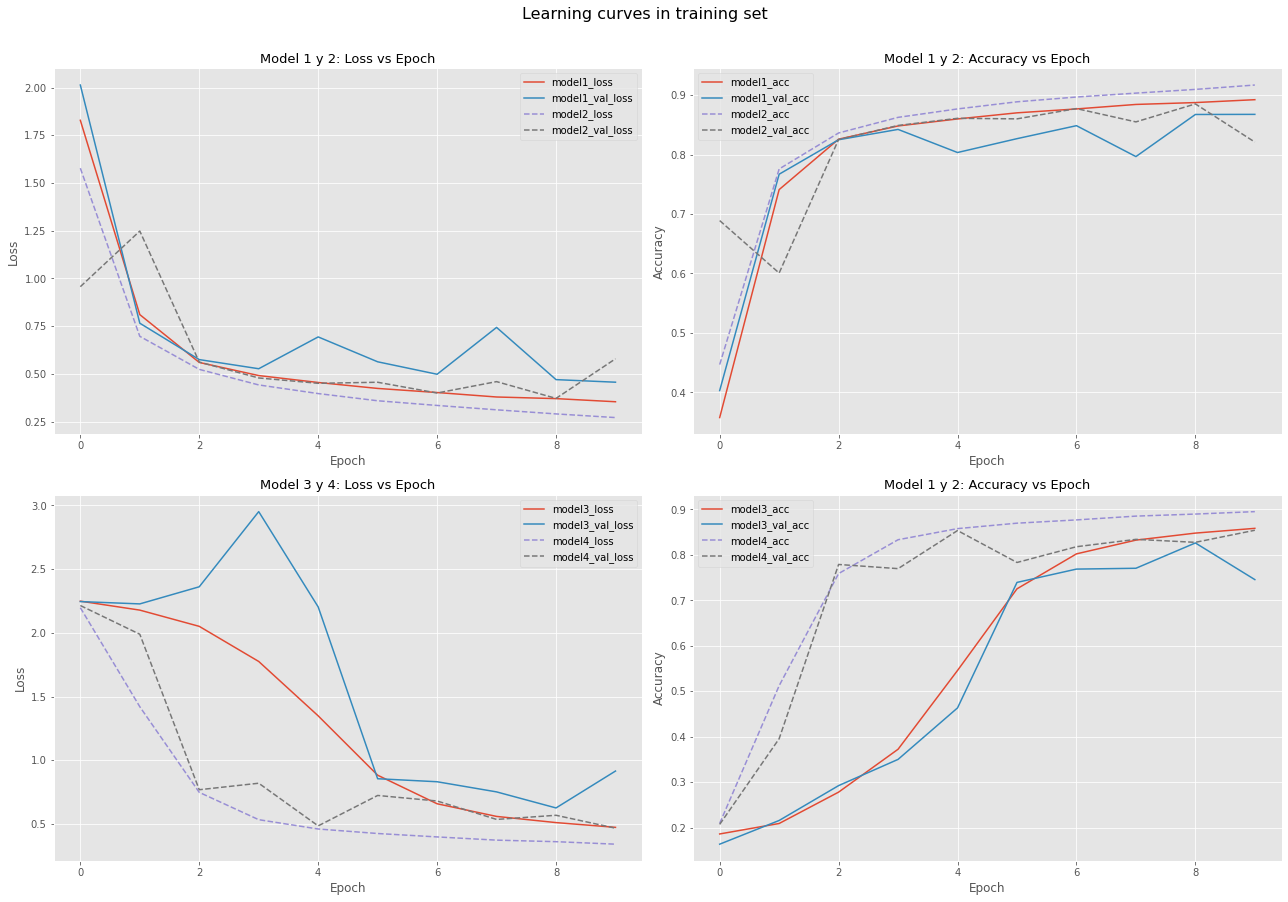

In [ ]:
plot(df1, df2, df3, df4)

In [ ]:
print(f'Model 1 (Sin Skip)| loss: {model1.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model1.evaluate(x_test_gs, y_test, verbose=False)[1]}')
print(f'Model 2 (Con Skip)| loss: {model2.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model2.evaluate(x_test_gs, y_test, verbose=False)[1]}')
print(f'Model 3 (Sin Skip)| loss: {model3.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model3.evaluate(x_test_gs, y_test, verbose=False)[1]}')
print(f'Model 4 (Con Skip)| loss: {model4.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model4.evaluate(x_test_gs, y_test, verbose=False)[1]}')

Model 1 (Sin Skip)| loss: 0.440780371427536, acc: 0.8727719783782959
Model 2 (Con Skip)| loss: 0.5777496695518494, acc: 0.818838357925415
Model 3 (Sin Skip)| loss: 0.9180085062980652, acc: 0.7442762851715088
Model 4 (Con Skip)| loss: 0.47815170884132385, acc: 0.850799024105072


#### Semilla 12

In [ ]:
model1 = get_model(input_shape=x_train_gs[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=12)

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model2 = get_model(input_shape=x_train_gs[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=12)


model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model3 = get_model(input_shape=x_train_gs[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=12)

model3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model4 = get_model(input_shape=x_train_gs[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=12)

model4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history2 = model2.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history3 = model3.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history4 = model4.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)

In [ ]:
df1 = pd.DataFrame(history1.history)
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
df4 = pd.DataFrame(history4.history)

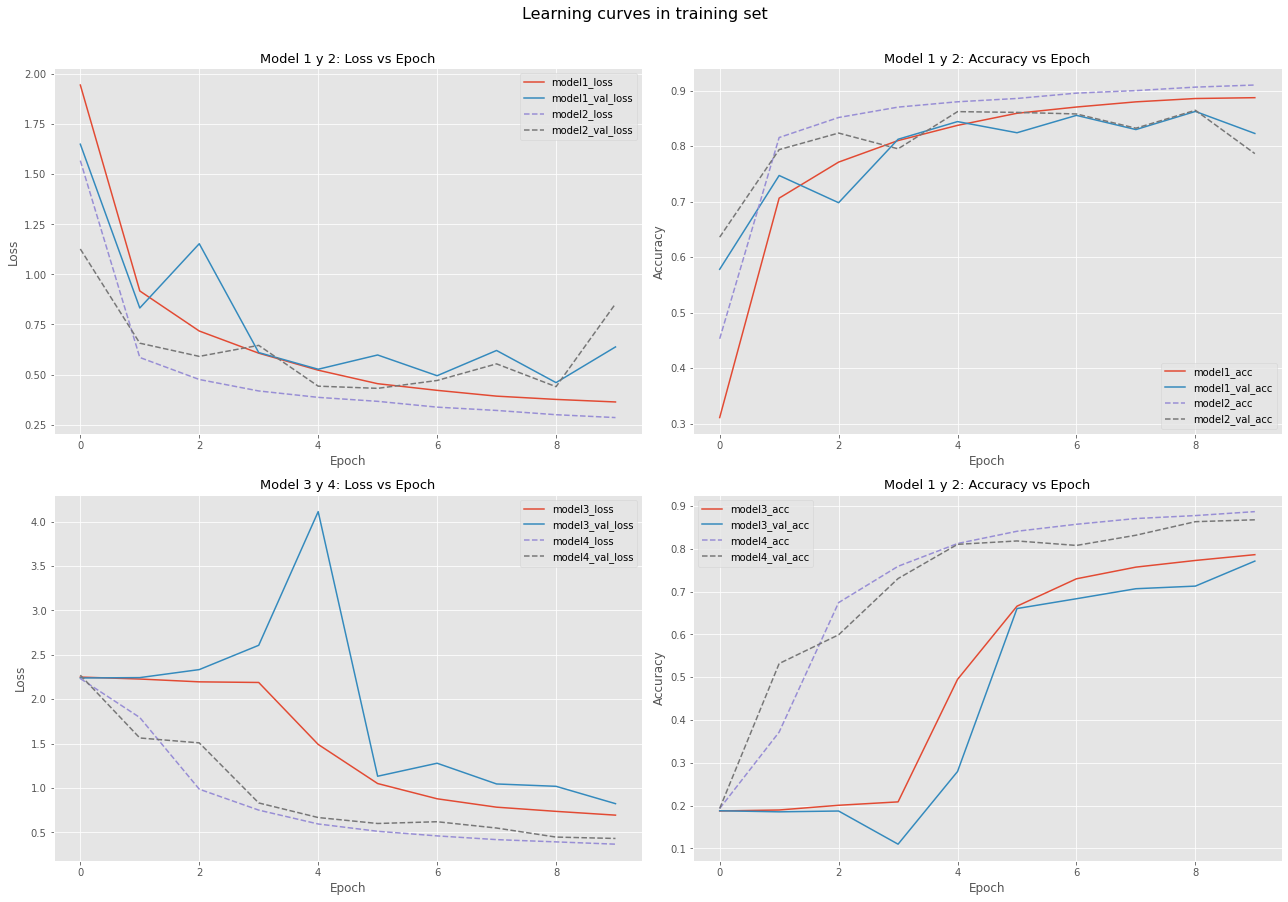

In [ ]:
plot(df1, df2, df3, df4)

In [ ]:
print(f'Model 1 (Sin Skip)| loss: {model1.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model1.evaluate(x_test_gs, y_test, verbose=False)[1]}')
print(f'Model 2 (Con Skip)| loss: {model2.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model2.evaluate(x_test_gs, y_test, verbose=False)[1]}')
print(f'Model 3 (Sin Skip)| loss: {model3.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model3.evaluate(x_test_gs, y_test, verbose=False)[1]}')
print(f'Model 4 (Con Skip)| loss: {model4.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model4.evaluate(x_test_gs, y_test, verbose=False)[1]}')

Model 1 (Sin Skip)| loss: 0.5773566365242004, acc: 0.8374308347702026
Model 2 (Con Skip)| loss: 0.7800803780555725, acc: 0.7953288555145264
Model 3 (Sin Skip)| loss: 0.8585373163223267, acc: 0.7518438696861267
Model 4 (Con Skip)| loss: 0.44731274247169495, acc: 0.8662799596786499


#### Semilla 1

In [ ]:
model1 = get_model(input_shape=x_train_gs[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=1)

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model2 = get_model(input_shape=x_train_gs[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=1)


model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model3 = get_model(input_shape=x_train_gs[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=1)

model3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model4 = get_model(input_shape=x_train_gs[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=1)

model4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history2 = model2.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history3 = model3.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history4 = model4.fit(x_train_gs, y_train, epochs=10, batch_size=128, validation_split=0.15, verbose=False)

In [ ]:
df1 = pd.DataFrame(history1.history)
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
df4 = pd.DataFrame(history4.history)

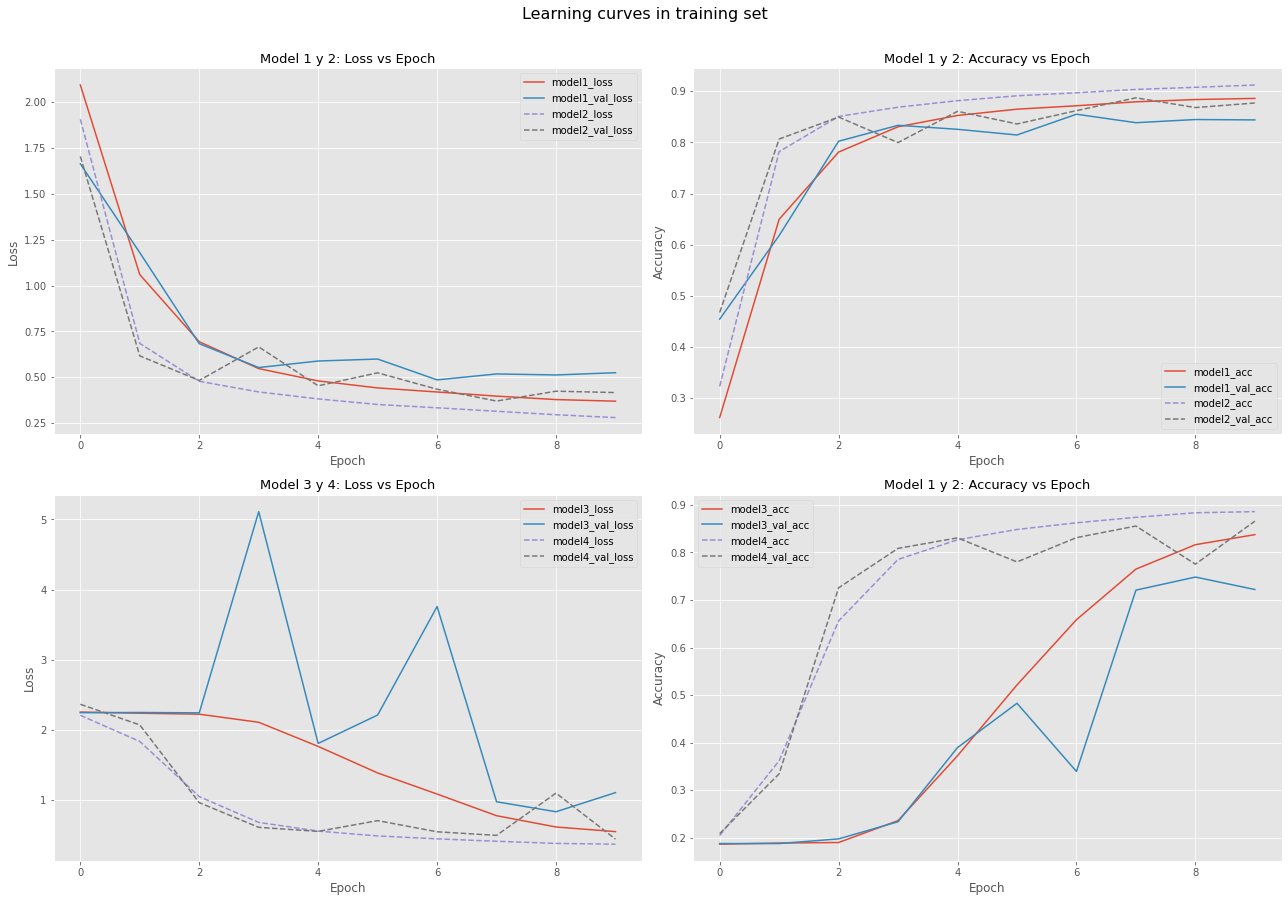

In [ ]:
plot(df1, df2, df3, df4)

In [ ]:
print(f'Model 1 (Sin Skip)| loss: {model1.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model1.evaluate(x_test_gs, y_test, verbose=False)[1]}')
print(f'Model 2 (Con Skip)| loss: {model2.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model2.evaluate(x_test_gs, y_test, verbose=False)[1]}')
print(f'Model 3 (Sin Skip)| loss: {model3.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model3.evaluate(x_test_gs, y_test, verbose=False)[1]}')
print(f'Model 4 (Con Skip)| loss: {model4.evaluate(x_test_gs, y_test, verbose=False)[0]}, acc: {model4.evaluate(x_test_gs, y_test, verbose=False)[1]}')

Model 1 (Sin Skip)| loss: 0.5510457754135132, acc: 0.8366625905036926
Model 2 (Con Skip)| loss: 0.44295963644981384, acc: 0.8662799596786499
Model 3 (Sin Skip)| loss: 1.0492504835128784, acc: 0.7190765142440796
Model 4 (Con Skip)| loss: 0.4463930130004883, acc: 0.8653964400291443


### Dogs vs Cats

* https://www.kaggle.com/c/dogs-vs-cats/data

Este es un dataset que fue utilizado en una competencia de kaggle hace 7 años, consiste en 25000 imagenes de gatos y perros, pero en este caso solo utilizaremos solo un conjunto de este, lo cual corresponde a 600 imagenes.

In [ ]:
# unzip the folder
!unzip -o -q '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2/lsun.zip'

In [ ]:
images_train = np.load(path + '/images_train.npy') / 255.
images_valid = np.load(path + '/images_valid.npy') / 255.
images_test = np.load(path + '/images_test.npy') / 255.

labels_train = np.load(path + '/labels_train.npy')
labels_valid = np.load(path + '/labels_valid.npy')
labels_test = np.load(path + '/labels_test.npy')

In [ ]:
labels_train = to_categorical(labels_train, num_classes=2)
labels_valid = to_categorical(labels_valid, num_classes=2)
labels_test = to_categorical(labels_test, num_classes=2)

In [ ]:
print(f"Training shape: {images_train.shape}")
print(f"Validation shape: {images_valid.shape}")
print(f"Test shape: {images_test.shape}")

Training shape: (600, 160, 160, 3)
Validation shape: (300, 160, 160, 3)
Test shape: (300, 160, 160, 3)


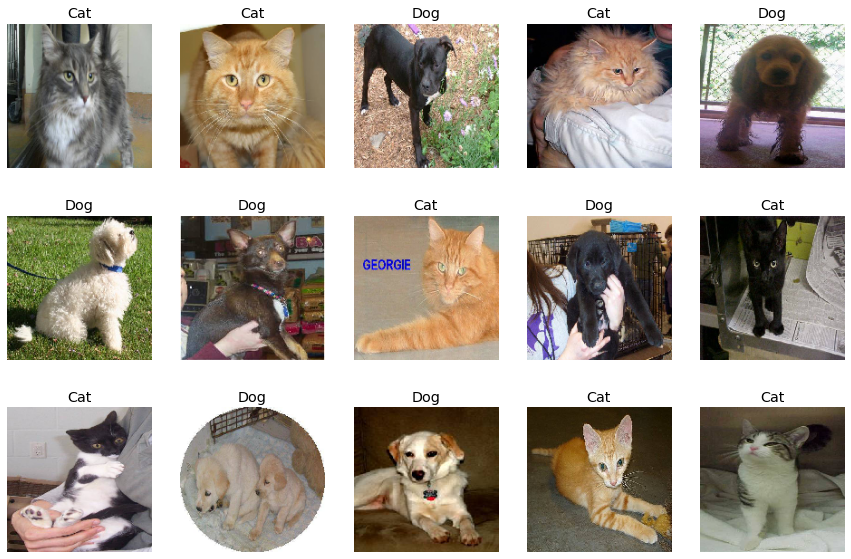

In [ ]:
class_names = np.array(['Dog', 'Cat'])

plt.figure(figsize=(15,10))
inx = np.random.choice(images_train.shape[0], 15, replace=False)
for n, i in enumerate(inx):
    ax = plt.subplot(3, 5, n+1)
    plt.imshow(images_train[i])
    plt.title(class_names[np.where(labels_train[i] == 1.)[0][0]])
    plt.axis('off')

#### Semilla 123

In [ ]:
model1 = get_model(input_shape=(160, 160, 3), repeticion=4, num_classes=2, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=True, 
                  seed=123)

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model2 = get_model(input_shape=(160, 160, 3), repeticion=4, num_classes=2, 
                  residual_block=ResidualBlock,
                  data_augmentation=True, 
                  seed=123)


model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model3 = get_model(input_shape=(160, 160, 3), repeticion=8, num_classes=2, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=True, 
                  seed=123)

model3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model4 = get_model(input_shape=(160, 160, 3), repeticion=8, num_classes=2, 
                  residual_block=ResidualBlock,
                  data_augmentation=True, 
                  seed=123)

model4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model1.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)
history2 = model2.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)
history3 = model3.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)
history4 = model4.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)

In [ ]:
df1 = pd.DataFrame(history1.history)
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
df4 = pd.DataFrame(history4.history)

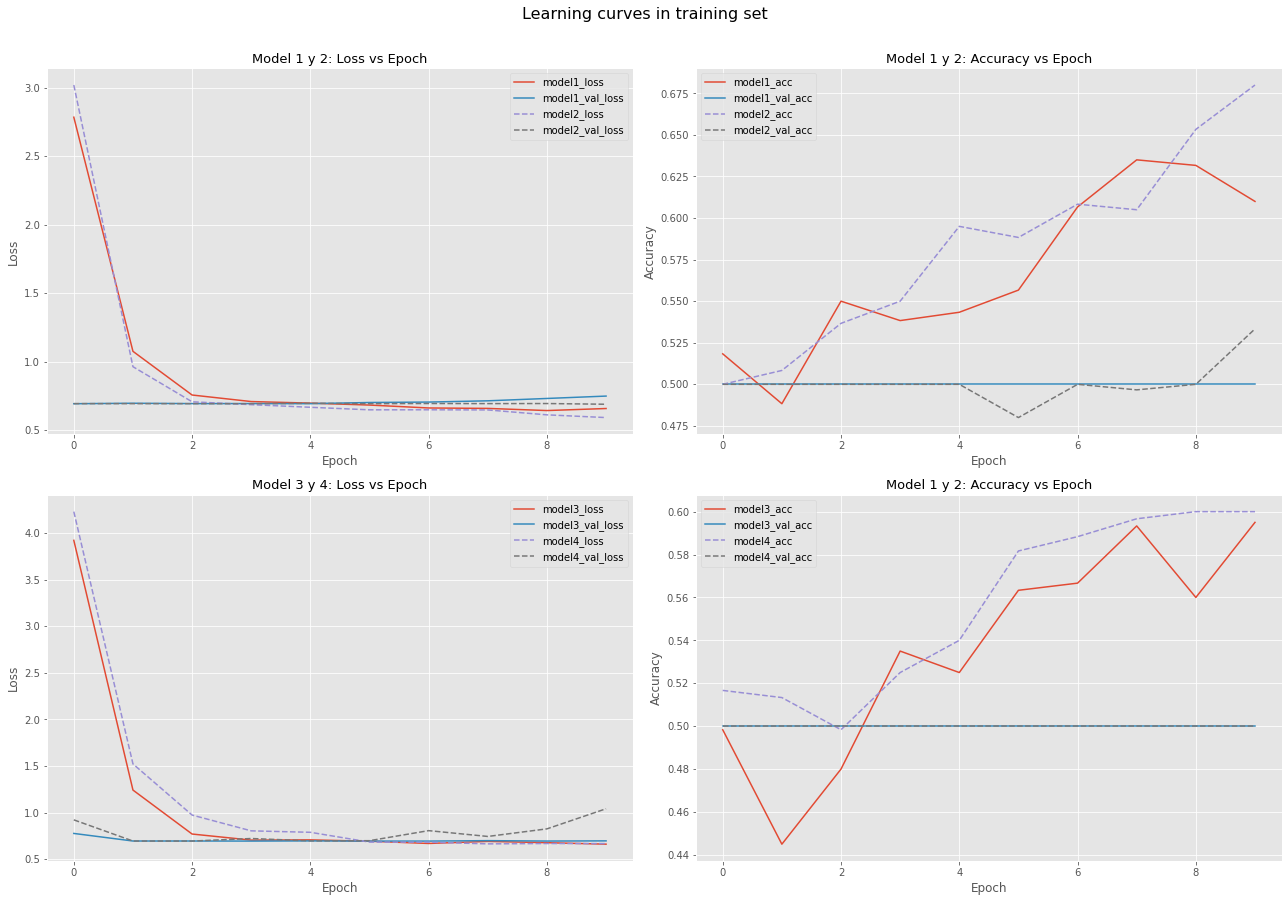

In [ ]:
plot(df1, df2, df3, df4)

In [ ]:
print(f'Model 1 (Sin Skip)| loss: {model1.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model1.evaluate(images_test, labels_test, verbose=False)[1]}')
print(f'Model 2 (Con Skip)| loss: {model2.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model2.evaluate(images_test, labels_test, verbose=False)[1]}')
print(f'Model 3 (Sin Skip)| loss: {model3.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model3.evaluate(images_test, labels_test, verbose=False)[1]}')
print(f'Model 4 (Con Skip)| loss: {model4.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model4.evaluate(images_test, labels_test, verbose=False)[1]}')

Model 1 (Sin Skip)| loss: 0.7488691210746765, acc: 0.5
Model 2 (Con Skip)| loss: 0.6884331703186035, acc: 0.5333333611488342
Model 3 (Sin Skip)| loss: 0.6955482363700867, acc: 0.5
Model 4 (Con Skip)| loss: 1.0416768789291382, acc: 0.5


#### Semmilla  12

In [ ]:
model1 = get_model(input_shape=(160, 160, 3), repeticion=4, num_classes=2, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=True, 
                  seed=12)

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model2 = get_model(input_shape=(160, 160, 3), repeticion=4, num_classes=2, 
                  residual_block=ResidualBlock,
                  data_augmentation=True, 
                  seed=12)


model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model3 = get_model(input_shape=(160, 160, 3), repeticion=8, num_classes=2, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=True, 
                  seed=12)

model3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model4 = get_model(input_shape=(160, 160, 3), repeticion=8, num_classes=2, 
                  residual_block=ResidualBlock,
                  data_augmentation=True, 
                  seed=12)

model4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model1.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)
history2 = model2.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)
history3 = model3.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)
history4 = model4.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)

In [ ]:
df1 = pd.DataFrame(history1.history)
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
df4 = pd.DataFrame(history4.history)

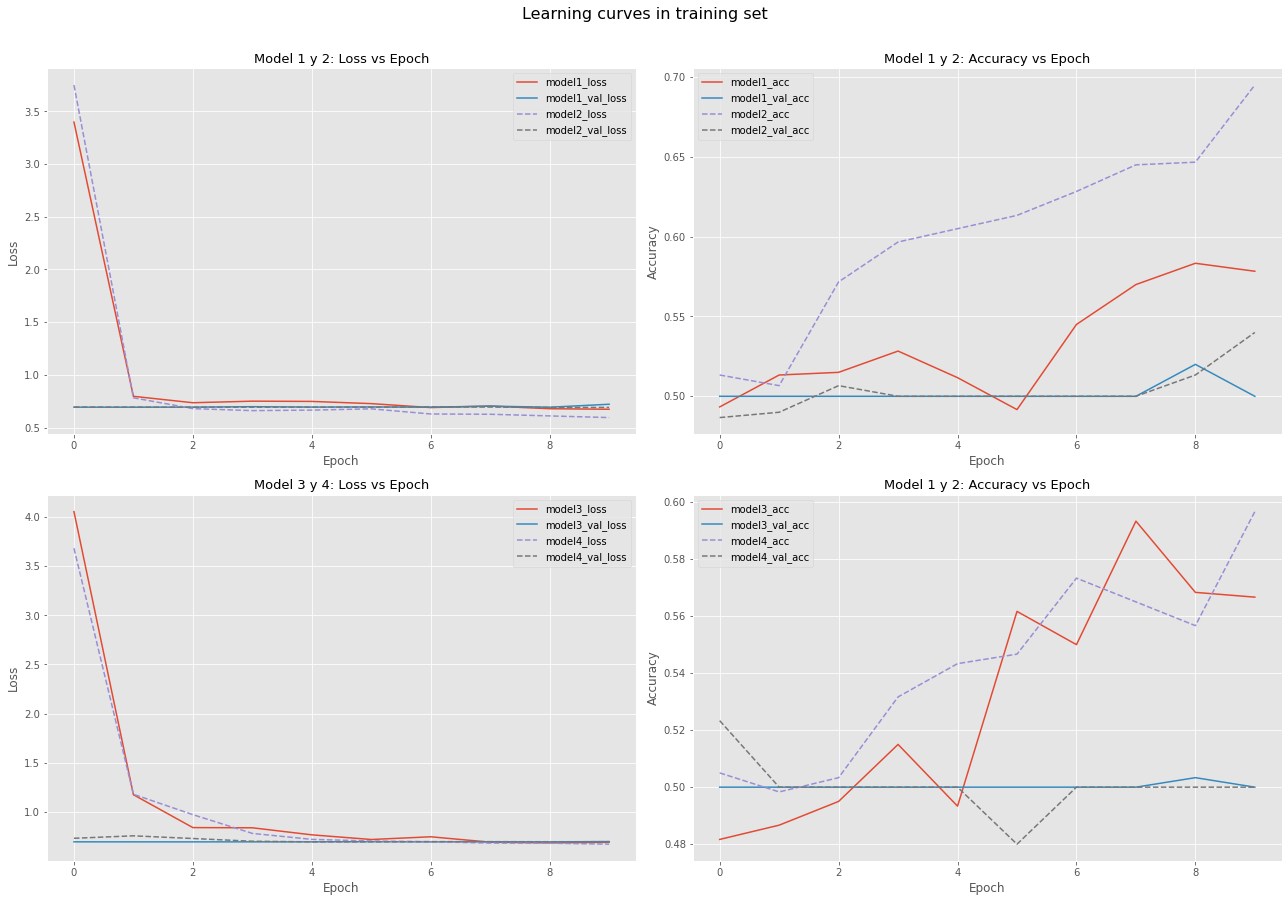

In [ ]:
plot(df1, df2, df3, df4)

In [ ]:
print(f'Model 1 (Sin Skip)| loss: {model1.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model1.evaluate(images_test, labels_test, verbose=False)[1]}')
print(f'Model 2 (Con Skip)| loss: {model2.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model2.evaluate(images_test, labels_test, verbose=False)[1]}')
print(f'Model 3 (Sin Skip)| loss: {model3.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model3.evaluate(images_test, labels_test, verbose=False)[1]}')
print(f'Model 4 (Con Skip)| loss: {model4.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model4.evaluate(images_test, labels_test, verbose=False)[1]}')

Model 1 (Sin Skip)| loss: 0.7212678790092468, acc: 0.5
Model 2 (Con Skip)| loss: 0.6907687783241272, acc: 0.4933333396911621
Model 3 (Sin Skip)| loss: 0.6962972283363342, acc: 0.5
Model 4 (Con Skip)| loss: 0.6936527490615845, acc: 0.5


#### Semilla 1

In [ ]:
model1 = get_model(input_shape=(160, 160, 3), repeticion=4, num_classes=2, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=True, 
                  seed=1)

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model2 = get_model(input_shape=(160, 160, 3), repeticion=4, num_classes=2, 
                  residual_block=ResidualBlock,
                  data_augmentation=True, 
                  seed=1)


model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model3 = get_model(input_shape=(160, 160, 3), repeticion=8, num_classes=2, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=True, 
                  seed=1)

model3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model4 = get_model(input_shape=(160, 160, 3), repeticion=8, num_classes=2, 
                  residual_block=ResidualBlock,
                  data_augmentation=True, 
                  seed=1)

model4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model1.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)
history2 = model2.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)
history3 = model3.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)
history4 = model4.fit(images_train, labels_train, epochs=10, batch_size=32, validation_data=(images_valid, labels_valid), verbose=False)

In [ ]:
df1 = pd.DataFrame(history1.history)
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
df4 = pd.DataFrame(history4.history)

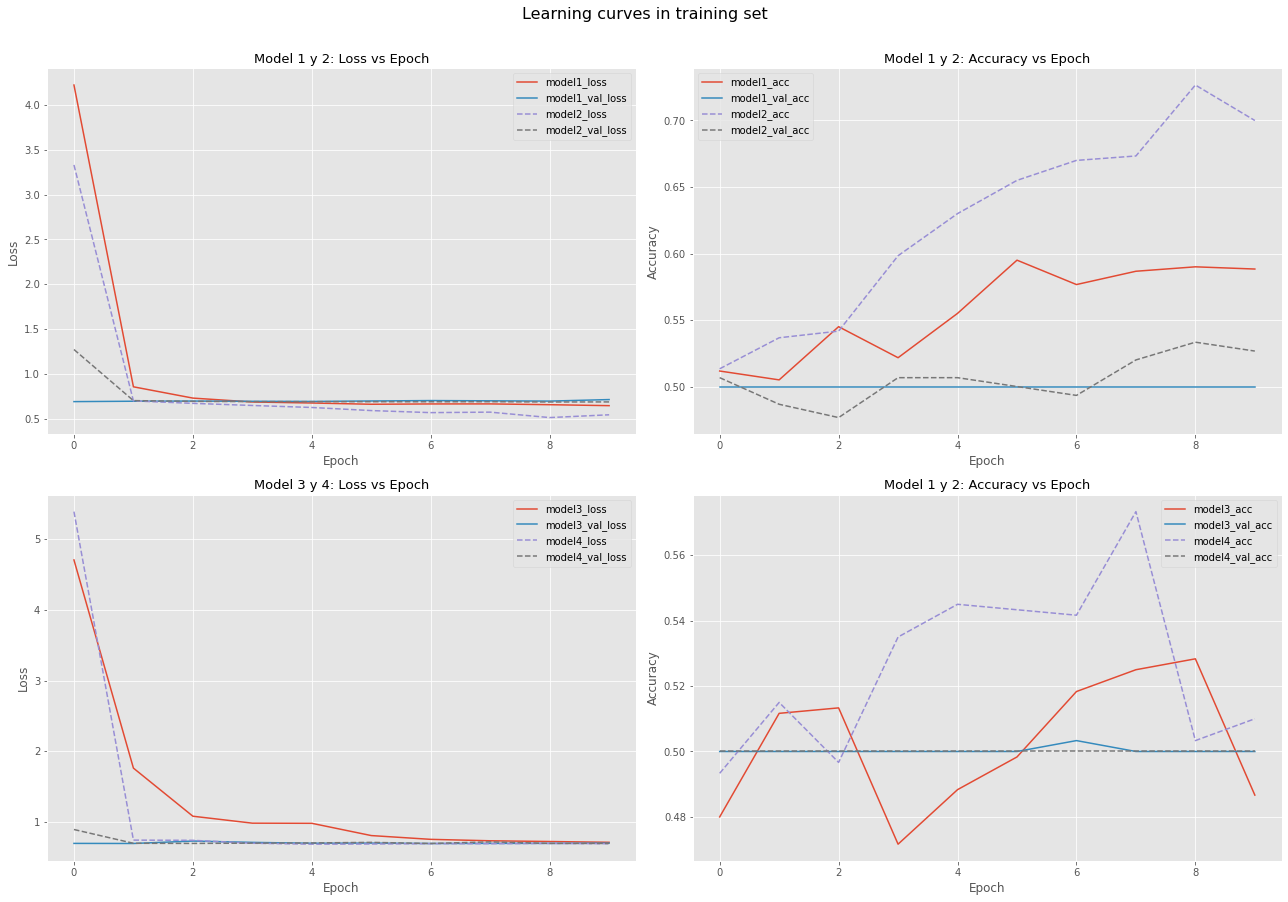

In [ ]:
plot(df1, df2, df3, df4)

In [ ]:
print(f'Model 1 (Sin Skip)| loss: {model1.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model1.evaluate(images_test, labels_test, verbose=False)[1]}')
print(f'Model 2 (Con Skip)| loss: {model2.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model2.evaluate(images_test, labels_test, verbose=False)[1]}')
print(f'Model 3 (Sin Skip)| loss: {model3.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model3.evaluate(images_test, labels_test, verbose=False)[1]}')
print(f'Model 4 (Con Skip)| loss: {model4.evaluate(images_test, labels_test, verbose=False)[0]}, acc: {model4.evaluate(images_test, labels_test, verbose=False)[1]}')

Model 1 (Sin Skip)| loss: 0.7161505818367004, acc: 0.5
Model 2 (Con Skip)| loss: 0.6943526268005371, acc: 0.5199999809265137
Model 3 (Sin Skip)| loss: 0.6952337622642517, acc: 0.5
Model 4 (Con Skip)| loss: 0.6936029195785522, acc: 0.5


### Cifar 10

In [ ]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


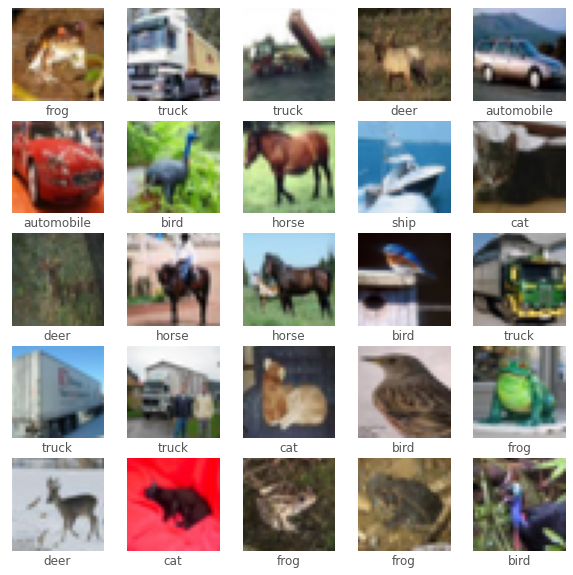

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#### Semilla 123

In [ ]:
model1 = get_model(input_shape=train_images[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False,
                  seed=123)

model1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model2 = get_model(input_shape=train_images[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=123)

model2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model3 = get_model(input_shape=train_images[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=123)

model3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model4 = get_model(input_shape=train_images[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=123)

model4.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history3 = model3.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history4 = model4.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)

In [ ]:
df1 = pd.DataFrame(history1.history)
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
df4 = pd.DataFrame(history4.history)

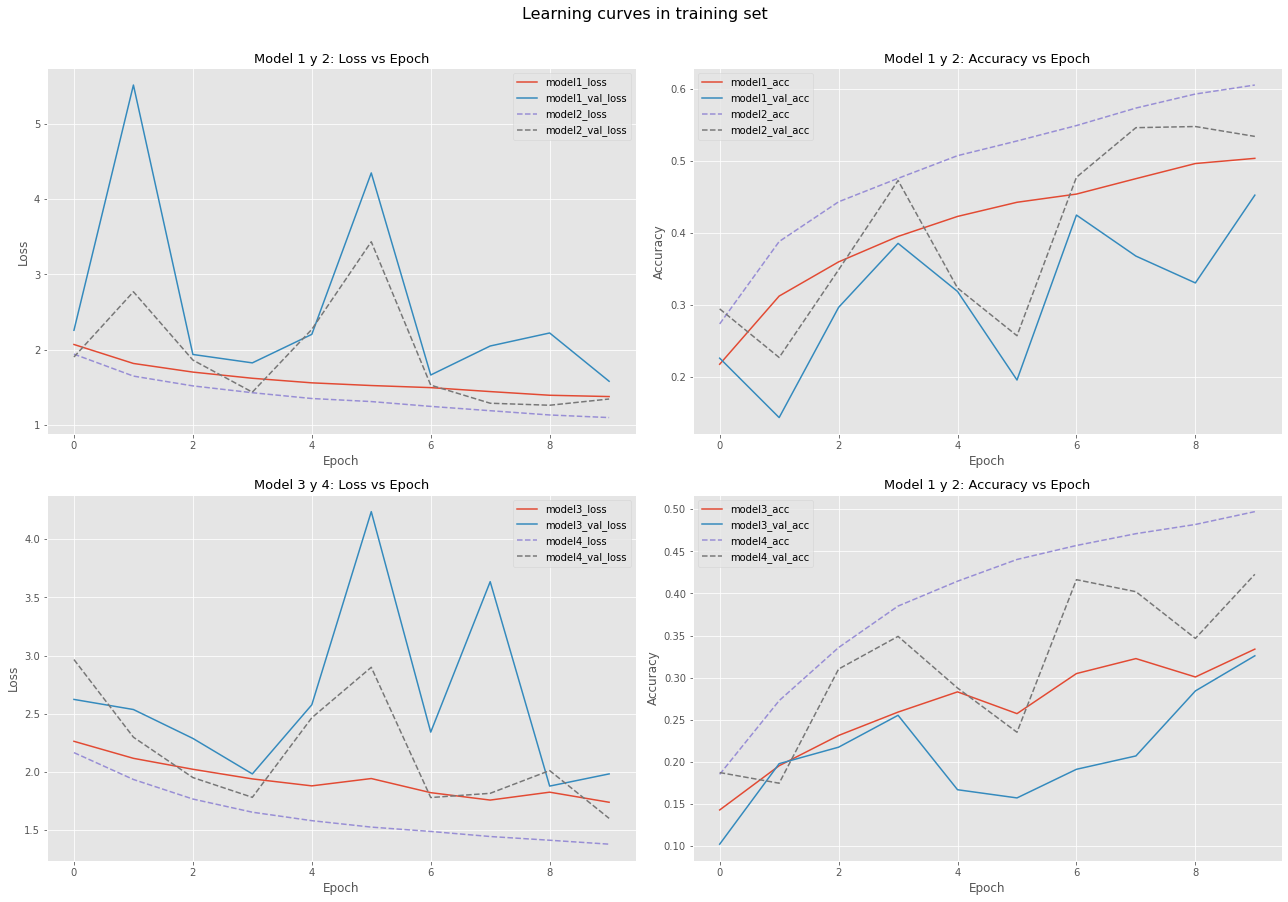

In [ ]:
plot(df1, df2, df3, df4)

In [ ]:
print(f'Model 1 (Sin Skip)| loss: {model1.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model1.evaluate(test_images, test_labels, verbose=False)[1]}')
print(f'Model 2 (Con Skip)| loss: {model2.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model2.evaluate(test_images, test_labels, verbose=False)[1]}')
print(f'Model 3 (Sin Skip)| loss: {model3.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model3.evaluate(test_images, test_labels, verbose=False)[1]}')
print(f'Model 4 (Con Skip)| loss: {model4.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model4.evaluate(test_images, test_labels, verbose=False)[1]}')

Model 1 (Sin Skip)| loss: 1.5745503902435303, acc: 0.45239999890327454
Model 2 (Con Skip)| loss: 1.3398164510726929, acc: 0.534500002861023
Model 3 (Sin Skip)| loss: 1.9903842210769653, acc: 0.3257000148296356
Model 4 (Con Skip)| loss: 1.5754382610321045, acc: 0.4334000051021576


#### Semilla 12

In [ ]:
model1 = get_model(input_shape=train_images[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=12)

model1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model2 = get_model(input_shape=train_images[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=12)

model2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model3 = get_model(input_shape=train_images[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=12)

model3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model4 = get_model(input_shape=train_images[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=12)

model4.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history3 = model3.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history4 = model4.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)

In [ ]:
df1 = pd.DataFrame(history1.history)
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
df4 = pd.DataFrame(history4.history)

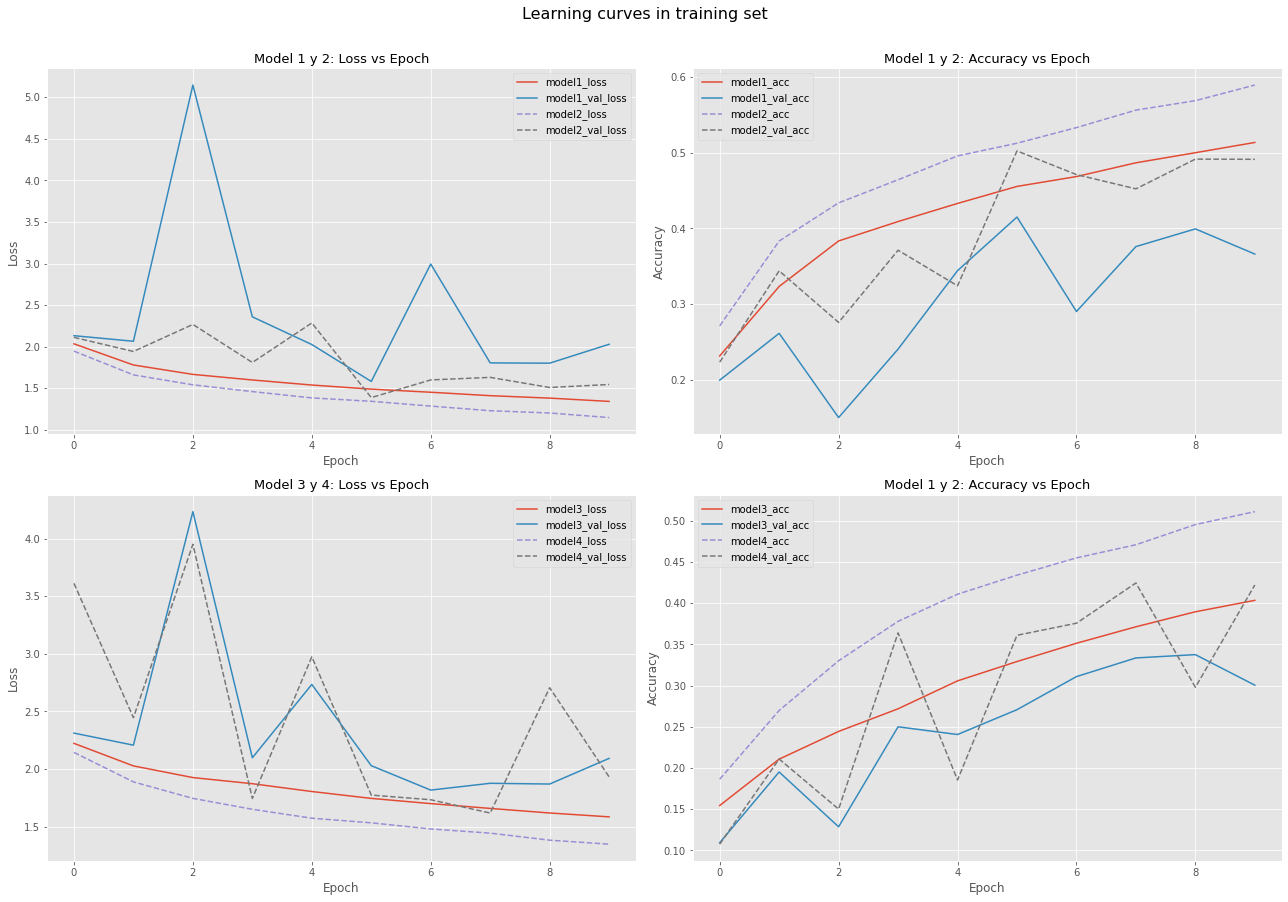

In [ ]:
plot(df1, df2, df3, df4)

In [ ]:
print(f'Model 1 (Sin Skip)| loss: {model1.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model1.evaluate(test_images, test_labels, verbose=False)[1]}')
print(f'Model 2 (Con Skip)| loss: {model2.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model2.evaluate(test_images, test_labels, verbose=False)[1]}')
print(f'Model 3 (Sin Skip)| loss: {model3.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model3.evaluate(test_images, test_labels, verbose=False)[1]}')
print(f'Model 4 (Con Skip)| loss: {model4.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model4.evaluate(test_images, test_labels, verbose=False)[1]}')

Model 1 (Sin Skip)| loss: 2.044112205505371, acc: 0.36250001192092896
Model 2 (Con Skip)| loss: 1.5337324142456055, acc: 0.4943999946117401
Model 3 (Sin Skip)| loss: 2.0491621494293213, acc: 0.3082999885082245
Model 4 (Con Skip)| loss: 1.9148107767105103, acc: 0.4187999963760376


#### Semilla 1

In [ ]:
model1 = get_model(input_shape=train_images[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=1)

model1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model2 = get_model(input_shape=train_images[0].shape, repeticion=4, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=1)

model2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model3 = get_model(input_shape=train_images[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlockSinSkip,
                  data_augmentation=False, 
                  seed=1)

model3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model4 = get_model(input_shape=train_images[0].shape, repeticion=8, num_classes=10, 
                  residual_block=ResidualBlock,
                  data_augmentation=False, 
                  seed=1)

model4.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history3 = model3.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)
history4 = model4.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.15, verbose=False)

In [ ]:
df1 = pd.DataFrame(history1.history)
df2 = pd.DataFrame(history2.history)
df3 = pd.DataFrame(history3.history)
df4 = pd.DataFrame(history4.history)

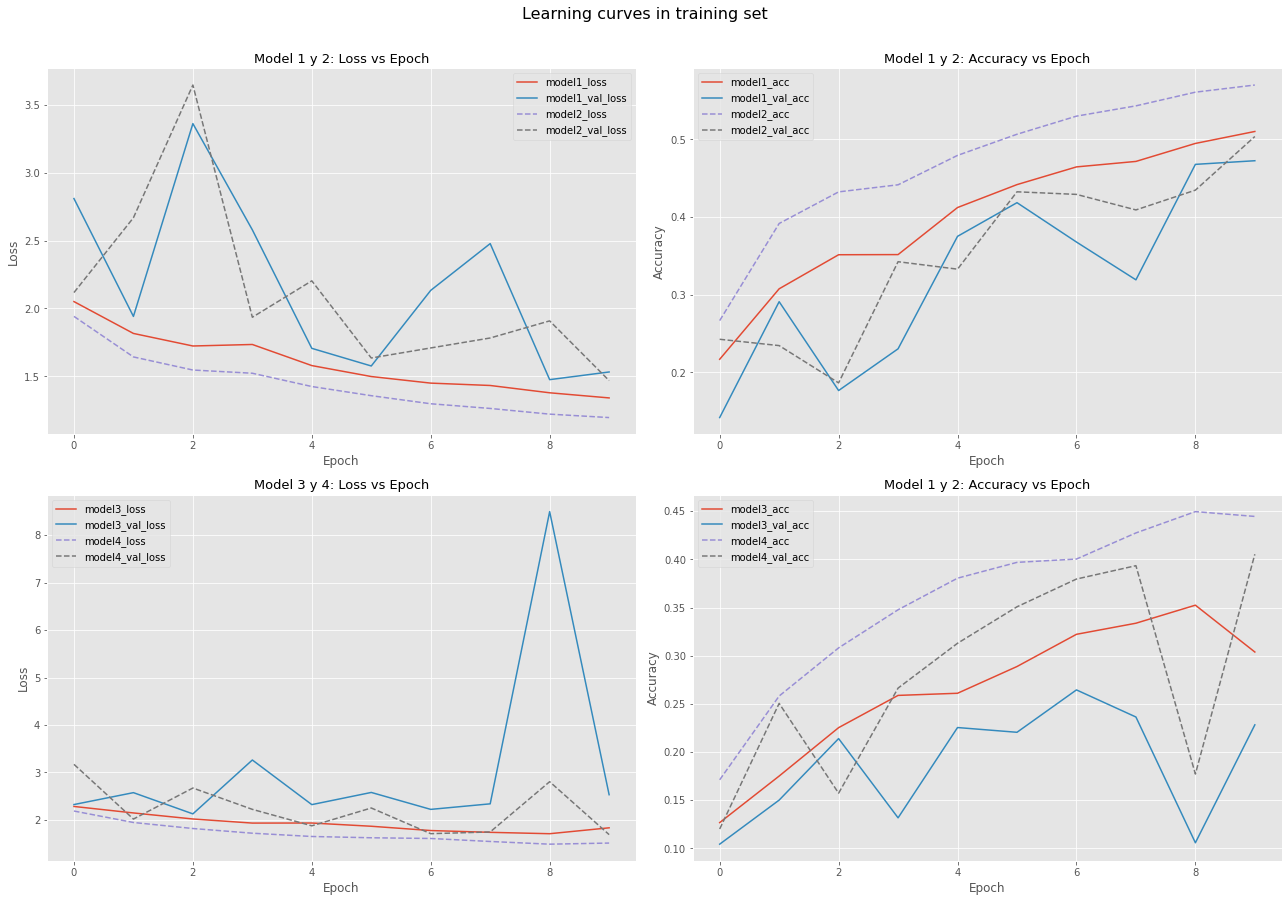

In [ ]:
plot(df1, df2, df3, df4)

In [ ]:
print(f'Model 1 (Sin Skip)| loss: {model1.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model1.evaluate(test_images, test_labels, verbose=False)[1]}')
print(f'Model 2 (Con Skip)| loss: {model2.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model2.evaluate(test_images, test_labels, verbose=False)[1]}')
print(f'Model 3 (Sin Skip)| loss: {model3.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model3.evaluate(test_images, test_labels, verbose=False)[1]}')
print(f'Model 4 (Con Skip)| loss: {model4.evaluate(test_images, test_labels, verbose=False)[0]}, acc: {model4.evaluate(test_images, test_labels, verbose=False)[1]}')

Model 1 (Sin Skip)| loss: 1.5326844453811646, acc: 0.4643000066280365
Model 2 (Con Skip)| loss: 1.4744861125946045, acc: 0.499099999666214
Model 3 (Sin Skip)| loss: 2.4962379932403564, acc: 0.2379000037908554
Model 4 (Con Skip)| loss: 1.6832275390625, acc: 0.415800005197525


### Resultados

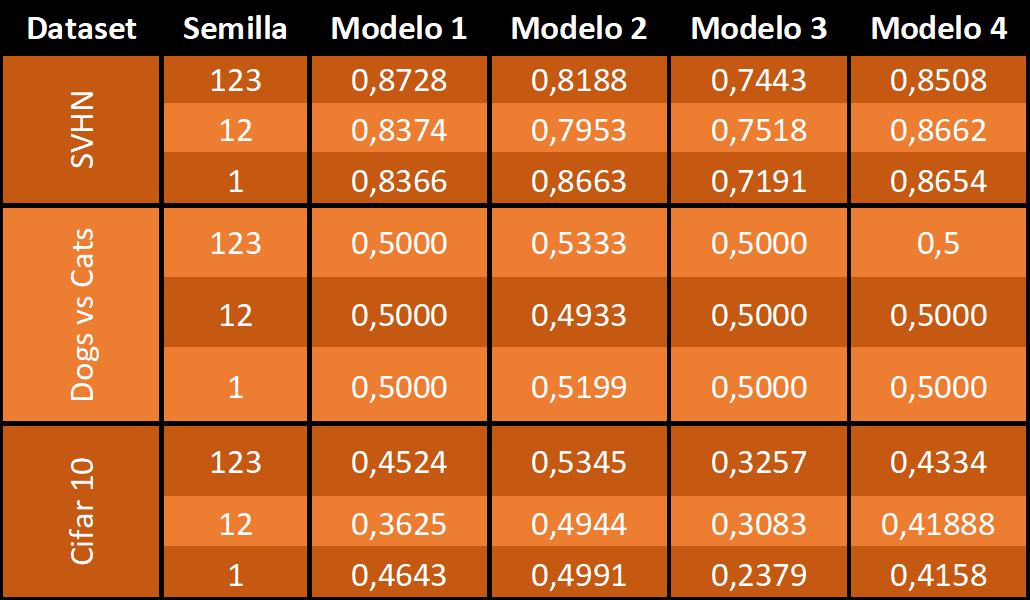

In [ ]:
Image(path + "resultados.png", width=600)

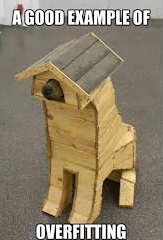

In [ ]:
Image(path + "overfitting.png", width=200)

### Conclusiones

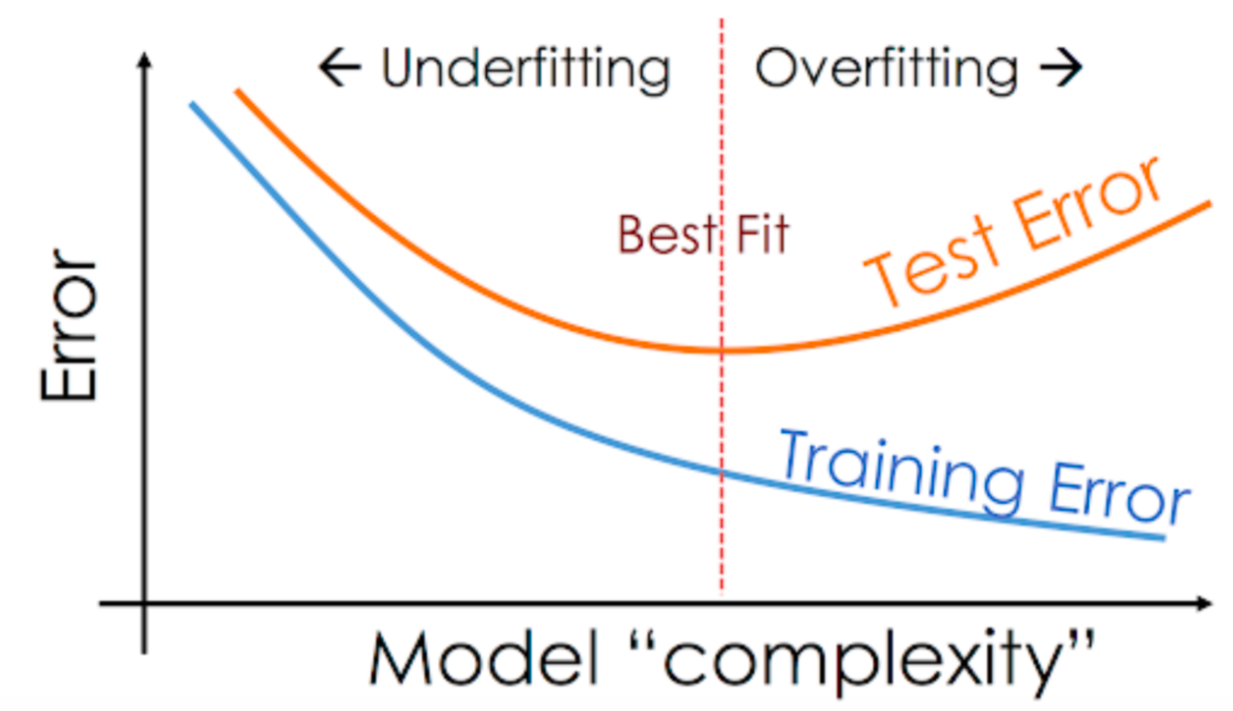

In [ ]:
Image(path + "complexity.png", width=600)

## **2. Challenge Kaggle**

Esta parte de la tarea consiste en predecir las clases de movimiento de yoga que aparece en una imágen. Cada movimiento de yoga se puede clasificar en dos jerarquías, ver detalle más abajo.

### Dataset

El dataset de entrenamiento incluye 1328 imágenes de poses de yoga descargadas de la web usando el motor de búsqueda de Bing, donde cada imágen de entrenamiento, tiene dos clasificaciones (super clase y sublase, separadas por un espacio). El test set incluye 390 imágenes. La primera (super clase), puede tomar 6 valores: 0-Standing, 1-Sitting, 2-Balanced, 3-Inverted, 4-Reclining, 5-Wheel. La segunda (subclase), puede tomar 20 diferentes valores: 6-straight, 7-forward bend, 8-side bend, 9-other1, 10-normal1, 11-normal2, 12-split, 13-forward bend, 14-twist, 15-front, 16-side, 17-legs1, 18-legs2, 19-up-facing1, 20-down-facing1, 21-side facing, 22-plank balance, 23-up-facing2, 24-down-facing2, 25-other2. 

La competencia Kaggle es:

> https://www.kaggle.com/t/c474575bf6e64e1a963d038324f86eed

Los datos para comenzar a trabajar se encuentran en dicha competencia, y también en:

> http://www.inf.utfsm.cl/~cvalle/Yoga-Dataset.rar


Al descomprimir notarán que existen 2 archivos de texto, con las listas de imágenes de entrenamiento y test.
Cada línea del archivo de entrenamiento contiene el nombre del archivo asociado a la imagen, la super clase, y las clase a la que pertenece (separadas por un espacio).
En la carpeta Images se encuentran todas las imágenes (tanto de entrenamiento como de test)


Pueden también descargar los datos directamente a la máquina donde estén ejecutando el código con los siguientes comandos


In [ ]:
!wget  http://www.inf.utfsm.cl/~cvalle/Yoga-Dataset.rar

--2021-06-12 21:02:50--  http://www.inf.utfsm.cl/~cvalle/Yoga-Dataset.rar
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.inf.utfsm.cl/~cvalle/Yoga-Dataset.rar [following]
--2021-06-12 21:02:50--  https://www.inf.utfsm.cl/~cvalle/Yoga-Dataset.rar
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248094200 (237M) [application/x-rar-compressed]
Saving to: ‘Yoga-Dataset.rar’

Yoga-Dataset.rar    100%[===================>] 236.60M  21.4MB/s    in 12s     

2021-06-12 21:03:03 (19.6 MB/s) - ‘Yoga-Dataset.rar’ saved [248094200/248094200]



### Librerias

In [2]:
!pip install tensorflow_addons

     |████████████████████████████████| 686kB 8.2MB/s 


In [3]:
# Librerias
import warnings; warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import tensorflow as tf
import tensorflow_addons as tfa
from IPython.display import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Layer, Dense, BatchNormalization, Dropout, MaxPool2D, Conv2D, Flatten, GlobalAveragePooling2D, Add, AveragePooling2D, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

### Carga de datos

In [4]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

# Esta es la ruta en mi drive
path = '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2/'

Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [5]:
df_train = pd.read_csv(path + 'yoga_train.txt', sep=',', header=None)
df_train.rename(columns={0: 'id', 1:'data'}, inplace=True)
df_train_junto = df_train.copy()
df_train[['superclase','subclase']] = df_train.data.str.split(' ', expand=True)
df_train.drop(['data'], axis = 1, inplace=True)
df_train['subclase'] = df_train['subclase'].astype('int')
df_train['subclase'] = df_train['subclase'].astype('string')
df_train.head()

id superclase subclase
0  0.jpg          1       14
1  1.jpg          1       14
2  2.jpg          1       14
3  4.jpg          1       14
4  6.jpg          1       14

In [6]:
df_labeling = pd.read_csv(path + 'pseudo_labeling.csv', sep=',')
df_labeling[['superclase','subclase']] = df_labeling.classes.str.split(' ', expand=True)
df_labeling.drop(['classes'], axis = 1, inplace=True)
df_labeling['subclase'] = df_labeling['subclase'].astype('int')
df_labeling['subclase'] = df_labeling['subclase'].astype('string')
df_labeling.head()

id superclase subclase
0  1400.jpg          4       19
1  1402.jpg          0        6
2  1403.jpg          0        9
3  1404.jpg          0        6
4  1407.jpg          0        9

In [7]:
df_train_superclase_0 = df_train[df_train['superclase']=='0']
df_train_superclase_1 = df_train[df_train['superclase']=='1']
df_train_superclase_2 = df_train[df_train['superclase']=='2']
df_train_superclase_3 = df_train[df_train['superclase']=='3']
df_train_superclase_4 = df_train[df_train['superclase']=='4']
df_train_superclase_5 = df_train[df_train['superclase']=='5']

In [8]:
df_train_superclase_0['subclase'].value_counts()

8    92
7    67
9    48
6    36
Name: subclase, dtype: Int64

In [ ]:
df_train_superclase_1['subclase'].value_counts()

13    83
11    70
14    56
10    53
23    16
12    15
Name: subclase, dtype: Int64

In [ ]:
df_train_superclase_2['subclase'].value_counts()

15    48
16    27
Name: subclase, dtype: Int64

In [ ]:
df_train_superclase_3['subclase'].value_counts()

17    75
18    56
Name: subclase, dtype: Int64

In [ ]:
df_train_superclase_4['subclase'].value_counts()

19    161
22     62
20     59
21     16
Name: subclase, dtype: Int64

In [ ]:
df_train_superclase_5['subclase'].value_counts()

23    162
15     22
24     13
25     13
Name: subclase, dtype: Int64

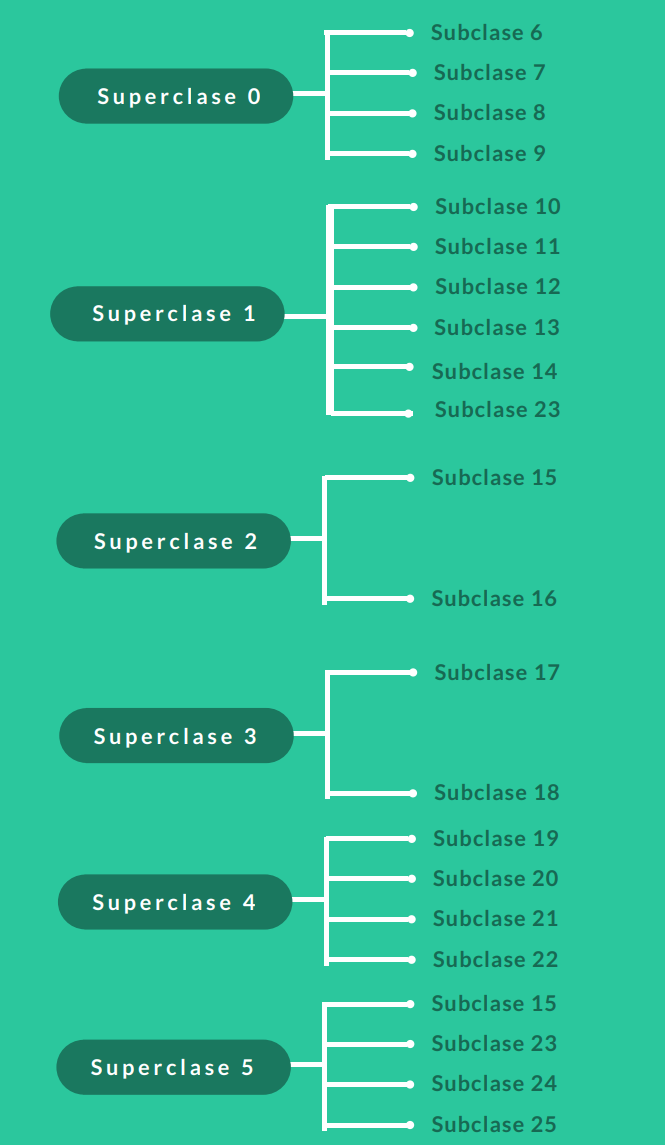

In [ ]:
Image(path + "jerarquia.png", width=500)

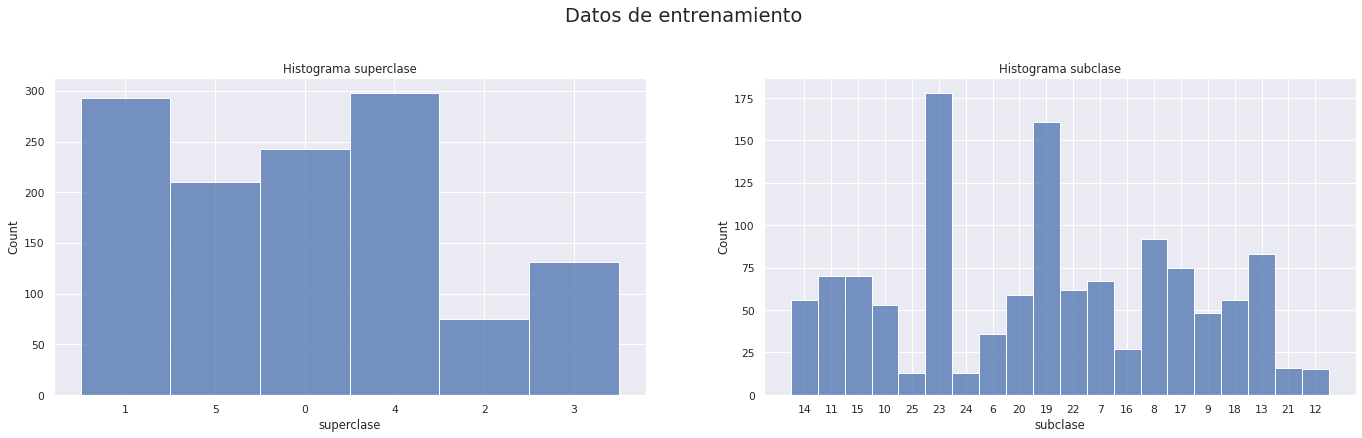

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), dpi=70)
fig.suptitle('Datos de entrenamiento', fontsize=20, y=1.05)

sns.histplot(data=df_train, x='superclase', bins=6, ax=ax1)
ax1.set_title('Histograma superclase')

sns.histplot(data=df_train, x='subclase', bins=20, ax=ax2)
ax2.set_title('Histograma subclase')

plt.show()

In [10]:
# Oversampling based on subclase
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df_train[['id', 'superclase']], df_train['subclase'])
df_train_over = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_train_over.columns = ['id', 'superclase', 'subclase']

# Oversampling junto
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df_train_junto[['id']], df_train_junto['data'])
df_train_junto_over = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_train_junto_over.columns = ['id','classes']

# Oversampling superclase
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df_train[['id', 'subclase']], df_train['superclase'])
df_train_superclase = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_train_superclase.columns = ['id','subclase', 'superclase']

# Oversampling subclase
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df_train[['id', 'superclase']], df_train['subclase'])
df_train_subclase = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_train_subclase.columns = ['id','superclase', 'subclase']

In [11]:
sts = StratifiedShuffleSplit(n_splits=11, random_state=12)
splits = sts.split(df_train_over[['id', 'superclase']], df_train_over['subclase'])

train_index, val_index = next(splits)
df_train_1, df_val_1 = df_train_over.loc[train_index], df_train_over.loc[val_index]

size_train_1 = df_train_1.shape[0]
size_val_1 = df_val_1.shape[0]

print(f'Size data_train_1 = {size_train_1}')
print(f'Size data_val_1 = {size_val_1}')

train_index, val_index = next(splits)
df_train_2, df_val_2 = df_train_over.loc[train_index], df_train_over.loc[val_index]

train_index, val_index = next(splits)
df_train_3, df_val_3 = df_train_over.loc[train_index], df_train_over.loc[val_index]

train_index, val_index = next(splits)
df_train_4, df_val_4 = df_train_over.loc[train_index], df_train_over.loc[val_index]

train_index, val_index = next(splits)
df_train_5, df_val_5 = df_train_over.loc[train_index], df_train_over.loc[val_index]

train_index, val_index = next(splits)
df_train_6, df_val_6 = df_train_over.loc[train_index], df_train_over.loc[val_index]

train_index, val_index = next(splits)
df_train_7, df_val_7 = df_train_over.loc[train_index], df_train_over.loc[val_index]

train_index, val_index = next(splits)
df_train_8, df_val_8 = df_train_over.loc[train_index], df_train_over.loc[val_index]

train_index, val_index = next(splits)
df_train_9, df_val_9 = df_train_over.loc[train_index], df_train_over.loc[val_index]

train_index, val_index = next(splits)
df_train_10, df_val_10 = df_train_over.loc[train_index], df_train_over.loc[val_index]

train_index, val_index = next(splits)
df_train_11, df_val_11 = df_train_over.loc[train_index], df_train_over.loc[val_index]

Size data_train_1 = 3204
Size data_val_1 = 356


In [12]:
df_train_12 = df_train_11.copy()
df_val_12 = df_val_11.copy()

In [13]:
df_train_12 = pd.concat([df_train_12, df_labeling])

In [14]:
size_train_12 = df_train_12.shape[0]
size_val_12 = df_val_12.shape[0]

print(f'Size data_train_1 = {size_train_12}')
print(f'Size data_val_1 = {size_val_12}')

Size data_train_1 = 3405
Size data_val_1 = 356


In [15]:
# Undersampling based on subclase
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df_train[['id', 'superclase']], df_train['subclase'])
df_train_under = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_train_under.columns = ['id', 'superclase', 'subclase']

In [16]:
df_test = pd.read_csv(path + 'yoga_test.txt', sep=',', header=None)
df_test.drop([1], axis=1, inplace=True)
df_test.rename(columns={0: 'id'}, inplace=True)
df_test.head()

id
0  1400.jpg
1  1402.jpg
2  1403.jpg
3  1404.jpg
4  1405.jpg

### Preprocesamiento de los datos

In [17]:
# Split train dataset into data_train and data_val (Normal)
val_size = 0.15
df_train, df_val = train_test_split(df_train, test_size=val_size, stratify=df_train[['superclase', 'subclase']], random_state=15)

size_train = df_train.shape[0]
size_val = df_val.shape[0]

print(f'Size data_train = {size_train}')
print(f'Size data_val = {size_val}')

Size data_train = 1062
Size data_val = 188


In [18]:
# Split train dataset into data_train and data_val (OverSampling)
val_size = 0.15
df_train_over, df_val_over = train_test_split(df_train_over, test_size=val_size, stratify=df_train_over['subclase'], random_state=15)

size_train_over = df_train_over.shape[0]
size_val_over = df_val_over.shape[0]

print(f'Size data_train_over = {size_train_over}')
print(f'Size data_val_over = {size_val_over}')

Size data_train_over = 3026
Size data_val_over = 534


In [19]:
# Split train dataset into data_train and data_val (UnderSampling)
val_size = 0.15
df_train_under, df_val_under = train_test_split(df_train_under, test_size=val_size, stratify=df_train_under['subclase'], random_state=15)

size_train_under = df_train_under.shape[0]
size_val_under = df_val_under.shape[0]

print(f'Size data_train_under = {size_train_under}')
print(f'Size data_val_under = {size_val_under}')

Size data_train_under = 221
Size data_val_under = 39


In [20]:
# Split train dataset into data_train and data_val (Junto)
val_size = 0.15
df_train_junto_over, df_val_junto_over = train_test_split(df_train_junto_over, test_size=val_size, stratify=df_train_junto_over['classes'], random_state=15)

size_train_junto_over = df_train_junto_over.shape[0]
size_val_junto_over = df_val_junto_over.shape[0]

print(f'Size data_train_junto_over = {size_train_junto_over}')
print(f'Size data_val_junto_over = {size_val_junto_over}')

Size data_train_junto_over = 3029
Size data_val_junto_over = 535


In [21]:
# Split train dataset into data_train and data_val (superclase 0)
val_size = 0.15
df_train_superclase, df_val_superclase = train_test_split(df_train_superclase, test_size=val_size, stratify=df_train_superclase['superclase'], random_state=15)

size_train_superclase = df_train_superclase.shape[0]
size_val_superclase = df_val_superclase.shape[0]

print(f'Size data_train_superclase = {size_train_superclase}')
print(f'Size data_val_superclase = {size_val_superclase}')

# Split train dataset into data_train and data_val (superclase 1)
val_size = 0.15
df_train_subclase, df_val_subclase = train_test_split(df_train_subclase, test_size=val_size, stratify=df_train_subclase['subclase'], random_state=15)

size_train_subclase = df_train_subclase.shape[0]
size_val_subclase = df_val_subclase.shape[0]

print(f'Size data_train_subclase = {size_train_subclase}')
print(f'Size data_val_subclase = {size_val_subclase}')

Size data_train_superclase = 1519
Size data_val_superclase = 269
Size data_train_subclase = 3026
Size data_val_subclase = 534


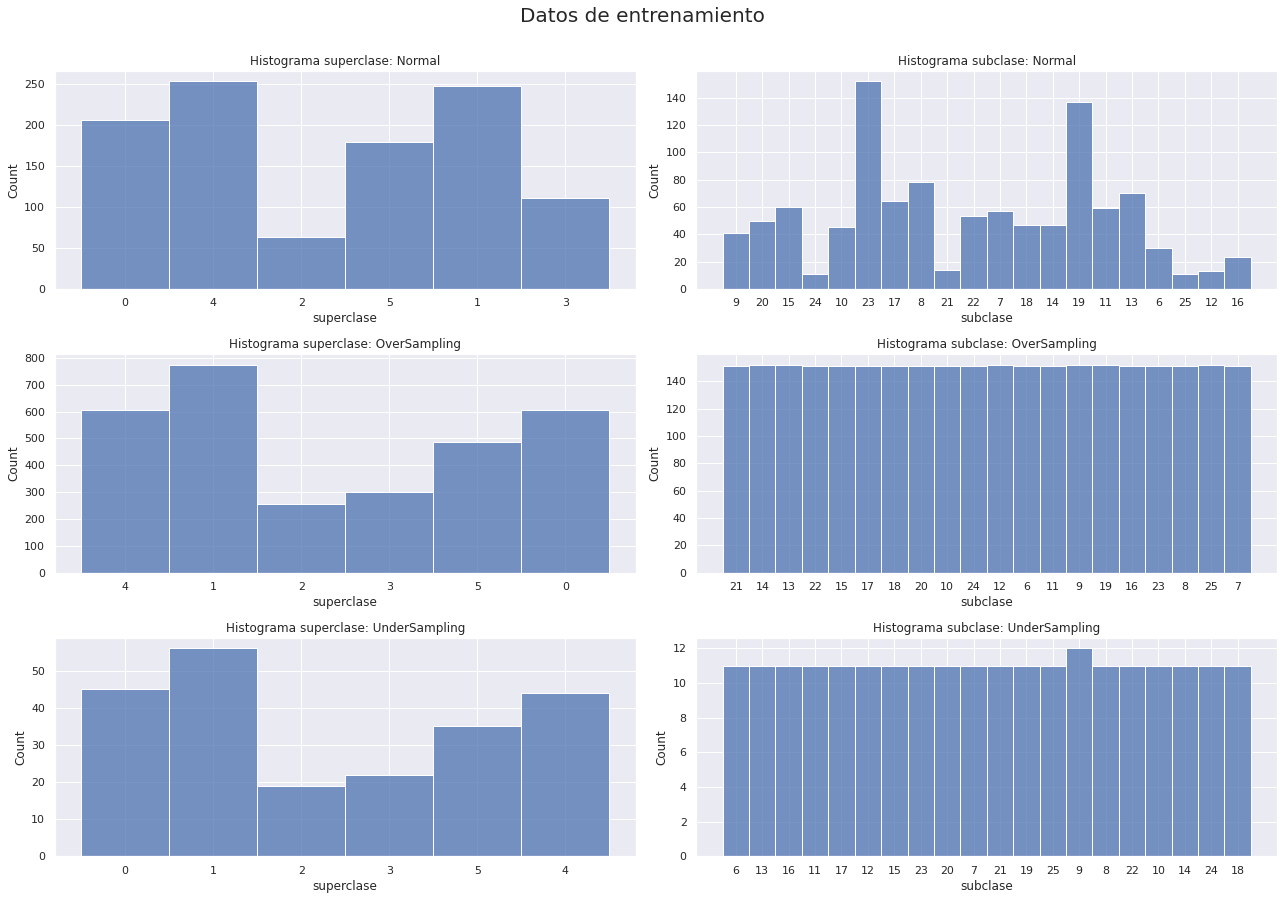

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
ax = ax.flatten()

fig.suptitle('Datos de entrenamiento', fontsize=20, y=1.04)

sns.histplot(data=df_train, x='superclase', bins=6, ax=ax[0])
ax[0].set_title('Histograma superclase: Normal')
sns.histplot(data=df_train, x='subclase', bins=20, ax=ax[1])
ax[1].set_title('Histograma subclase: Normal')

sns.histplot(data=df_train_over, x='superclase', bins=6, ax=ax[2])
ax[2].set_title('Histograma superclase: OverSampling')
sns.histplot(data=df_train_over, x='subclase', bins=20, ax=ax[3])
ax[3].set_title('Histograma subclase: OverSampling')

sns.histplot(data=df_train_under, x='superclase', bins=6, ax=ax[4])
ax[4].set_title('Histograma superclase: UnderSampling')
sns.histplot(data=df_train_under, x='subclase', bins=20, ax=ax[5])
ax[5].set_title('Histograma subclase: UnderSampling')

plt.tight_layout()
plt.show()

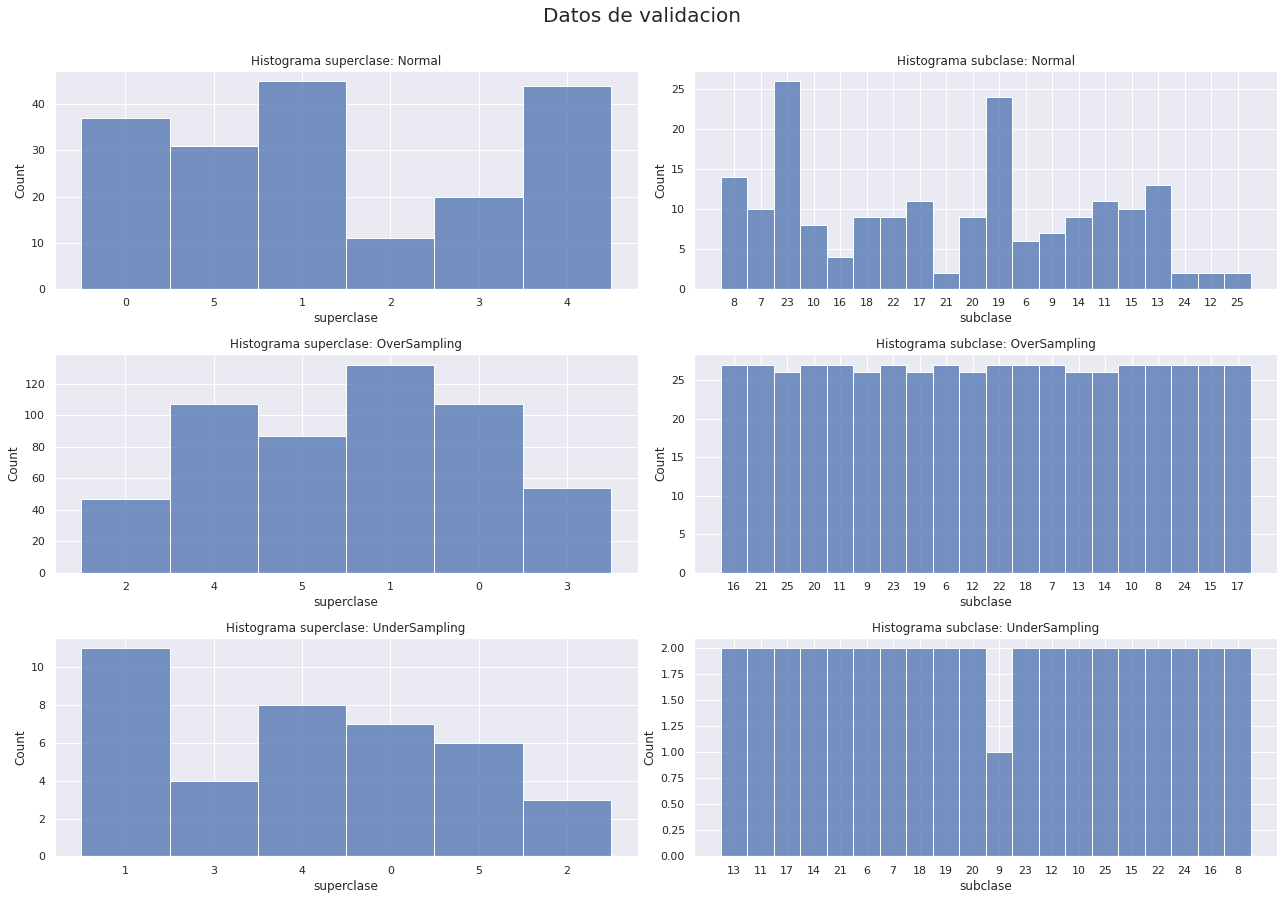

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
ax = ax.flatten()

fig.suptitle('Datos de validacion', fontsize=20, y=1.04)

sns.histplot(data=df_val, x='superclase', bins=6, ax=ax[0])
ax[0].set_title('Histograma superclase: Normal')
sns.histplot(data=df_val, x='subclase', bins=20, ax=ax[1])
ax[1].set_title('Histograma subclase: Normal')

sns.histplot(data=df_val_over, x='superclase', bins=6, ax=ax[2])
ax[2].set_title('Histograma superclase: OverSampling')
sns.histplot(data=df_val_over, x='subclase', bins=20, ax=ax[3])
ax[3].set_title('Histograma subclase: OverSampling')

sns.histplot(data=df_val_under, x='superclase', bins=6, ax=ax[4])
ax[4].set_title('Histograma superclase: UnderSampling')
sns.histplot(data=df_val_under, x='subclase', bins=20, ax=ax[5])
ax[5].set_title('Histograma subclase: UnderSampling')

plt.tight_layout()
plt.show()

In [24]:
# Apply one hot encoding (Normal)

lb_train = LabelBinarizer()

categorical_features = ['superclase', 'subclase']

for feature in categorical_features:
    df_train[feature] = tuple(lb_train.fit_transform(df_train[feature]))
    df_val[feature] = tuple(lb_train.transform(df_val[feature]))

In [25]:
# Apply one hot encoding (OverSampling)

lb_train_over = LabelBinarizer()

for feature in categorical_features:
    df_train_over[feature] = tuple(lb_train_over.fit_transform(df_train_over[feature]))
    df_val_over[feature] = tuple(lb_train_over.transform(df_val_over[feature]))

In [26]:
# Apply one hot encoding (UnderSampling)

lb_train_under = LabelBinarizer()

for feature in categorical_features:
    df_train_under[feature] = tuple(lb_train_under.fit_transform(df_train_under[feature]))
    df_val_under[feature] = tuple(lb_train_under.transform(df_val_under[feature]))

In [27]:
# Apply one hot encoding (Junto)

lb_junto = LabelBinarizer()

df_train_junto_over['classes'] = tuple(lb_junto.fit_transform(df_train_junto_over['classes']))
df_val_junto_over['classes'] = tuple(lb_junto.transform(df_val_junto_over['classes']))

In [28]:
lb_superclase_sup = LabelBinarizer()

df_train_superclase['superclase'] = tuple(lb_superclase_sup.fit_transform(df_train_superclase['superclase']))
df_val_superclase['superclase'] = tuple(lb_superclase_sup.transform(df_val_superclase['superclase']))

lb_superclase_sub = LabelBinarizer()

df_train_superclase['subclase'] = tuple(lb_superclase_sub.fit_transform(df_train_superclase['subclase']))
df_val_superclase['subclase'] = tuple(lb_superclase_sub.transform(df_val_superclase['subclase']))

lb_subclase_sup = LabelBinarizer()

df_train_subclase['superclase'] = tuple(lb_subclase_sup.fit_transform(df_train_subclase['superclase']))
df_val_subclase['superclase'] = tuple(lb_subclase_sup.transform(df_val_subclase['superclase']))

lb_subclase_sub = LabelBinarizer()

df_train_subclase['subclase'] = tuple(lb_subclase_sub.fit_transform(df_train_subclase['subclase']))
df_val_subclase['subclase'] = tuple(lb_subclase_sub.transform(df_val_subclase['subclase']))

In [29]:
lb_train_1 = LabelBinarizer()

for feature in categorical_features:
    df_train_1[feature] = tuple(lb_train_1.fit_transform(df_train_1[feature]))
    df_val_1[feature] = tuple(lb_train_1.transform(df_val_1[feature]))

lb_train_2 = LabelBinarizer()

for feature in categorical_features:
    df_train_2[feature] = tuple(lb_train_2.fit_transform(df_train_2[feature]))
    df_val_2[feature] = tuple(lb_train_2.transform(df_val_2[feature]))

lb_train_3 = LabelBinarizer()

for feature in categorical_features:
    df_train_3[feature] = tuple(lb_train_3.fit_transform(df_train_3[feature]))
    df_val_3[feature] = tuple(lb_train_3.transform(df_val_3[feature]))

lb_train_4 = LabelBinarizer()

for feature in categorical_features:
    df_train_4[feature] = tuple(lb_train_4.fit_transform(df_train_4[feature]))
    df_val_4[feature] = tuple(lb_train_4.transform(df_val_4[feature]))

lb_train_5 = LabelBinarizer()

for feature in categorical_features:
    df_train_5[feature] = tuple(lb_train_5.fit_transform(df_train_5[feature]))
    df_val_5[feature] = tuple(lb_train_5.transform(df_val_5[feature]))

lb_train_6 = LabelBinarizer()

for feature in categorical_features:
    df_train_6[feature] = tuple(lb_train_6.fit_transform(df_train_6[feature]))
    df_val_6[feature] = tuple(lb_train_6.transform(df_val_6[feature]))

lb_train_7 = LabelBinarizer()

for feature in categorical_features:
    df_train_7[feature] = tuple(lb_train_7.fit_transform(df_train_7[feature]))
    df_val_7[feature] = tuple(lb_train_7.transform(df_val_7[feature]))

lb_train_8 = LabelBinarizer()

for feature in categorical_features:
    df_train_8[feature] = tuple(lb_train_8.fit_transform(df_train_8[feature]))
    df_val_8[feature] = tuple(lb_train_8.transform(df_val_8[feature]))

lb_train_9 = LabelBinarizer()

for feature in categorical_features:
    df_train_9[feature] = tuple(lb_train_9.fit_transform(df_train_9[feature]))
    df_val_9[feature] = tuple(lb_train_9.transform(df_val_9[feature]))

lb_train_10 = LabelBinarizer()

for feature in categorical_features:
    df_train_10[feature] = tuple(lb_train_10.fit_transform(df_train_10[feature]))
    df_val_10[feature] = tuple(lb_train_10.transform(df_val_10[feature]))

lb_train_11 = LabelBinarizer()

for feature in categorical_features:
    df_train_11[feature] = tuple(lb_train_11.fit_transform(df_train_11[feature]))
    df_val_11[feature] = tuple(lb_train_11.transform(df_val_11[feature]))

lb_train_12 = LabelBinarizer()

for feature in categorical_features:
    df_train_12[feature] = tuple(lb_train_12.fit_transform(df_train_12[feature]))
    df_val_12[feature] = tuple(lb_train_12.transform(df_val_12[feature]))

In [30]:
df_train_superclase.head()

id  ...          superclase
771    823.jpg  ...  (0, 0, 0, 1, 0, 0)
800    853.jpg  ...  (0, 1, 0, 0, 0, 0)
80      86.jpg  ...  (0, 0, 0, 0, 0, 1)
1154  1228.jpg  ...  (0, 0, 0, 0, 0, 1)
450    483.jpg  ...  (0, 0, 0, 1, 0, 0)

[5 rows x 3 columns]

In [31]:
df_train_subclase.head()

id  ...                                           subclase
2543  876.jpg  ...  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
1762   21.jpg  ...  (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1735  858.jpg  ...  (0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2725  202.jpg  ...  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
1945  323.jpg  ...  (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[5 rows x 3 columns]

In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices(df_train.to_dict(orient='list'))
val_dataset = tf.data.Dataset.from_tensor_slices(df_val.to_dict(orient='list'))
test_dataset = tf.data.Dataset.from_tensor_slices(df_test.to_dict(orient='list'))

#OverSampling
train_dataset_over = tf.data.Dataset.from_tensor_slices(df_train_over.to_dict(orient='list'))
val_dataset_over = tf.data.Dataset.from_tensor_slices(df_val_over.to_dict(orient='list'))

#UnderSampling
train_dataset_under = tf.data.Dataset.from_tensor_slices(df_train_under.to_dict(orient='list'))
val_dataset_under = tf.data.Dataset.from_tensor_slices(df_val_under.to_dict(orient='list'))

#Junto
train_dataset_junto_over = tf.data.Dataset.from_tensor_slices(df_train_junto_over.to_dict(orient='list'))
val_dataset_junto_over = tf.data.Dataset.from_tensor_slices(df_val_junto_over.to_dict(orient='list'))

train_dataset_superclase = tf.data.Dataset.from_tensor_slices(df_train_superclase.to_dict(orient='list'))
val_dataset_superclase = tf.data.Dataset.from_tensor_slices(df_val_superclase.to_dict(orient='list'))

train_dataset_subclase = tf.data.Dataset.from_tensor_slices(df_train_subclase.to_dict(orient='list'))
val_dataset_subclase = tf.data.Dataset.from_tensor_slices(df_val_subclase.to_dict(orient='list'))

train_dataset_1 = tf.data.Dataset.from_tensor_slices(df_train_1.to_dict(orient='list'))
val_dataset_1 = tf.data.Dataset.from_tensor_slices(df_val_1.to_dict(orient='list'))

train_dataset_2 = tf.data.Dataset.from_tensor_slices(df_train_2.to_dict(orient='list'))
val_dataset_2 = tf.data.Dataset.from_tensor_slices(df_val_2.to_dict(orient='list'))

train_dataset_3 = tf.data.Dataset.from_tensor_slices(df_train_3.to_dict(orient='list'))
val_dataset_3 = tf.data.Dataset.from_tensor_slices(df_val_3.to_dict(orient='list'))

train_dataset_4 = tf.data.Dataset.from_tensor_slices(df_train_4.to_dict(orient='list'))
val_dataset_4 = tf.data.Dataset.from_tensor_slices(df_val_4.to_dict(orient='list'))

train_dataset_5 = tf.data.Dataset.from_tensor_slices(df_train_5.to_dict(orient='list'))
val_dataset_5 = tf.data.Dataset.from_tensor_slices(df_val_5.to_dict(orient='list'))

train_dataset_6 = tf.data.Dataset.from_tensor_slices(df_train_6.to_dict(orient='list'))
val_dataset_6 = tf.data.Dataset.from_tensor_slices(df_val_6.to_dict(orient='list'))

train_dataset_7 = tf.data.Dataset.from_tensor_slices(df_train_7.to_dict(orient='list'))
val_dataset_7 = tf.data.Dataset.from_tensor_slices(df_val_7.to_dict(orient='list'))

train_dataset_8 = tf.data.Dataset.from_tensor_slices(df_train_8.to_dict(orient='list'))
val_dataset_8 = tf.data.Dataset.from_tensor_slices(df_val_8.to_dict(orient='list'))

train_dataset_9 = tf.data.Dataset.from_tensor_slices(df_train_9.to_dict(orient='list'))
val_dataset_9 = tf.data.Dataset.from_tensor_slices(df_val_9.to_dict(orient='list'))

train_dataset_10 = tf.data.Dataset.from_tensor_slices(df_train_10.to_dict(orient='list'))
val_dataset_10 = tf.data.Dataset.from_tensor_slices(df_val_10.to_dict(orient='list'))

train_dataset_11 = tf.data.Dataset.from_tensor_slices(df_train_11.to_dict(orient='list'))
val_dataset_11 = tf.data.Dataset.from_tensor_slices(df_val_11.to_dict(orient='list'))

train_dataset_12 = tf.data.Dataset.from_tensor_slices(df_train_12.to_dict(orient='list'))
val_dataset_12 = tf.data.Dataset.from_tensor_slices(df_val_12.to_dict(orient='list'))

In [33]:
path_images = path + 'Images/'

In [34]:
def get_and_process_image(x, path=path_images):

  img = tf.io.read_file(path_images + x['id'])

  if tf.io.is_jpeg(img):

    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32) #[0, 1]
    img = tf.image.resize(img, size=(256, 256))

    x['id'] = img
  
  else:
    
    img = tf.image.decode_gif(img)
    img = tf.image.convert_image_dtype(img, tf.float32) #[0, 1]
    img = tf.image.resize(img, size=(256, 256))

    x['id'] = img[0]

  return x

In [35]:
train_dataset = train_dataset.map(lambda x: get_and_process_image(x))
val_dataset = val_dataset.map(lambda x: get_and_process_image(x))
test_dataset = test_dataset.map(lambda x: get_and_process_image(x))

#OverSampling
train_dataset_over = train_dataset_over.map(lambda x: get_and_process_image(x))
val_dataset_over = val_dataset_over.map(lambda x: get_and_process_image(x))

#UnderSampling
train_dataset_under = train_dataset_under.map(lambda x: get_and_process_image(x))
val_dataset_under = val_dataset_under.map(lambda x: get_and_process_image(x))

train_dataset_junto_over = train_dataset_junto_over.map(lambda x: get_and_process_image(x))
val_dataset_junto_over = val_dataset_junto_over.map(lambda x: get_and_process_image(x))

train_dataset_superclase = train_dataset_superclase.map(lambda x: get_and_process_image(x))
val_dataset_superclase = val_dataset_superclase.map(lambda x: get_and_process_image(x))

train_dataset_subclase = train_dataset_subclase.map(lambda x: get_and_process_image(x))
val_dataset_subclase = val_dataset_subclase.map(lambda x: get_and_process_image(x))

train_dataset_1 = train_dataset_1.map(lambda x: get_and_process_image(x))
val_dataset_1 = val_dataset_1.map(lambda x: get_and_process_image(x))

train_dataset_2 = train_dataset_2.map(lambda x: get_and_process_image(x))
val_dataset_2 = val_dataset_2.map(lambda x: get_and_process_image(x))

train_dataset_3 = train_dataset_3.map(lambda x: get_and_process_image(x))
val_dataset_3 = val_dataset_3.map(lambda x: get_and_process_image(x))

train_dataset_4 = train_dataset_4.map(lambda x: get_and_process_image(x))
val_dataset_4 = val_dataset_4.map(lambda x: get_and_process_image(x))

train_dataset_5 = train_dataset_5.map(lambda x: get_and_process_image(x))
val_dataset_5 = val_dataset_5.map(lambda x: get_and_process_image(x))

train_dataset_6 = train_dataset_6.map(lambda x: get_and_process_image(x))
val_dataset_6 = val_dataset_6.map(lambda x: get_and_process_image(x))

train_dataset_7 = train_dataset_7.map(lambda x: get_and_process_image(x))
val_dataset_7 = val_dataset_7.map(lambda x: get_and_process_image(x))

train_dataset_8 = train_dataset_8.map(lambda x: get_and_process_image(x))
val_dataset_8 = val_dataset_8.map(lambda x: get_and_process_image(x))

train_dataset_9 = train_dataset_9.map(lambda x: get_and_process_image(x))
val_dataset_9 = val_dataset_9.map(lambda x: get_and_process_image(x))

train_dataset_10 = train_dataset_10.map(lambda x: get_and_process_image(x))
val_dataset_10 = val_dataset_10.map(lambda x: get_and_process_image(x))

train_dataset_11 = train_dataset_11.map(lambda x: get_and_process_image(x))
val_dataset_11 = val_dataset_11.map(lambda x: get_and_process_image(x))

train_dataset_12 = train_dataset_12.map(lambda x: get_and_process_image(x))
val_dataset_12 = val_dataset_12.map(lambda x: get_and_process_image(x))

In [36]:
# Create an input and output tuple for the dataset

def map_tuple(x):
    return (x['id'], (x['superclase'], x['subclase']))

def map_test(x):
  return x['id']

train_dataset = train_dataset.map(map_tuple)
val_dataset = val_dataset.map(map_tuple)
test_dataset = test_dataset.map(map_test)

#OverSampling
train_dataset_over = train_dataset_over.map(map_tuple)
val_dataset_over = val_dataset_over.map(map_tuple)

#UnderSampling
train_dataset_under = train_dataset_under.map(map_tuple)
val_dataset_under = val_dataset_under.map(map_tuple)

train_dataset_1 = train_dataset_1.map(map_tuple)
val_dataset_1 = val_dataset_1.map(map_tuple)

train_dataset_2 = train_dataset_2.map(map_tuple)
val_dataset_2 = val_dataset_2.map(map_tuple)

train_dataset_3 = train_dataset_3.map(map_tuple)
val_dataset_3 = val_dataset_3.map(map_tuple)

train_dataset_4 = train_dataset_4.map(map_tuple)
val_dataset_4 = val_dataset_4.map(map_tuple)

train_dataset_5 = train_dataset_5.map(map_tuple)
val_dataset_5 = val_dataset_5.map(map_tuple)

train_dataset_6 = train_dataset_6.map(map_tuple)
val_dataset_6 = val_dataset_6.map(map_tuple)

train_dataset_7 = train_dataset_7.map(map_tuple)
val_dataset_7 = val_dataset_7.map(map_tuple)

train_dataset_8 = train_dataset_8.map(map_tuple)
val_dataset_8 = val_dataset_8.map(map_tuple)

train_dataset_9 = train_dataset_9.map(map_tuple)
val_dataset_9 = val_dataset_9.map(map_tuple)

train_dataset_10 = train_dataset_10.map(map_tuple)
val_dataset_10 = val_dataset_10.map(map_tuple)

train_dataset_11 = train_dataset_11.map(map_tuple)
val_dataset_11 = val_dataset_11.map(map_tuple)

train_dataset_12 = train_dataset_12.map(map_tuple)
val_dataset_12 = val_dataset_12.map(map_tuple)

In [37]:
def map_tuple(x):
    return (x['id'], x['classes'])

train_dataset_junto_over = train_dataset_junto_over.map(map_tuple)
val_dataset_junto_over = val_dataset_junto_over.map(map_tuple)

In [38]:
def map_tuple_supeclase(x):
    return ((x['id'], x['subclase']), x['superclase'])
  
def map_tuple_subclase(x):
    return ((x['id'], x['superclase']), x['subclase'])

train_dataset_superclase = train_dataset_superclase.map(map_tuple_supeclase)
val_dataset_superclase = val_dataset_superclase.map(map_tuple_supeclase)

train_dataset_subclase = train_dataset_subclase.map(map_tuple_subclase)
val_dataset_subclase = val_dataset_subclase.map(map_tuple_subclase)

In [39]:
def preprocess_dataset(dataset, batch_size, size):

  AUTOTUNE = tf.data.AUTOTUNE

  dataset = dataset.shuffle(size)
  dataset = dataset.batch(batch_size)
  dataset = dataset.prefetch(buffer_size=AUTOTUNE)
  dataset = dataset.cache()

  return dataset

In [40]:
train_dataset = preprocess_dataset(dataset=train_dataset, batch_size=32, size=size_train)
val_dataset = preprocess_dataset(dataset=val_dataset, batch_size=32, size=size_val)

#OverSampling
train_dataset_over = preprocess_dataset(dataset=train_dataset_over, batch_size=32, size=size_train_over)
val_dataset_over = preprocess_dataset(dataset=val_dataset_over, batch_size=32, size=size_val_over)

#UnderSampling
train_dataset_under = preprocess_dataset(dataset=train_dataset_under, batch_size=32, size=size_train_under)
val_dataset_under = preprocess_dataset(dataset=val_dataset_under, batch_size=32, size=size_val_under)

train_dataset_junto_over = preprocess_dataset(dataset=train_dataset_junto_over, batch_size=32, size=size_train_junto_over)
val_dataset_junto_over = preprocess_dataset(dataset=val_dataset_junto_over, batch_size=32, size=size_val_junto_over)

train_dataset_superclase = preprocess_dataset(dataset=train_dataset_superclase, batch_size=32, size=size_train_superclase)
val_dataset_superclase = preprocess_dataset(dataset=val_dataset_superclase, batch_size=32, size=size_val_superclase)

train_dataset_subclase = preprocess_dataset(dataset=train_dataset_subclase, batch_size=32, size=size_train_subclase)
val_dataset_subclase = preprocess_dataset(dataset=val_dataset_subclase, batch_size=32, size=size_val_subclase)

train_dataset_1 = preprocess_dataset(dataset=train_dataset_1, batch_size=64, size=size_train_1)
val_dataset_1 = preprocess_dataset(dataset=val_dataset_1, batch_size=64, size=size_val_1)

train_dataset_2 = preprocess_dataset(dataset=train_dataset_2, batch_size=64, size=size_train_1)
val_dataset_2 = preprocess_dataset(dataset=val_dataset_2, batch_size=64, size=size_val_1)

train_dataset_3 = preprocess_dataset(dataset=train_dataset_3, batch_size=64, size=size_train_1)
val_dataset_3 = preprocess_dataset(dataset=val_dataset_3, batch_size=64, size=size_val_1)

train_dataset_4 = preprocess_dataset(dataset=train_dataset_4, batch_size=64, size=size_train_1)
val_dataset_4 = preprocess_dataset(dataset=val_dataset_4, batch_size=64, size=size_val_1)

train_dataset_5 = preprocess_dataset(dataset=train_dataset_5, batch_size=64, size=size_train_1)
val_dataset_5 = preprocess_dataset(dataset=val_dataset_5, batch_size=64, size=size_val_1)

train_dataset_6 = preprocess_dataset(dataset=train_dataset_6, batch_size=64, size=size_train_1)
val_dataset_6 = preprocess_dataset(dataset=val_dataset_6, batch_size=64, size=size_val_1)

train_dataset_7 = preprocess_dataset(dataset=train_dataset_7, batch_size=64, size=size_train_1)
val_dataset_7 = preprocess_dataset(dataset=val_dataset_7, batch_size=64, size=size_val_1)

train_dataset_8 = preprocess_dataset(dataset=train_dataset_8, batch_size=64, size=size_train_1)
val_dataset_8 = preprocess_dataset(dataset=val_dataset_8, batch_size=64, size=size_val_1)

train_dataset_9 = preprocess_dataset(dataset=train_dataset_9, batch_size=64, size=size_train_1)
val_dataset_9 = preprocess_dataset(dataset=val_dataset_9, batch_size=64, size=size_val_1)

train_dataset_10 = preprocess_dataset(dataset=train_dataset_10, batch_size=64, size=size_train_1)
val_dataset_10 = preprocess_dataset(dataset=val_dataset_10, batch_size=64, size=size_val_1)

train_dataset_11 = preprocess_dataset(dataset=train_dataset_11, batch_size=32, size=size_train_1)
val_dataset_11 = preprocess_dataset(dataset=val_dataset_11, batch_size=32, size=size_val_1)

train_dataset_12 = preprocess_dataset(dataset=train_dataset_12, batch_size=32, size=size_train_12)
val_dataset_12 = preprocess_dataset(dataset=val_dataset_12, batch_size=32, size=size_val_12)

In [ ]:
train_dataset_over

<CacheDataset shapes: ((None, 256, 256, 3), ((None, 6), (None, 20))), types: (tf.float32, (tf.int32, tf.int32))>

In [ ]:
train_dataset_superclase

<CacheDataset shapes: (((None, 256, 256, 3), (None, 20)), (None, 6)), types: ((tf.float32, tf.int32), tf.int32)>

In [ ]:
train_dataset_subclase

<CacheDataset shapes: (((None, 256, 256, 3), (None, 6)), (None, 20)), types: ((tf.float32, tf.int32), tf.int32)>

### Capas personalizadas para los modelos

In [41]:
class ResidualBlock(Layer):

    def __init__(self, rate, **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.rate = rate
        
    def build(self, input_shape):
        
        self.batch_norm_1 = BatchNormalization(input_shape = input_shape)
        self.conv2d_1 = Conv2D(filters=input_shape[-1], kernel_size=(3, 3), padding='SAME')
        self.batch_norm_2 = BatchNormalization()
        self.conv2d_2 = Conv2D(filters=input_shape[-1], kernel_size=(3, 3), padding='SAME')
        
        
    def call(self, inputs, training=False):
      
        h = self.batch_norm_1(inputs, training = training)
        h = tf.nn.relu(h)

        if training:
          tf.nn.dropout(h, rate=self.rate)

        h = self.conv2d_1(h)
        h = self.batch_norm_2(h, training = training)
        h = tf.nn.relu(h)

        if training:
          tf.nn.dropout(h, rate=self.rate)

        h = self.conv2d_2(h)
        
        return Add()([inputs, h])

class ResidualBlockDenseNet(Layer):

    def __init__(self, **kwargs):
        super(ResidualBlockDenseNet, self).__init__(**kwargs)
        
    def build(self, input_shape):
        
        self.batch_norm_1 = BatchNormalization(input_shape = input_shape)
        self.conv2d_1 = Conv2D(filters=128, kernel_size=(1, 1))
        self.batch_norm_2 = BatchNormalization()
        self.conv2d_2 = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME')
        
        
    def call(self, inputs, training=False):
      
        h = self.batch_norm_1(inputs, training = training)
        h = tf.nn.relu(h)
        h = self.conv2d_1(h)
        h = self.batch_norm_2(h, training = training)
        h = tf.nn.relu(h)
        h = self.conv2d_2(h)
        
        return Concatenate()([inputs, h])

class TransitionLayer(Layer):

    def __init__(self, **kwargs):
        super(TransitionLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        
        self.batch_norm_1 = BatchNormalization(input_shape = input_shape)
        self.conv2d_1 = Conv2D(filters=input_shape[-1] // 2, kernel_size=(1, 1))
        self.batch_norm_2 = BatchNormalization()
        self.avg_pool2d_1 = AveragePooling2D(pool_size=(2, 2), strides=2)
        
        
    def call(self, inputs, training=False):
      
        h = self.batch_norm_1(inputs, training = training)
        h = tf.nn.relu(h)
        h = self.conv2d_1(h)
        h = self.batch_norm_2(h, training = training)
        h = tf.nn.relu(h)
        h = self.avg_pool2d_1(h)
        
        return h

class DataAugmentation(Layer):

  def __init__(self):

    super(DataAugmentation, self).__init__()
    
  def call(self, image, training=False): # Data augmentation only in training
    
    if training: 

      image = tf.image.random_flip_left_right(image)
      image = tf.image.random_contrast(image, 0.5, 1.5)
      image = tf.image.random_saturation(image, 0.7, 1.4)
      image = tf.image.random_brightness(image, 0.2)
      image = tf.clip_by_value(image, 0., 1.)

    return image

### Modelos considerando la superclase y la subclase

In [42]:
def get_model_1(input_shape, seed): 

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.NASNetLarge(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h_superclase = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tfa.optimizers.RectifiedAdam(learning_rate=1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.2, 0.8])

  return model

In [43]:
def get_model_2(input_shape, seed): 

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.ResNet152V2(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h_superclase = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tfa.optimizers.RectifiedAdam(learning_rate=1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.8, 0.2])

  return model

In [44]:
def get_model_3(input_shape, seed): 
  
  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.Xception(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h_superclase = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tfa.optimizers.RectifiedAdam(learning_rate=1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.3, 0.7])

  return model

In [45]:
def get_model_4(input_shape, seed):

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.DenseNet201(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h_superclase = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tfa.optimizers.RectifiedAdam(learning_rate=1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.7, 0.3])

  return model

In [46]:
def get_model_5(input_shape, seed): 

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.InceptionResNetV2(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h_superclase = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tfa.optimizers.RectifiedAdam(learning_rate=1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.5, 0.5])

  return model

In [47]:
def get_model_6(input_shape, seed): 

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.ResNet152V2(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h_superclase = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.1, 0.9])

  return model

In [48]:
def get_model_7(input_shape, seed): 

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.DenseNet201(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h_superclase = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.9, 0.1])

  return model

In [49]:
def get_model_8(input_shape, seed): 

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.NASNetMobile(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h_superclase = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.45, 0.55])

  return model

In [50]:
def get_model_9(input_shape, seed): 

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.NASNetMobile(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h_superclase = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.55, 0.45])

  return model

In [51]:
def get_model_10(input_shape, seed): 

  tf.random.set_seed(seed)

  inputs = Input(shape=input_shape)

  h = DataAugmentation()(inputs)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  h = Conv2D(filters=64, kernel_size=(7, 7), strides=2, activation='relu', name='conv2d_1')(inputs)
  h = MaxPool2D(pool_size=(3, 3), strides=2)(h)

  for i in range(1, 10):

    h = Conv2D(filters=16 * i // 2, kernel_size=(1, 1), activation='relu', name=f'conv2d_{i+1}')(h)
    h = ResidualBlock(rate=0.1, name=f'residual_block_{i}')(h)

  h = TransitionLayer()(h)

  h_superclase = ResidualBlockDenseNet()(h)

  for i in range(5):
    h_superclase = ResidualBlockDenseNet()(h_superclase)

  h_superclase = TransitionLayer()(h_superclase) 
  h_superclase = Flatten()(h_superclase) 
  h_superclase_ = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase_)
  h_superclase = Dropout(0.2)(h_superclase)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h_superclase)

  h = ResidualBlockDenseNet()(h)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h)
  concat = tf.keras.layers.concatenate([h, h_superclase_]) 
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                loss={'superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                     'subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
                metrics={'superclase': 'categorical_accuracy', 'subclase': 'categorical_accuracy'},
                loss_weights=[0.55, 0.45])

  return model

In [52]:
def get_meta_classifier_1(input_shape, seed):

  tf.random.set_seed(seed)

  model1_1.trainable = False
  model1_1._name = 'Modelo_1'
  model3_3.trainable = False
  model3_3._name = 'Modelo_3'
  model5_5.trainable = False
  model5_5._name = 'Modelo_5'
  model7_7.trainable = False
  model7_7._name = 'Modelo_7'
  model9_9.trainable = False
  model9_9._name = 'Modelo_9'

  inputs = Input(shape=input_shape, name='Imagen')

  h_model1 = model1_1(inputs, training=False)
  h_model3 = model3_3(inputs, training=False)
  h_model5 = model5_5(inputs, training=False)
  h_model7 = model7_7(inputs, training=False)
  h_model9 = model9_9(inputs, training=False)


  superclase_concat = tf.keras.layers.concatenate([h_model1[0], h_model3[0], h_model5[0],
                                                   h_model7[0], h_model9[0]],
                                                   name='Superclase_concat')
  
  h_superclase_output = Dense(128, activation=tfa.activations.gelu, name='dense_superclase_1')(superclase_concat)
  h_superclase = BatchNormalization()(h_superclase_output)
  h_superclase = Dropout(0.3)(h_superclase)
  h_superclase = Dense(128, activation=tfa.activations.gelu, name='dense_superclase_2')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase)
  h_superclase = Dropout(0.3)(h_superclase)

  
  subclase_concat = tf.keras.layers.concatenate([h_model1[1], h_model3[1], h_model5[1],
                                                 h_model7[1], h_model9[1]],
                                                 name='Subclase_concat')
  
  h_subclase = Dense(128, activation=tfa.activations.gelu, name='dense_subclase_1')(subclase_concat)
  h_subclase_concat = tf.keras.layers.concatenate([h_subclase, h_superclase_output])
  h_subclase = BatchNormalization()(h_subclase_concat)
  h_subclase = Dropout(0.3)(h_subclase)
  h_subclase = Dense(128, activation=tfa.activations.gelu, name='dense_subclase_2')(h_subclase)
  h_subclase = BatchNormalization()(h_subclase)
  h_subclase = Dropout(0.3)(h_subclase)


  superclase_pred = Dense(6, activation='softmax', name='meta_superclase')(h_superclase)
  subclase_pred = Dense(20, activation='softmax', name='meta_subclase')(h_subclase)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tf.keras.optimizers.SGD(1e-4, momentum=0.9),
              loss={'meta_superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                    'meta_subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
              metrics={'meta_superclase': 'categorical_accuracy', 'meta_subclase': 'categorical_accuracy'})

  return model 

In [53]:
def get_meta_classifier_2(input_shape, seed):

  tf.random.set_seed(seed)

  model2_2.trainable = False
  model2_2._name = 'Modelo_2'
  model4_4.trainable = False
  model4_4._name = 'Modelo_4'
  model6_6.trainable = False
  model6_6._name = 'Modelo_6'
  model8_8.trainable = False
  model8_8._name = 'Modelo_8'
  model10_10.trainable = False
  model10_10._name = 'Modelo_10'

  inputs = Input(shape=input_shape, name='Imagen')

  h_model2 = model2_2(inputs, training=False)
  h_model4 = model4_4(inputs, training=False)
  h_model6 = model6_6(inputs, training=False)
  h_model8 = model8_8(inputs, training=False)
  h_model10 = model10_10(inputs, training=False)


  superclase_concat = tf.keras.layers.concatenate([h_model2[0], h_model4[0], h_model6[0],
                                                   h_model8[0], h_model10[0]],
                                                   name='Superclase_concat')
  
  h_superclase_output = Dense(128, activation=tfa.activations.gelu, name='dense_superclase_1')(superclase_concat)
  h_superclase = BatchNormalization()(h_superclase_output)
  h_superclase = Dropout(0.3)(h_superclase)
  h_superclase = Dense(128, activation=tfa.activations.gelu, name='dense_superclase_2')(h_superclase)
  h_superclase = BatchNormalization()(h_superclase)
  h_superclase = Dropout(0.3)(h_superclase)
  
  subclase_concat = tf.keras.layers.concatenate([h_model2[1], h_model4[1], h_model6[1],
                                                 h_model8[1], h_model10[1]],
                                                 name='Subclase_concat')
  
  h_subclase = Dense(128, activation=tfa.activations.gelu, name='dense_subclase_1')(subclase_concat)
  h_subclase_concat = tf.keras.layers.concatenate([h_subclase, h_superclase_output])
  h_subclase = BatchNormalization()(h_subclase_concat)
  h_subclase = Dropout(0.3)(h_subclase)
  h_subclase = Dense(128, activation=tfa.activations.gelu, name='dense_subclase_2')(h_subclase)
  h_subclase = BatchNormalization()(h_subclase)
  h_subclase = Dropout(0.3)(h_subclase)
  

  superclase_pred = Dense(6, activation='softmax', name='meta_superclase')(h_superclase)
  subclase_pred = Dense(20, activation='softmax', name='meta_subclase')(h_subclase)

  model = Model(inputs=inputs, outputs=[superclase_pred, subclase_pred])

  model.compile(optimizer=tf.keras.optimizers.SGD(1e-4, momentum=0.9),
              loss={'meta_superclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                    'meta_subclase': tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)},
              metrics={'meta_superclase': 'categorical_accuracy', 'meta_subclase': 'categorical_accuracy'})

  return model 

In [54]:
#Entrenamiento 1

model1 = get_model_1(input_shape=(256, 256, 3), seed=1)
model2 = get_model_2(input_shape=(256, 256, 3), seed=12)
model3 = get_model_3(input_shape=(256, 256, 3), seed=123)
model4 = get_model_4(input_shape=(256, 256, 3), seed=1234)
model5 = get_model_5(input_shape=(256, 256, 3), seed=12345)
model6 = get_model_6(input_shape=(256, 256, 3), seed=5255)
model7 = get_model_7(input_shape=(256, 256, 3), seed=9283)
model8 = get_model_8(input_shape=(256, 256, 3), seed=1382)
model9 = get_model_9(input_shape=(256, 256, 3), seed=1042)
model10 = get_model_10(input_shape=(256, 256, 3), seed=4601)

19996672/19993432 [==============================] - 0s 0us/step


In [55]:
#Entrenamiento 2

model1_1 = get_model_1(input_shape=(256, 256, 3), seed=1)
model2_2 = get_model_2(input_shape=(256, 256, 3), seed=12)
model3_3 = get_model_3(input_shape=(256, 256, 3), seed=123)
model4_4 = get_model_4(input_shape=(256, 256, 3), seed=1234)
model5_5 = get_model_5(input_shape=(256, 256, 3), seed=12345)
model6_6 = get_model_6(input_shape=(256, 256, 3), seed=5255)
model7_7 = get_model_7(input_shape=(256, 256, 3), seed=9283)
model8_8 = get_model_8(input_shape=(256, 256, 3), seed=1382)
model9_9 = get_model_9(input_shape=(256, 256, 3), seed=1042)
model10_10 = get_model_10(input_shape=(256, 256, 3), seed=4601)

In [ ]:
# Modelo para stacking

meta_classifier_1 = get_meta_classifier_1(input_shape=(256, 256, 3), seed=2021)
meta_classifier_2 = get_meta_classifier_2(input_shape=(256, 256, 3), seed=2022)

### Entrenamiento 1

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model1/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history1 = model1.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 407s 1s/step - loss: 3.2406 - superclase_loss: 2.2677 - subclase_loss: 3.4838 - superclase_categorical_accuracy: 0.2333 - subclase_categorical_accuracy: 0.1742 - val_loss: 2.1420 - val_superclase_loss: 1.6372 - val_subclase_loss: 2.2682 - val_superclase_categorical_accuracy: 0.3933 - val_subclase_categorical_accuracy: 0.4326
Epoch 2/50
95/95 [==============================] - 71s 751ms/step - loss: 2.0728 - superclase_loss: 1.7040 - subclase_loss: 2.1650 - superclase_categorical_accuracy: 0.4303 - subclase_categorical_accuracy: 0.4888 - val_loss: 1.5666 - val_superclase_loss: 1.4007 - val_subclase_loss: 1.6081 - val_superclase_categorical_accuracy: 0.5375 - val_subclase_categorical_accuracy: 0.6498
Epoch 3/50
95/95 [==============================] - 73s 767ms/step - loss: 1.5885 - superclase_loss: 1.3574 - subclase_loss: 1.6463 - superclase_categorical_accuracy: 0.5737 - subclase_categorical_accuracy: 0.6718 - val_loss: 1.4319 - val_s

In [ ]:
! cp -r '/content/checkpoint_model1' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df1 = pd.DataFrame(history1.history)

In [ ]:
def plot(df, model):

  # create figure (fig), and array of axes (ax)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
  fig.suptitle('Learning curves in training set: '+ model, fontsize=16, y=1.04)

  ax[0].plot(df.index, df['superclase_loss'], 'b', label='superclase_loss')
  ax[0].plot(df.index, df['val_superclase_loss'], 'b--', label='val_superclase_loss')
  ax[0].plot(df.index, df['subclase_loss'], 'r', label='subclase_loss')
  ax[0].plot(df.index, df['val_subclase_loss'], 'r--', label='val_subclase_loss')
  ax[0].set_title('Superclase y subclase: Loss vs Epoch', fontsize=13)
  ax[0].set_ylabel('Loss')
  ax[0].set_xlabel('Epoch')
  ax[0].legend()

  ax[1].plot(df.index, df['superclase_categorical_accuracy'], 'b', label='superclase_categorical_accuracy')
  ax[1].plot(df.index, df['val_superclase_categorical_accuracy'], 'b--', label='val_superclase_categorical_accuracy')
  ax[1].plot(df.index, df['subclase_categorical_accuracy'], 'r', label='subclase_categorical_accuracy')
  ax[1].plot(df.index, df['val_subclase_categorical_accuracy'], 'r--', label='val_subclase_categorical_accuracy')
  ax[1].set_title('Superclase y subclase: Acc vs Epoch', fontsize=13)
  ax[1].set_ylabel('Acc')
  ax[1].set_xlabel('Epoch')
  ax[1].legend()

  plt.tight_layout()
  plt.legend()
  plt.show()

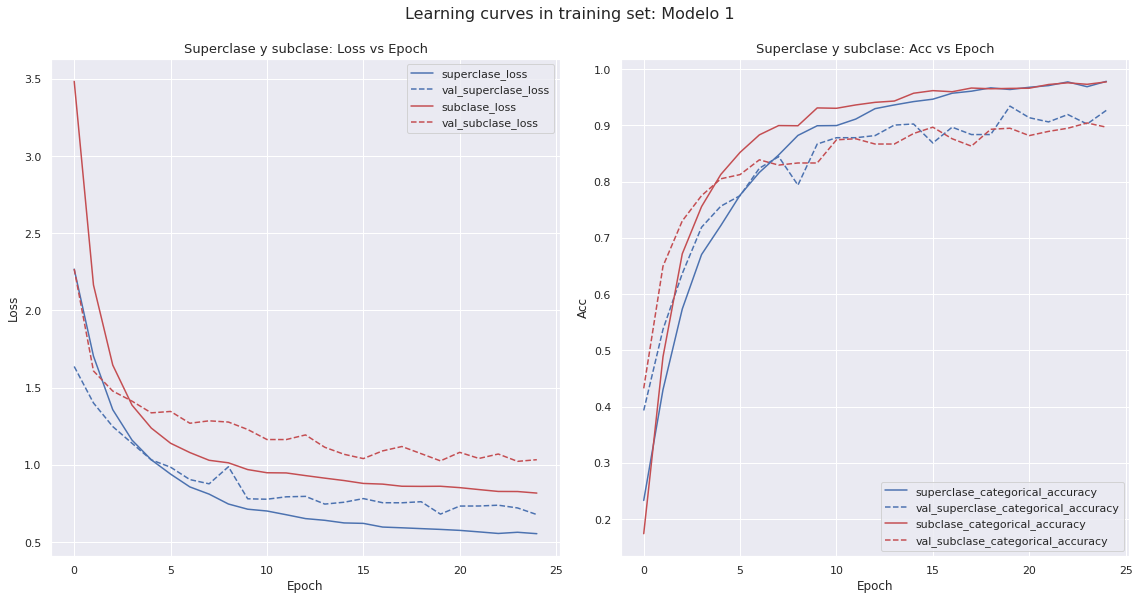

In [ ]:
plot(df=df1, model='Modelo 1')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model2/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history2 = model2.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 78s 508ms/step - loss: 2.4166 - superclase_loss: 2.0300 - subclase_loss: 3.9630 - superclase_categorical_accuracy: 0.3447 - subclase_categorical_accuracy: 0.0929 - val_loss: 1.6618 - val_superclase_loss: 1.3780 - val_subclase_loss: 2.7971 - val_superclase_categorical_accuracy: 0.5431 - val_subclase_categorical_accuracy: 0.2004
Epoch 2/50
95/95 [==============================] - 43s 456ms/step - loss: 1.5883 - superclase_loss: 1.2927 - subclase_loss: 2.7705 - superclase_categorical_accuracy: 0.6236 - subclase_categorical_accuracy: 0.3063 - val_loss: 1.2622 - val_superclase_loss: 1.0683 - val_subclase_loss: 2.0379 - val_superclase_categorical_accuracy: 0.7341 - val_subclase_categorical_accuracy: 0.4700
Epoch 3/50
95/95 [==============================] - 43s 451ms/step - loss: 1.1822 - superclase_loss: 0.9711 - subclase_loss: 2.0265 - superclase_categorical_accuracy: 0.7839 - subclase_categorical_accuracy: 0.5086 - val_loss: 1.0180 - val

In [ ]:
! cp -r '/content/checkpoint_model2' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df2 = pd.DataFrame(history2.history)

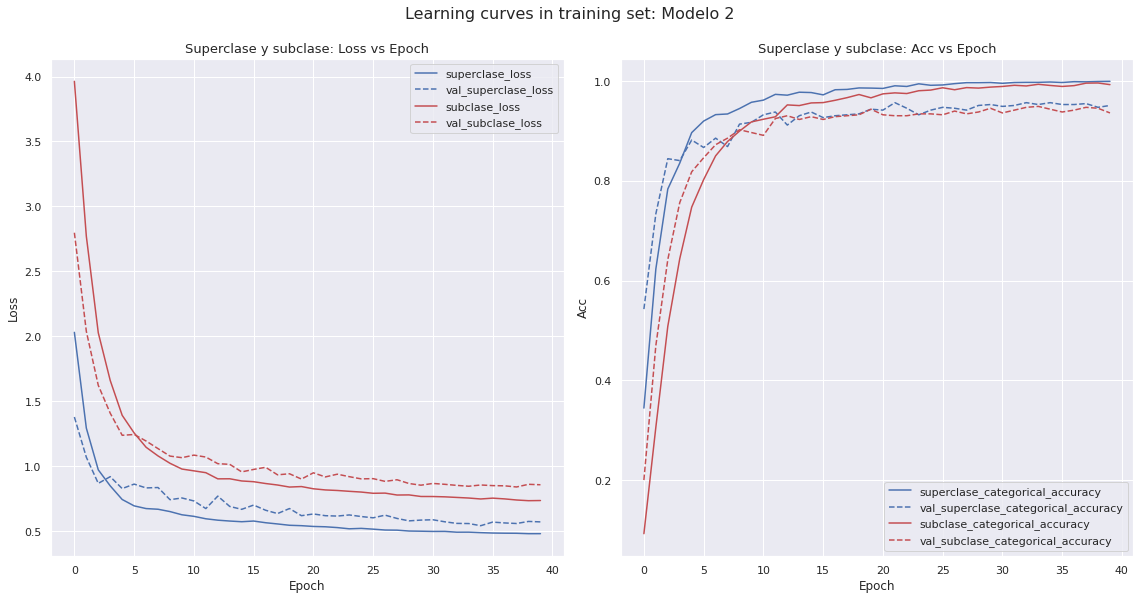

In [ ]:
plot(df=df2, model='Modelo 2')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model3/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history3 = model3.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 62s 393ms/step - loss: 3.2827 - superclase_loss: 2.1895 - subclase_loss: 3.7512 - superclase_categorical_accuracy: 0.2697 - subclase_categorical_accuracy: 0.1190 - val_loss: 2.2198 - val_superclase_loss: 1.5520 - val_subclase_loss: 2.5061 - val_superclase_categorical_accuracy: 0.4382 - val_subclase_categorical_accuracy: 0.3352
Epoch 2/50
95/95 [==============================] - 33s 350ms/step - loss: 2.1543 - superclase_loss: 1.6164 - subclase_loss: 2.3848 - superclase_categorical_accuracy: 0.4699 - subclase_categorical_accuracy: 0.4213 - val_loss: 1.6849 - val_superclase_loss: 1.3058 - val_subclase_loss: 1.8473 - val_superclase_categorical_accuracy: 0.6142 - val_subclase_categorical_accuracy: 0.5581
Epoch 3/50
95/95 [==============================] - 33s 350ms/step - loss: 1.5914 - superclase_loss: 1.2733 - subclase_loss: 1.7278 - superclase_categorical_accuracy: 0.6190 - subclase_categorical_accuracy: 0.6210 - val_loss: 1.4459 - val

In [ ]:
! cp -r '/content/checkpoint_model3' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df3 = pd.DataFrame(history3.history)

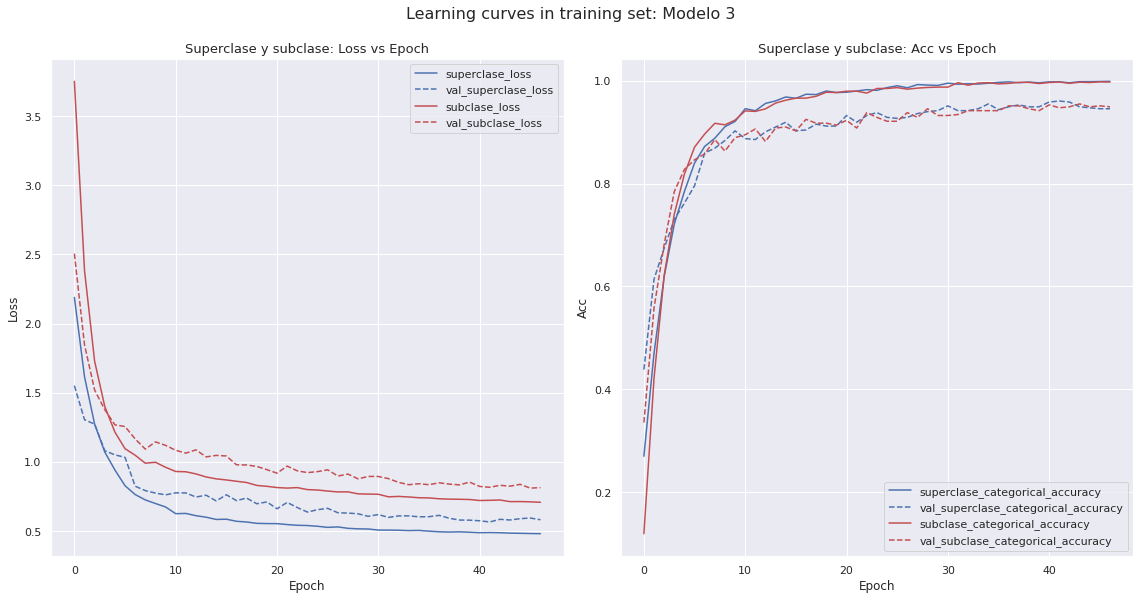

In [ ]:
plot(df=df3, model='Modelo 3')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model4/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history4 = model4.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 71s 404ms/step - loss: 2.6401 - superclase_loss: 2.1325 - subclase_loss: 3.8247 - superclase_categorical_accuracy: 0.3077 - subclase_categorical_accuracy: 0.1097 - val_loss: 1.6951 - val_superclase_loss: 1.3283 - val_subclase_loss: 2.5509 - val_superclase_categorical_accuracy: 0.5581 - val_subclase_categorical_accuracy: 0.2622
Epoch 2/50
95/95 [==============================] - 29s 309ms/step - loss: 1.7534 - superclase_loss: 1.3818 - subclase_loss: 2.6204 - superclase_categorical_accuracy: 0.5859 - subclase_categorical_accuracy: 0.3424 - val_loss: 1.2239 - val_superclase_loss: 0.9603 - val_subclase_loss: 1.8390 - val_superclase_categorical_accuracy: 0.7753 - val_subclase_categorical_accuracy: 0.5618
Epoch 3/50
95/95 [==============================] - 29s 310ms/step - loss: 1.3263 - superclase_loss: 1.0617 - subclase_loss: 1.9437 - superclase_categorical_accuracy: 0.7393 - subclase_categorical_accuracy: 0.5492 - val_loss: 1.0750 - val

In [ ]:
! cp -r '/content/checkpoint_model4' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df4 = pd.DataFrame(history4.history)

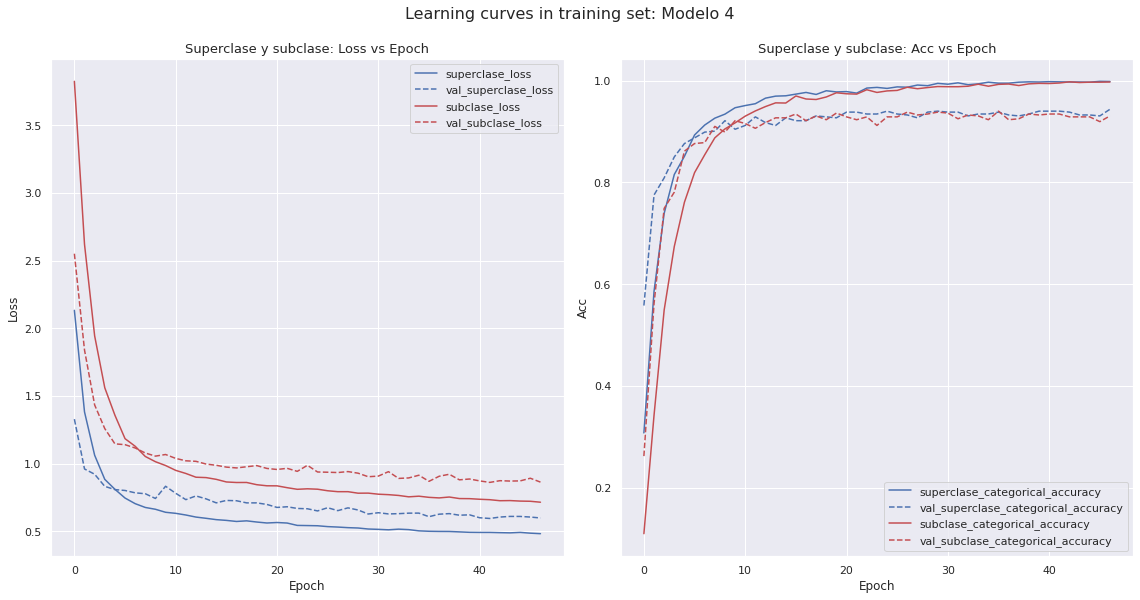

In [ ]:
plot(df=df4, model='Modelo 4')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model5/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history5 = model5.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 69s 405ms/step - loss: 3.0506 - superclase_loss: 2.1990 - subclase_loss: 3.9022 - superclase_categorical_accuracy: 0.2839 - subclase_categorical_accuracy: 0.0948 - val_loss: 2.1229 - val_superclase_loss: 1.5087 - val_subclase_loss: 2.7370 - val_superclase_categorical_accuracy: 0.4644 - val_subclase_categorical_accuracy: 0.2509
Epoch 2/50
95/95 [==============================] - 32s 333ms/step - loss: 2.1851 - superclase_loss: 1.5471 - subclase_loss: 2.8231 - superclase_categorical_accuracy: 0.5069 - subclase_categorical_accuracy: 0.2812 - val_loss: 1.6448 - val_superclase_loss: 1.2320 - val_subclase_loss: 2.0575 - val_superclase_categorical_accuracy: 0.6199 - val_subclase_categorical_accuracy: 0.4906
Epoch 3/50
95/95 [==============================] - 32s 332ms/step - loss: 1.6758 - superclase_loss: 1.2229 - subclase_loss: 2.1287 - superclase_categorical_accuracy: 0.6451 - subclase_categorical_accuracy: 0.4722 - val_loss: 1.3985 - val

In [ ]:
! cp -r '/content/checkpoint_model5' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df5 = pd.DataFrame(history5.history)

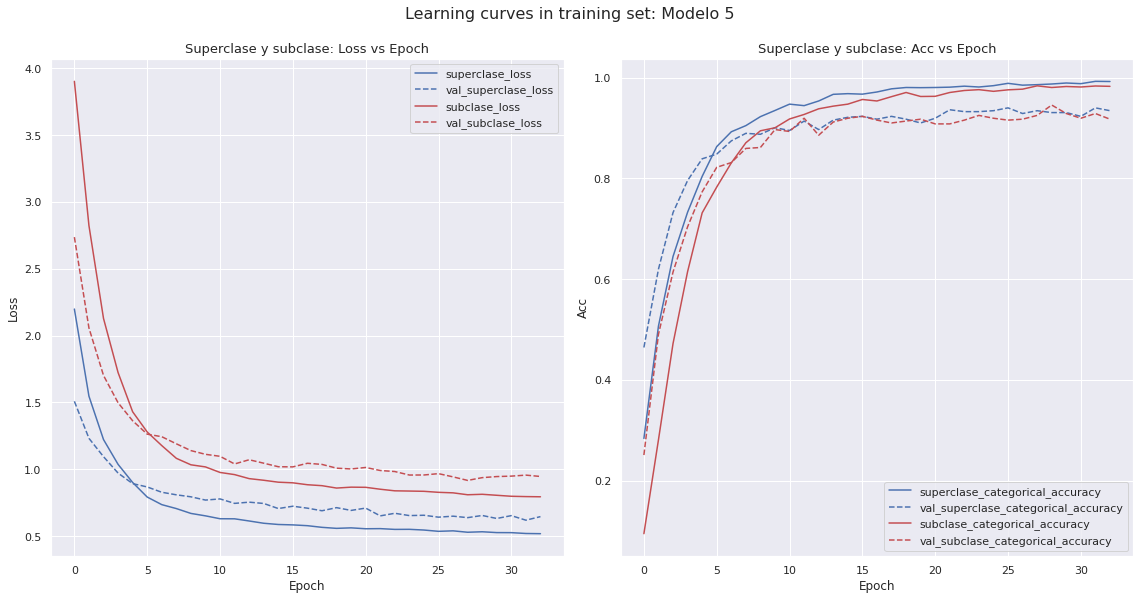

In [ ]:
plot(df=df5, model='Modelo 5')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model6/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history6 = model6.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 300s 692ms/step - loss: 3.0118 - superclase_loss: 1.7480 - subclase_loss: 3.1522 - superclase_categorical_accuracy: 0.3387 - subclase_categorical_accuracy: 0.1576 - val_loss: 8430.4727 - val_superclase_loss: 4672.1782 - val_subclase_loss: 8848.0615 - val_superclase_categorical_accuracy: 0.1629 - val_subclase_categorical_accuracy: 0.0487
Epoch 2/50
95/95 [==============================] - 43s 456ms/step - loss: 2.4488 - superclase_loss: 1.4760 - subclase_loss: 2.5568 - superclase_categorical_accuracy: 0.4831 - subclase_categorical_accuracy: 0.2799 - val_loss: 37.1892 - val_superclase_loss: 20.3009 - val_subclase_loss: 39.0657 - val_superclase_categorical_accuracy: 0.3184 - val_subclase_categorical_accuracy: 0.1142
Epoch 3/50
95/95 [==============================] - 43s 454ms/step - loss: 2.1253 - superclase_loss: 1.3135 - subclase_loss: 2.2155 - superclase_categorical_accuracy: 0.5668 - subclase_categorical_accuracy: 0.3843 - val_loss:

In [ ]:
! cp -r '/content/checkpoint_model6' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df6 = pd.DataFrame(history6.history)

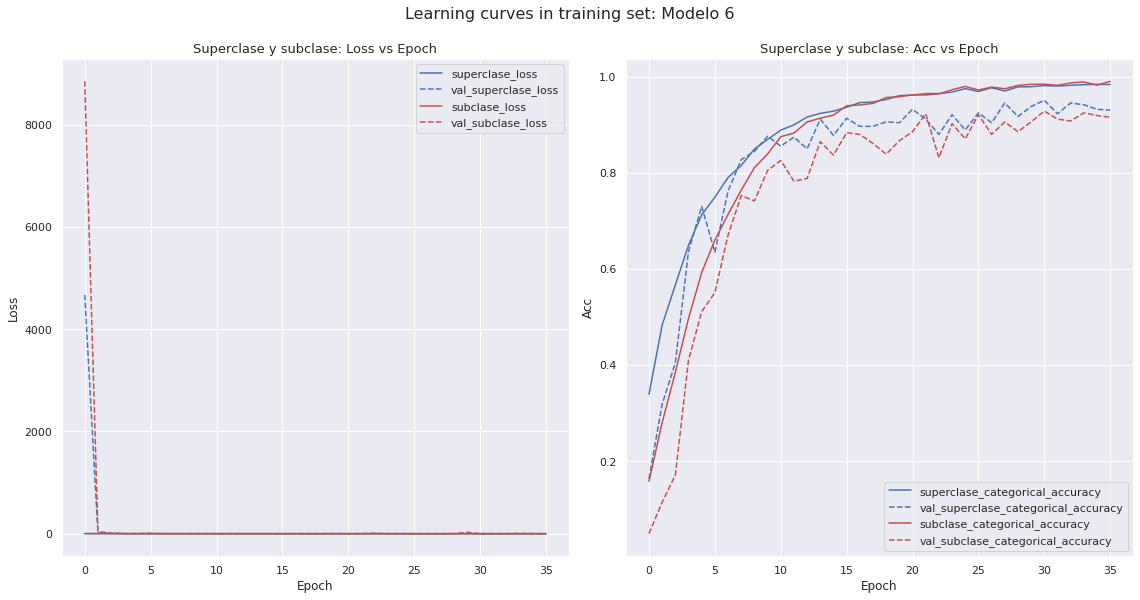

In [ ]:
plot(df=df6, model='Modelo 6')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model7/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history7 = model7.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 354s 627ms/step - loss: 1.5245 - superclase_loss: 1.4578 - subclase_loss: 2.1246 - superclase_categorical_accuracy: 0.6210 - subclase_categorical_accuracy: 0.5165 - val_loss: 18.8447 - val_superclase_loss: 20.2219 - val_subclase_loss: 6.4497 - val_superclase_categorical_accuracy: 0.2790 - val_subclase_categorical_accuracy: 0.3689
Epoch 2/50
95/95 [==============================] - 28s 290ms/step - loss: 0.9323 - superclase_loss: 0.8926 - subclase_loss: 1.2890 - superclase_categorical_accuracy: 0.8153 - subclase_categorical_accuracy: 0.7878 - val_loss: 1.3649 - val_superclase_loss: 1.3031 - val_subclase_loss: 1.9212 - val_superclase_categorical_accuracy: 0.7753 - val_subclase_categorical_accuracy: 0.7528
Epoch 3/50
95/95 [==============================] - 29s 301ms/step - loss: 0.7818 - superclase_loss: 0.7523 - subclase_loss: 1.0476 - superclase_categorical_accuracy: 0.8764 - subclase_categorical_accuracy: 0.8771 - val_loss: 2.3038 - 

In [ ]:
! cp -r '/content/checkpoint_model7' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df7 = pd.DataFrame(history7.history)

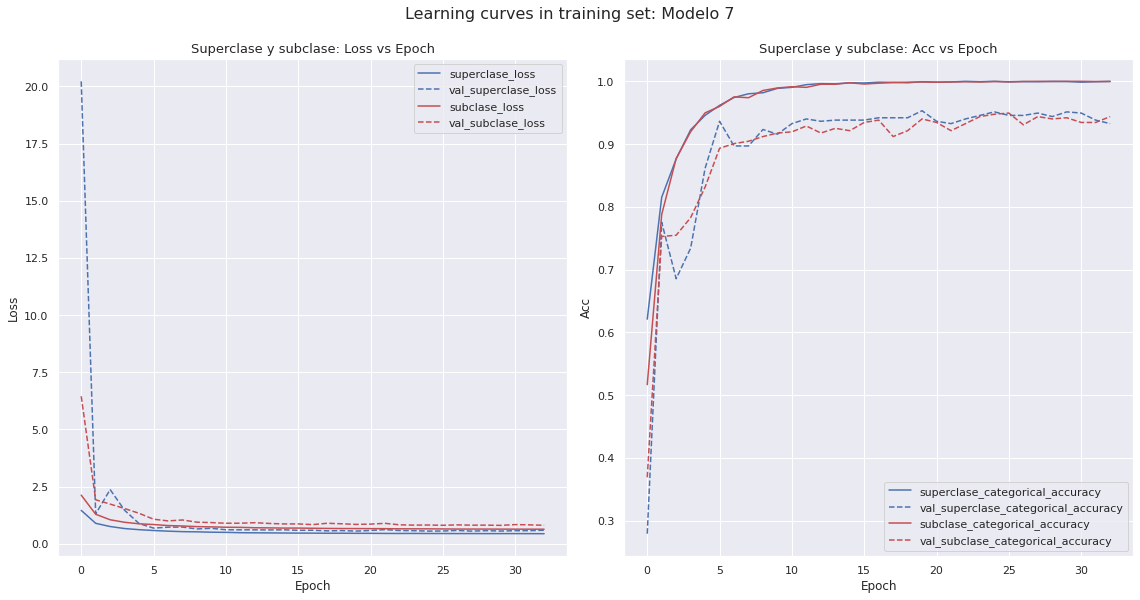

In [ ]:
plot(df=df7, model='Modelo 7')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model8/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history8 = model8.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 34s 190ms/step - loss: 1.9900 - superclase_loss: 1.5692 - subclase_loss: 2.3343 - superclase_categorical_accuracy: 0.5380 - subclase_categorical_accuracy: 0.4521 - val_loss: 2.1508 - val_superclase_loss: 1.6078 - val_subclase_loss: 2.5950 - val_superclase_categorical_accuracy: 0.5393 - val_subclase_categorical_accuracy: 0.4813
Epoch 2/50
95/95 [==============================] - 13s 138ms/step - loss: 1.2002 - superclase_loss: 0.9992 - subclase_loss: 1.3647 - superclase_categorical_accuracy: 0.7389 - subclase_categorical_accuracy: 0.7469 - val_loss: 1.3054 - val_superclase_loss: 1.0823 - val_subclase_loss: 1.4880 - val_superclase_categorical_accuracy: 0.7303 - val_subclase_categorical_accuracy: 0.7135
Epoch 3/50
95/95 [==============================] - 13s 138ms/step - loss: 0.9707 - superclase_loss: 0.8288 - subclase_loss: 1.0868 - superclase_categorical_accuracy: 0.8315 - subclase_categorical_accuracy: 0.8589 - val_loss: 1.1099 - val

In [ ]:
! cp -r '/content/checkpoint_model8' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df8 = pd.DataFrame(history8.history)

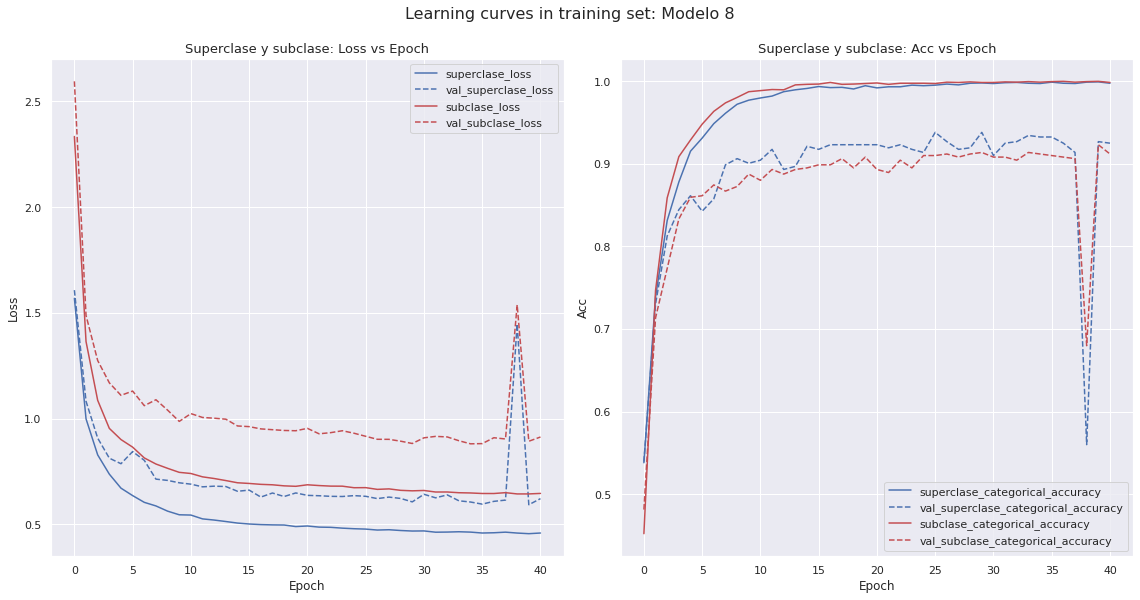

In [ ]:
plot(df=df8, model='Modelo 8')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model9/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history9 = model9.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 32s 181ms/step - loss: 1.8944 - superclase_loss: 1.5615 - subclase_loss: 2.3014 - superclase_categorical_accuracy: 0.5294 - subclase_categorical_accuracy: 0.4468 - val_loss: 2.2377 - val_superclase_loss: 1.9500 - val_subclase_loss: 2.5895 - val_superclase_categorical_accuracy: 0.5187 - val_subclase_categorical_accuracy: 0.5019
Epoch 2/50
95/95 [==============================] - 13s 140ms/step - loss: 1.1498 - superclase_loss: 0.9836 - subclase_loss: 1.3530 - superclase_categorical_accuracy: 0.7571 - subclase_categorical_accuracy: 0.7488 - val_loss: 1.3033 - val_superclase_loss: 1.1204 - val_subclase_loss: 1.5269 - val_superclase_categorical_accuracy: 0.6948 - val_subclase_categorical_accuracy: 0.6929
Epoch 3/50
95/95 [==============================] - 13s 138ms/step - loss: 0.9443 - superclase_loss: 0.8090 - subclase_loss: 1.1097 - superclase_categorical_accuracy: 0.8460 - subclase_categorical_accuracy: 0.8503 - val_loss: 1.0558 - val

In [ ]:
! cp -r '/content/checkpoint_model9' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df9 = pd.DataFrame(history9.history)

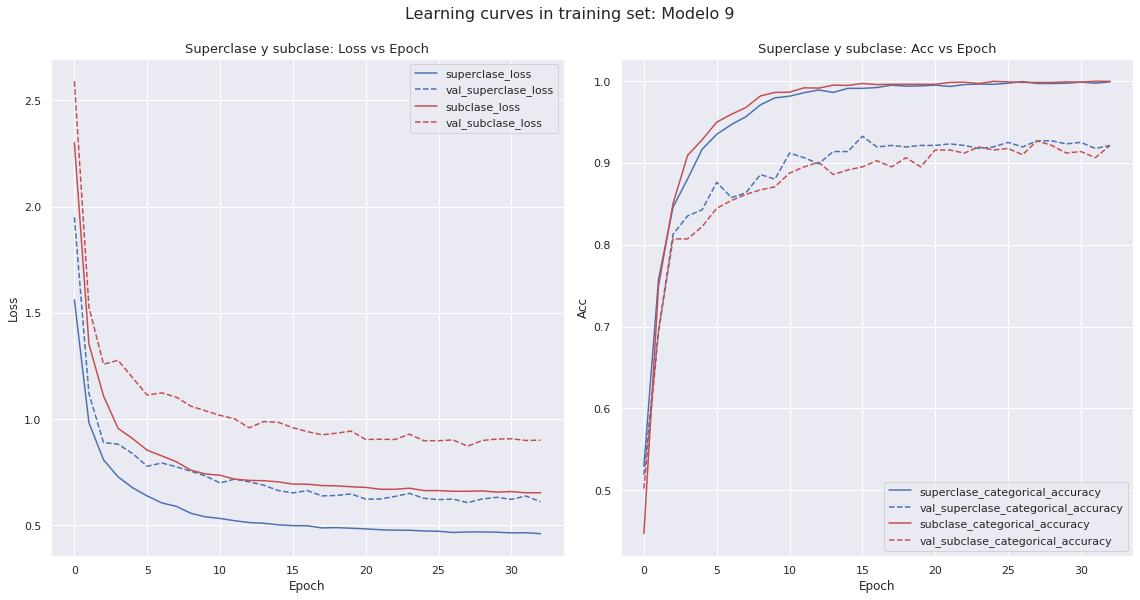

In [ ]:
plot(df=df9, model='Modelo 9')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model10/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history10 = model10.fit(train_dataset_over, epochs=50, validation_data=val_dataset_over, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 275s 553ms/step - loss: 2.4202 - superclase_loss: 1.8411 - subclase_loss: 3.1280 - superclase_categorical_accuracy: 0.3483 - subclase_categorical_accuracy: 0.1854 - val_loss: 2.3709 - val_superclase_loss: 1.8013 - val_subclase_loss: 3.0672 - val_superclase_categorical_accuracy: 0.2004 - val_subclase_categorical_accuracy: 0.0281
Epoch 2/50
95/95 [==============================] - 32s 332ms/step - loss: 1.6589 - superclase_loss: 1.3192 - subclase_loss: 2.0741 - superclase_categorical_accuracy: 0.5770 - subclase_categorical_accuracy: 0.5188 - val_loss: 2.5142 - val_superclase_loss: 1.9359 - val_subclase_loss: 3.2210 - val_superclase_categorical_accuracy: 0.2041 - val_subclase_categorical_accuracy: 0.0431
Epoch 3/50
95/95 [==============================] - 32s 333ms/step - loss: 1.1935 - superclase_loss: 1.0181 - subclase_loss: 1.4078 - superclase_categorical_accuracy: 0.7462 - subclase_categorical_accuracy: 0.7535 - val_loss: 2.4541 - va

In [ ]:
! cp -r '/content/checkpoint_model10' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df10 = pd.DataFrame(history10.history)

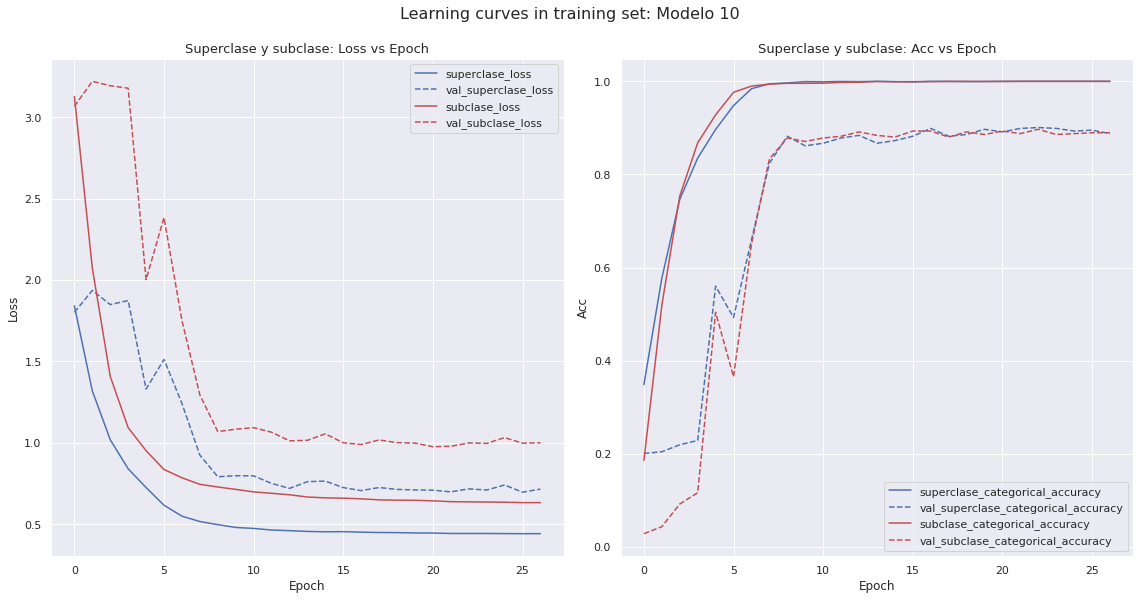

In [ ]:
plot(df=df10, model='Modelo 10')

### Entrenamiento 2

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model1_1/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history1 = model1.fit(train_dataset_1, epochs=50, validation_data=val_dataset_1, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 361s 2s/step - loss: 3.4962 - superclase_loss: 2.4023 - subclase_loss: 3.7697 - superclase_categorical_accuracy: 0.1951 - subclase_categorical_accuracy: 0.1114 - val_loss: 2.4312 - val_superclase_loss: 1.7990 - val_subclase_loss: 2.5893 - val_superclase_categorical_accuracy: 0.2669 - val_subclase_categorical_accuracy: 0.3343
Epoch 2/50
51/51 [==============================] - 71s 1s/step - loss: 2.3501 - superclase_loss: 1.8725 - subclase_loss: 2.4695 - superclase_categorical_accuracy: 0.3514 - subclase_categorical_accuracy: 0.3867 - val_loss: 1.9812 - val_superclase_loss: 1.6443 - val_subclase_loss: 2.0654 - val_superclase_categorical_accuracy: 0.3792 - val_subclase_categorical_accuracy: 0.5281
Epoch 3/50
51/51 [==============================] - 73s 1s/step - loss: 1.8088 - superclase_loss: 1.5670 - subclase_loss: 1.8692 - superclase_categorical_accuracy: 0.4806 - subclase_categorical_accuracy: 0.5724 - val_loss: 1.6313 - val_supercl

In [ ]:
! cp -r '/content/checkpoint_model1_1' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df1 = pd.DataFrame(history1.history)

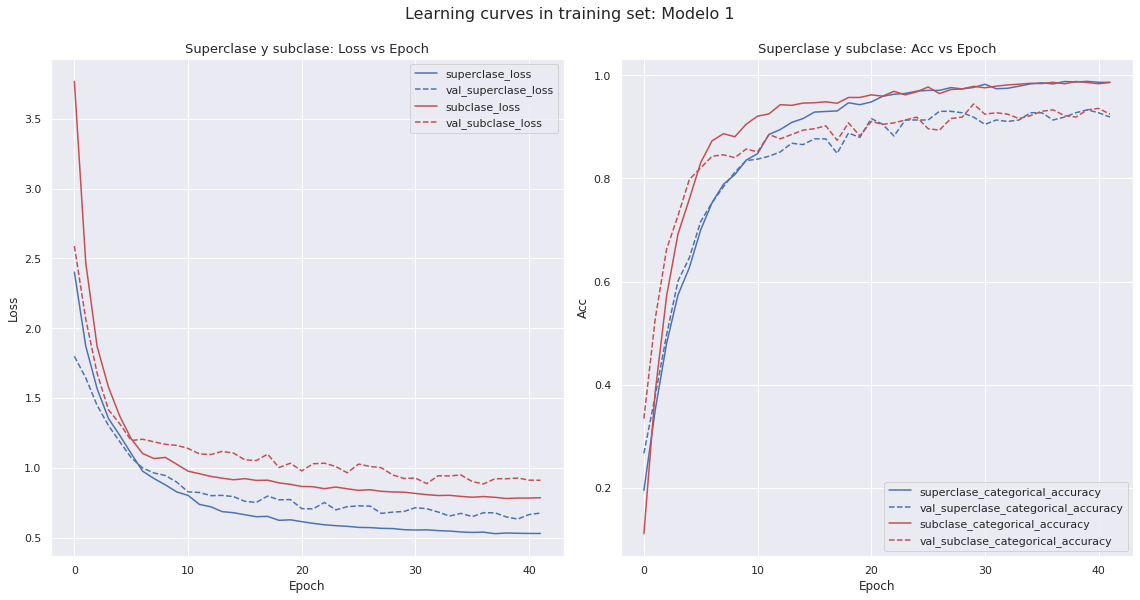

In [ ]:
plot(df=df1, model='Modelo 1')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model2_2/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history2 = model2.fit(train_dataset_2, epochs=50, validation_data=val_dataset_2, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 108s 923ms/step - loss: 2.6625 - superclase_loss: 2.2934 - subclase_loss: 4.1392 - superclase_categorical_accuracy: 0.2534 - subclase_categorical_accuracy: 0.0690 - val_loss: 1.8777 - val_superclase_loss: 1.5753 - val_subclase_loss: 3.0871 - val_superclase_categorical_accuracy: 0.4410 - val_subclase_categorical_accuracy: 0.1152
Epoch 2/50
51/51 [==============================] - 38s 745ms/step - loss: 1.8869 - superclase_loss: 1.5286 - subclase_loss: 3.3201 - superclase_categorical_accuracy: 0.5162 - subclase_categorical_accuracy: 0.1735 - val_loss: 1.4558 - val_superclase_loss: 1.1854 - val_subclase_loss: 2.5373 - val_superclase_categorical_accuracy: 0.6433 - val_subclase_categorical_accuracy: 0.3202
Epoch 3/50
51/51 [==============================] - 38s 743ms/step - loss: 1.4407 - superclase_loss: 1.1679 - subclase_loss: 2.5319 - superclase_categorical_accuracy: 0.6919 - subclase_categorical_accuracy: 0.3702 - val_loss: 1.2160 - va

In [ ]:
! cp -r '/content/checkpoint_model2_2' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df2 = pd.DataFrame(history2.history)

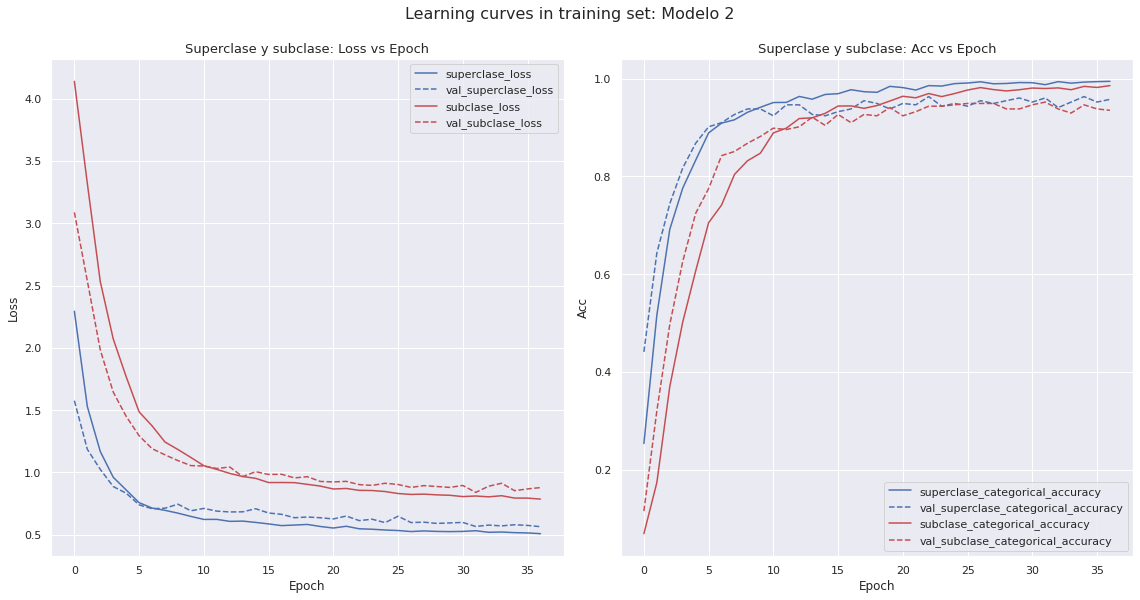

In [ ]:
plot(df=df2, model='Modelo 2')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model3_3/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history3 = model3.fit(train_dataset_3, epochs=50, validation_data=val_dataset_3, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 313s 981ms/step - loss: 3.5199 - superclase_loss: 2.3742 - subclase_loss: 4.0110 - superclase_categorical_accuracy: 0.2147 - subclase_categorical_accuracy: 0.0808 - val_loss: 2.4629 - val_superclase_loss: 1.6845 - val_subclase_loss: 2.7965 - val_superclase_categorical_accuracy: 0.3315 - val_subclase_categorical_accuracy: 0.2135
Epoch 2/50
51/51 [==============================] - 31s 601ms/step - loss: 2.5716 - superclase_loss: 1.8600 - subclase_loss: 2.8766 - superclase_categorical_accuracy: 0.3758 - subclase_categorical_accuracy: 0.2828 - val_loss: 2.0344 - val_superclase_loss: 1.4768 - val_subclase_loss: 2.2734 - val_superclase_categorical_accuracy: 0.4607 - val_subclase_categorical_accuracy: 0.4270
Epoch 3/50
51/51 [==============================] - 32s 618ms/step - loss: 1.9186 - superclase_loss: 1.4725 - subclase_loss: 2.1099 - superclase_categorical_accuracy: 0.5375 - subclase_categorical_accuracy: 0.4931 - val_loss: 1.6398 - va

In [ ]:
! cp -r '/content/checkpoint_model3_3' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df3 = pd.DataFrame(history3.history)

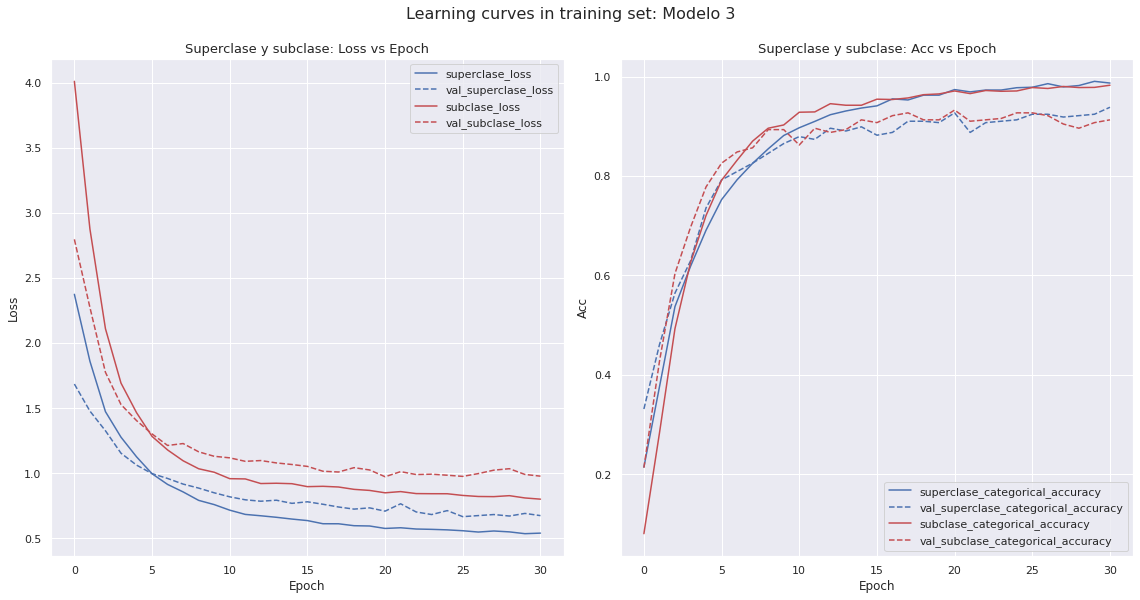

In [ ]:
plot(df=df3, model='Modelo 3')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model4_4/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history4 = model4.fit(train_dataset_4, epochs=50, validation_data=val_dataset_4, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 101s 800ms/step - loss: 2.8350 - superclase_loss: 2.3243 - subclase_loss: 4.0267 - superclase_categorical_accuracy: 0.2394 - subclase_categorical_accuracy: 0.0724 - val_loss: 1.9267 - val_superclase_loss: 1.5159 - val_subclase_loss: 2.8851 - val_superclase_categorical_accuracy: 0.4410 - val_subclase_categorical_accuracy: 0.1039
Epoch 2/50
51/51 [==============================] - 28s 548ms/step - loss: 2.0462 - superclase_loss: 1.5676 - subclase_loss: 3.1631 - superclase_categorical_accuracy: 0.4997 - subclase_categorical_accuracy: 0.2082 - val_loss: 1.5157 - val_superclase_loss: 1.1754 - val_subclase_loss: 2.3098 - val_superclase_categorical_accuracy: 0.6882 - val_subclase_categorical_accuracy: 0.3764
Epoch 3/50
51/51 [==============================] - 28s 551ms/step - loss: 1.5412 - superclase_loss: 1.1912 - subclase_loss: 2.3578 - superclase_categorical_accuracy: 0.6664 - subclase_categorical_accuracy: 0.4154 - val_loss: 1.2397 - va

In [ ]:
! cp -r '/content/checkpoint_model4_4' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df4 = pd.DataFrame(history4.history)

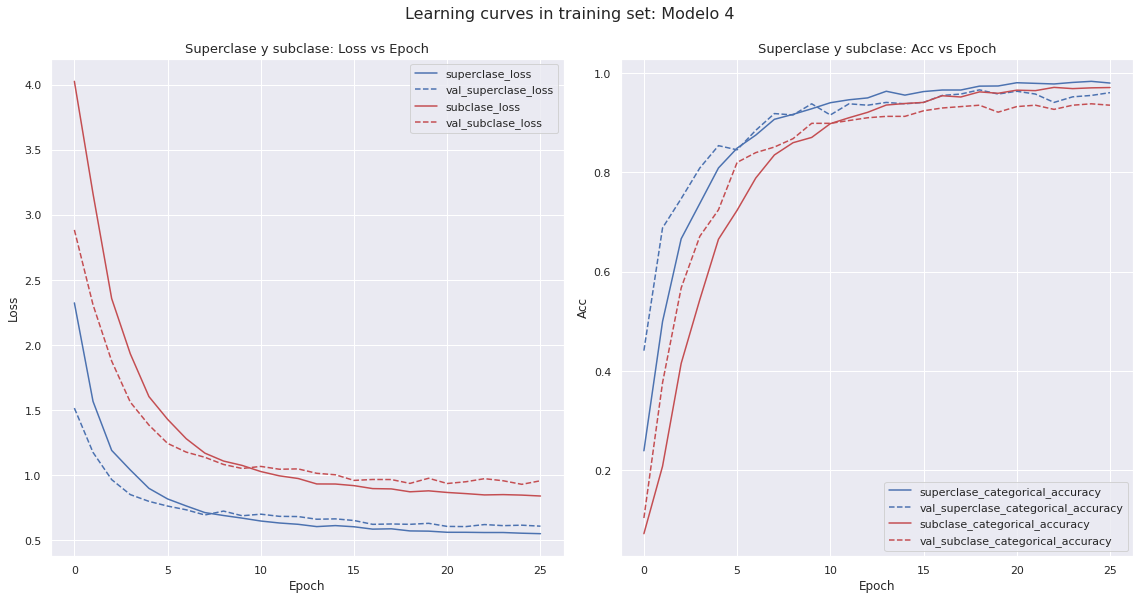

In [ ]:
plot(df=df4, model='Modelo 4')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model5_5/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history5 = model5.fit(train_dataset_5, epochs=50, validation_data=val_dataset_5, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 376s 990ms/step - loss: 3.2321 - superclase_loss: 2.3227 - subclase_loss: 4.1416 - superclase_categorical_accuracy: 0.2366 - subclase_categorical_accuracy: 0.0599 - val_loss: 2.2779 - val_superclase_loss: 1.6368 - val_subclase_loss: 2.9189 - val_superclase_categorical_accuracy: 0.3989 - val_subclase_categorical_accuracy: 0.0955
Epoch 2/50
51/51 [==============================] - 29s 571ms/step - loss: 2.5068 - superclase_loss: 1.7827 - subclase_loss: 3.2308 - superclase_categorical_accuracy: 0.4135 - subclase_categorical_accuracy: 0.1767 - val_loss: 1.9271 - val_superclase_loss: 1.4119 - val_subclase_loss: 2.4423 - val_superclase_categorical_accuracy: 0.5140 - val_subclase_categorical_accuracy: 0.3287
Epoch 3/50
51/51 [==============================] - 30s 582ms/step - loss: 2.0095 - superclase_loss: 1.4380 - subclase_loss: 2.5810 - superclase_categorical_accuracy: 0.5518 - subclase_categorical_accuracy: 0.3414 - val_loss: 1.6348 - va

In [ ]:
! cp -r '/content/checkpoint_model5_5' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df5 = pd.DataFrame(history5.history)

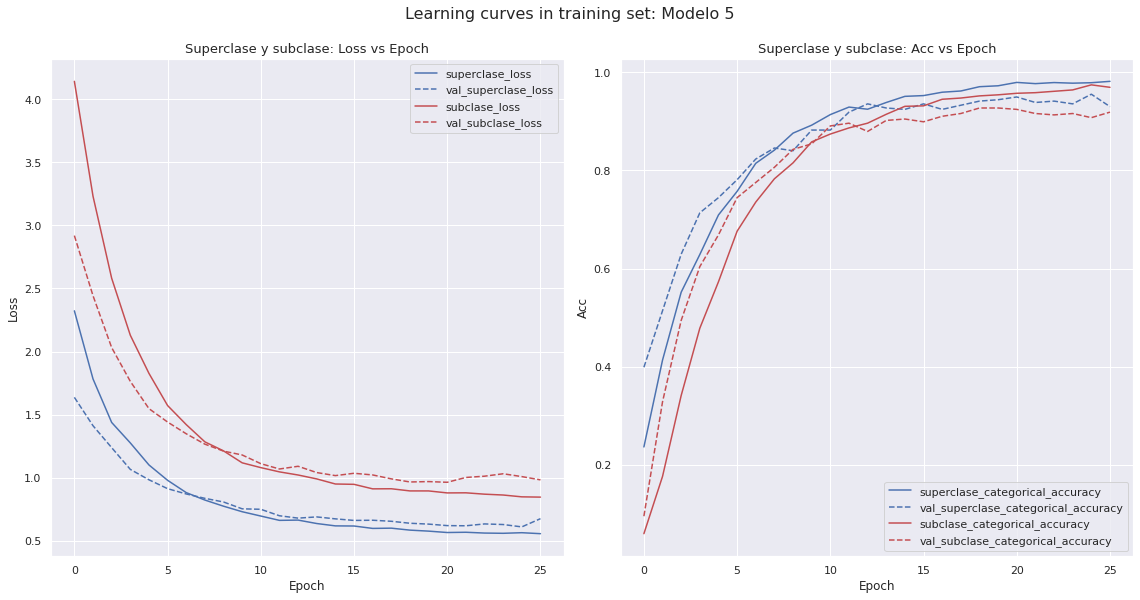

In [ ]:
plot(df=df5, model='Modelo 5')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model6_6/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history6 = model6.fit(train_dataset_6, epochs=50, validation_data=val_dataset_6, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 51s 760ms/step - loss: 2.5213 - superclase_loss: 1.9578 - subclase_loss: 2.5839 - superclase_categorical_accuracy: 0.3383 - subclase_categorical_accuracy: 0.4223 - val_loss: 1.8779 - val_superclase_loss: 1.5950 - val_subclase_loss: 1.9093 - val_superclase_categorical_accuracy: 0.4747 - val_subclase_categorical_accuracy: 0.6236
Epoch 2/50
51/51 [==============================] - 36s 714ms/step - loss: 1.4490 - superclase_loss: 1.3577 - subclase_loss: 1.4592 - superclase_categorical_accuracy: 0.5730 - subclase_categorical_accuracy: 0.7385 - val_loss: 1.2658 - val_superclase_loss: 1.1287 - val_subclase_loss: 1.2810 - val_superclase_categorical_accuracy: 0.6854 - val_subclase_categorical_accuracy: 0.8230
Epoch 3/50
51/51 [==============================] - 38s 742ms/step - loss: 1.1538 - superclase_loss: 1.1266 - subclase_loss: 1.1568 - superclase_categorical_accuracy: 0.6810 - subclase_categorical_accuracy: 0.8580 - val_loss: 1.2353 - val

In [ ]:
! cp -r '/content/checkpoint_model6_6' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df6 = pd.DataFrame(history6.history)

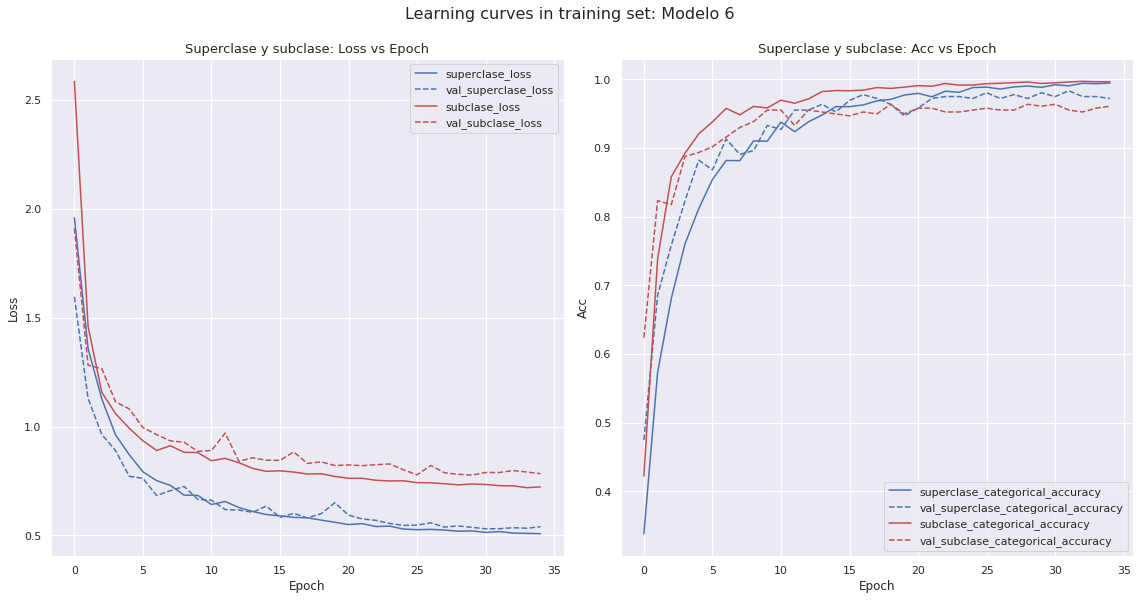

In [ ]:
plot(df=df6, model='Modelo 6')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model7_7/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history7 = model7.fit(train_dataset_7, epochs=50, validation_data=val_dataset_7, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 351s 1s/step - loss: 1.6679 - superclase_loss: 1.5358 - subclase_loss: 2.8566 - superclase_categorical_accuracy: 0.5740 - subclase_categorical_accuracy: 0.3190 - val_loss: 1.1129 - val_superclase_loss: 1.0222 - val_subclase_loss: 1.9283 - val_superclase_categorical_accuracy: 0.7219 - val_subclase_categorical_accuracy: 0.5309
Epoch 2/50
51/51 [==============================] - 26s 517ms/step - loss: 1.0071 - superclase_loss: 0.9353 - subclase_loss: 1.6530 - superclase_categorical_accuracy: 0.8121 - subclase_categorical_accuracy: 0.6439 - val_loss: 0.9723 - val_superclase_loss: 0.9198 - val_subclase_loss: 1.4445 - val_superclase_categorical_accuracy: 0.7669 - val_subclase_categorical_accuracy: 0.7416
Epoch 3/50
51/51 [==============================] - 27s 523ms/step - loss: 0.8413 - superclase_loss: 0.7912 - subclase_loss: 1.2919 - superclase_categorical_accuracy: 0.8770 - subclase_categorical_accuracy: 0.7828 - val_loss: 0.9049 - val_s

In [ ]:
! cp -r '/content/checkpoint_model7_7' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df7 = pd.DataFrame(history7.history)

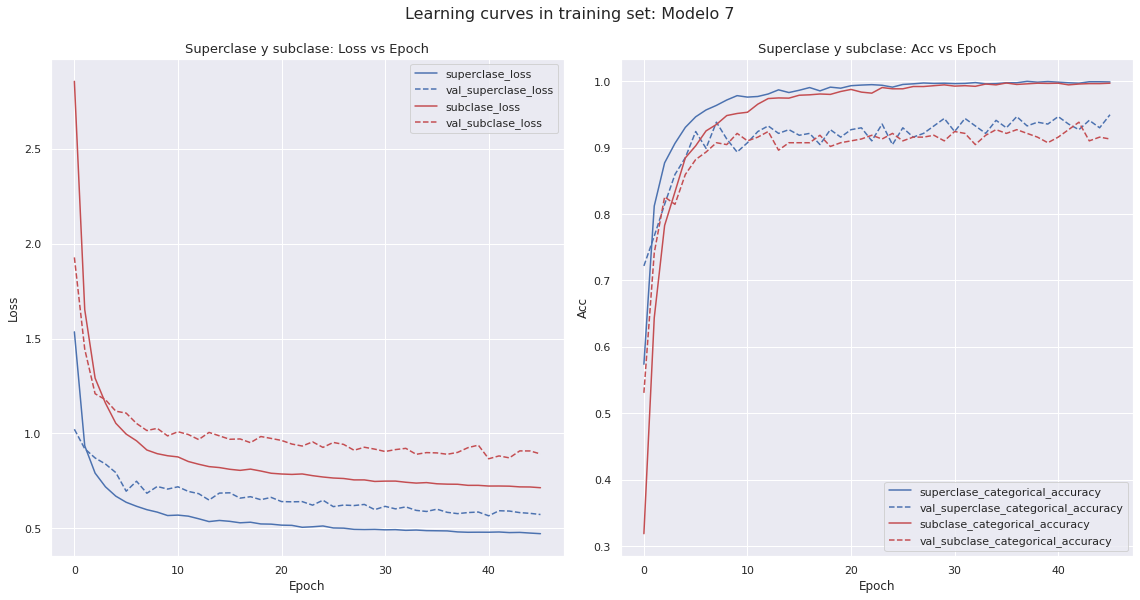

In [ ]:
plot(df=df7, model='Modelo 7')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model8_8/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history8 = model8.fit(train_dataset_8, epochs=50, validation_data=val_dataset_8, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 64s 406ms/step - loss: 2.2520 - superclase_loss: 1.8550 - subclase_loss: 2.5768 - superclase_categorical_accuracy: 0.4092 - subclase_categorical_accuracy: 0.3446 - val_loss: 1.7502 - val_superclase_loss: 1.3593 - val_subclase_loss: 2.0700 - val_superclase_categorical_accuracy: 0.5225 - val_subclase_categorical_accuracy: 0.4860
Epoch 2/50
51/51 [==============================] - 12s 233ms/step - loss: 1.3737 - superclase_loss: 1.2318 - subclase_loss: 1.4897 - superclase_categorical_accuracy: 0.6464 - subclase_categorical_accuracy: 0.6988 - val_loss: 1.4399 - val_superclase_loss: 1.1924 - val_subclase_loss: 1.6425 - val_superclase_categorical_accuracy: 0.6517 - val_subclase_categorical_accuracy: 0.6629
Epoch 3/50
51/51 [==============================] - 12s 233ms/step - loss: 1.1149 - superclase_loss: 1.0164 - subclase_loss: 1.1956 - superclase_categorical_accuracy: 0.7500 - subclase_categorical_accuracy: 0.8171 - val_loss: 1.2891 - val

In [ ]:
! cp -r '/content/checkpoint_model8_8' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df8 = pd.DataFrame(history8.history)

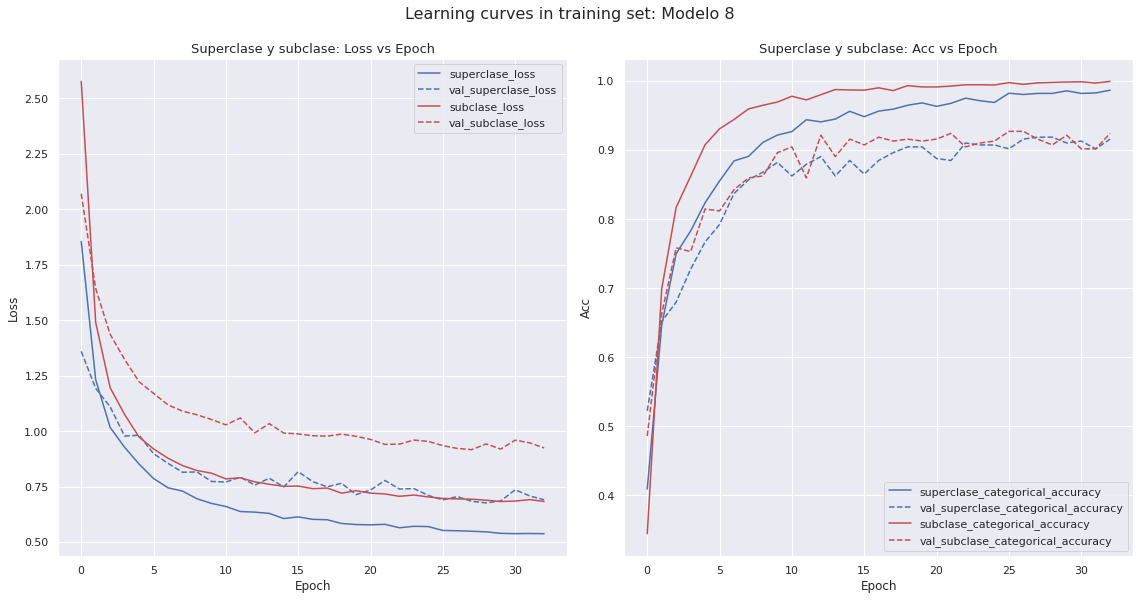

In [ ]:
plot(df=df8, model='Modelo 8')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model9_9/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history9 = model9.fit(train_dataset_9, epochs=50, validation_data=val_dataset_9, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 65s 432ms/step - loss: 2.1852 - superclase_loss: 1.8437 - subclase_loss: 2.6026 - superclase_categorical_accuracy: 0.4232 - subclase_categorical_accuracy: 0.3336 - val_loss: 1.6729 - val_superclase_loss: 1.3186 - val_subclase_loss: 2.1060 - val_superclase_categorical_accuracy: 0.5927 - val_subclase_categorical_accuracy: 0.5000
Epoch 2/50
51/51 [==============================] - 12s 236ms/step - loss: 1.3531 - superclase_loss: 1.1996 - subclase_loss: 1.5409 - superclase_categorical_accuracy: 0.6586 - subclase_categorical_accuracy: 0.6692 - val_loss: 1.3841 - val_superclase_loss: 1.1254 - val_subclase_loss: 1.7002 - val_superclase_categorical_accuracy: 0.6685 - val_subclase_categorical_accuracy: 0.6433
Epoch 3/50
51/51 [==============================] - 12s 234ms/step - loss: 1.1148 - superclase_loss: 1.0115 - subclase_loss: 1.2411 - superclase_categorical_accuracy: 0.7537 - subclase_categorical_accuracy: 0.8021 - val_loss: 1.2183 - val

In [ ]:
! cp -r '/content/checkpoint_model9_9' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df9 = pd.DataFrame(history9.history)

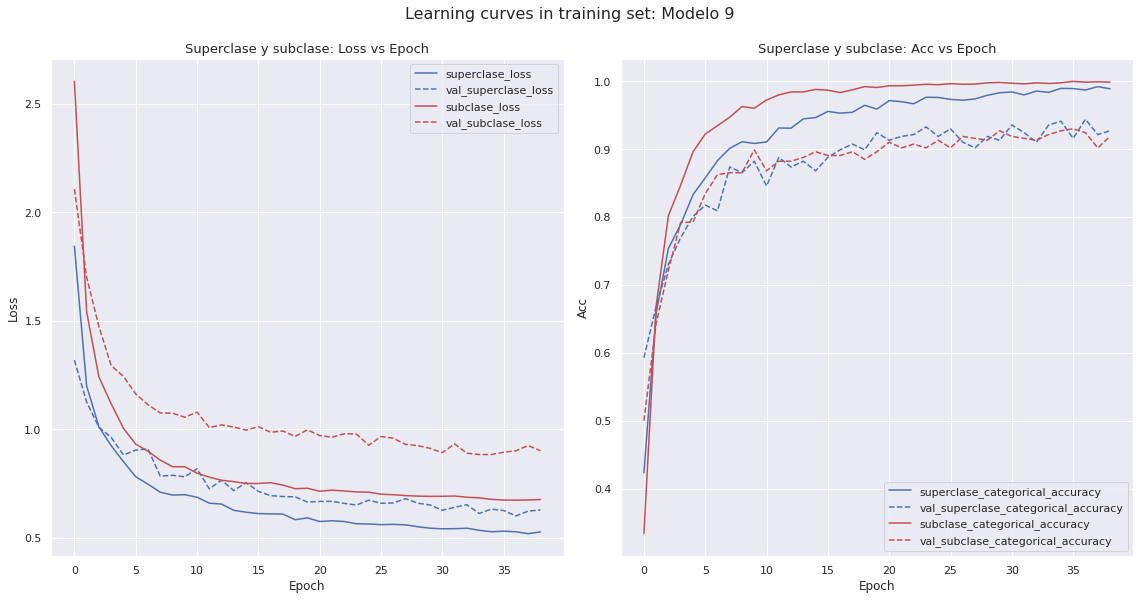

In [ ]:
plot(df=df9, model='Modelo 9')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model10_10/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history10 = model10.fit(train_dataset_10, epochs=50, validation_data=val_dataset_10, callbacks=callbacks_list)

Epoch 1/50
51/51 [==============================] - 29s 463ms/step - loss: 2.5490 - superclase_loss: 1.9539 - subclase_loss: 3.2764 - superclase_categorical_accuracy: 0.3243 - subclase_categorical_accuracy: 0.1835 - val_loss: 2.3489 - val_superclase_loss: 1.7973 - val_subclase_loss: 3.0230 - val_superclase_categorical_accuracy: 0.2528 - val_subclase_categorical_accuracy: 0.0506
Epoch 2/50
51/51 [==============================] - 23s 446ms/step - loss: 1.9309 - superclase_loss: 1.4789 - subclase_loss: 2.4833 - superclase_categorical_accuracy: 0.4972 - subclase_categorical_accuracy: 0.3705 - val_loss: 2.4147 - val_superclase_loss: 1.8747 - val_subclase_loss: 3.0748 - val_superclase_categorical_accuracy: 0.1011 - val_subclase_categorical_accuracy: 0.0506
Epoch 3/50
51/51 [==============================] - 23s 446ms/step - loss: 1.6491 - superclase_loss: 1.3065 - subclase_loss: 2.0680 - superclase_categorical_accuracy: 0.5840 - subclase_categorical_accuracy: 0.4881 - val_loss: 2.4740 - val

In [ ]:
! cp -r '/content/checkpoint_model10_10' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df10 = pd.DataFrame(history10.history)

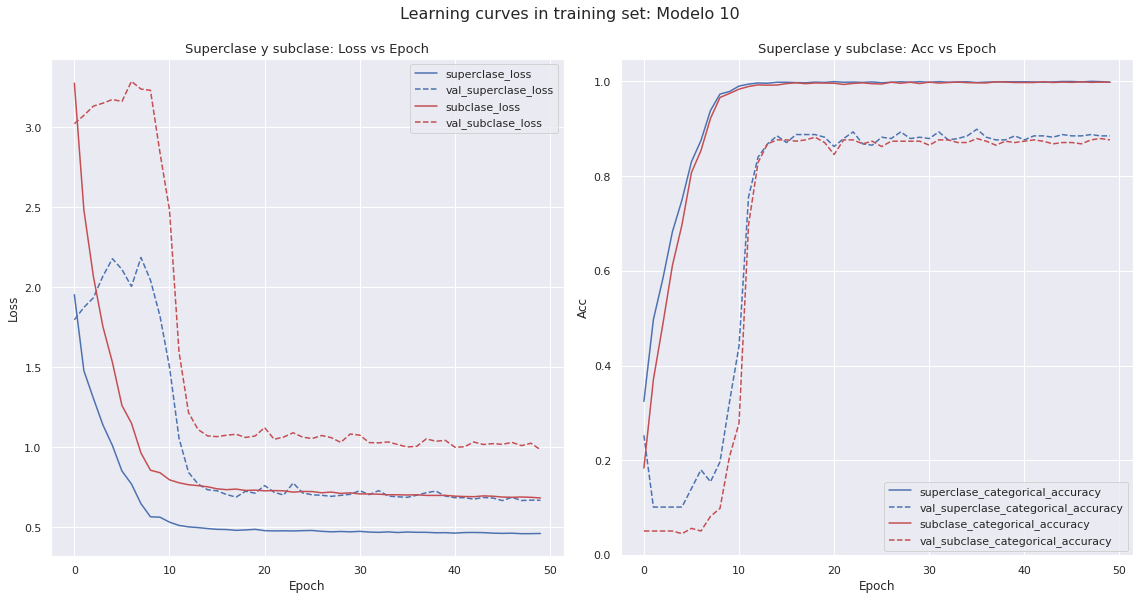

In [ ]:
plot(df=df10, model='Modelo 10')

### Entrenamiento Meta Classifier

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model_meta_1/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history_meta_1 = meta_classifier_1.fit(train_dataset_11, epochs=50, validation_data=val_dataset_11, callbacks=callbacks_list)

Epoch 1/50
101/101 [==============================] - 451s 2s/step - loss: 5.1600 - meta_superclase_loss: 1.7502 - meta_subclase_loss: 3.4098 - meta_superclase_categorical_accuracy: 0.4560 - meta_subclase_categorical_accuracy: 0.1277 - val_loss: 4.4413 - val_meta_superclase_loss: 1.5164 - val_meta_subclase_loss: 2.9249 - val_meta_superclase_categorical_accuracy: 0.5955 - val_meta_subclase_categorical_accuracy: 0.0506
Epoch 2/50
101/101 [==============================] - 142s 1s/step - loss: 2.9892 - meta_superclase_loss: 0.7256 - meta_subclase_loss: 2.2637 - meta_superclase_categorical_accuracy: 0.8873 - meta_subclase_categorical_accuracy: 0.3689 - val_loss: 3.7999 - val_meta_superclase_loss: 1.1653 - val_meta_subclase_loss: 2.6346 - val_meta_superclase_categorical_accuracy: 0.9242 - val_meta_subclase_categorical_accuracy: 0.2051
Epoch 3/50
101/101 [==============================] - 143s 1s/step - loss: 2.2120 - meta_superclase_loss: 0.6148 - meta_subclase_loss: 1.5972 - meta_superclas

In [ ]:
! cp -r '/content/checkpoint_model_meta_1' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df_meta_1 = pd.DataFrame(history_meta_1.history)
df_meta_1.head()

loss  ...  val_meta_subclase_categorical_accuracy
0  5.160045  ...                                0.050562
1  2.989239  ...                                0.205056
2  2.212018  ...                                0.556180
3  1.868670  ...                                0.969101
4  1.696750  ...                                0.988764

[5 rows x 10 columns]

In [ ]:
def plot(df, model):

  # create figure (fig), and array of axes (ax)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
  fig.suptitle('Learning curves in training set: '+ model, fontsize=16, y=1.04)

  ax[0].plot(df.index, df['meta_superclase_loss'], 'b', label='meta_superclase_loss')
  ax[0].plot(df.index, df['val_meta_superclase_loss'], 'b--', label='val_meta_superclase_loss')
  ax[0].plot(df.index, df['meta_subclase_loss'], 'r', label='meta_subclase_loss')
  ax[0].plot(df.index, df['val_meta_subclase_loss'], 'r--', label='val_meta_subclase_loss')
  ax[0].set_title('Superclase y subclase: Loss vs Epoch', fontsize=13)
  ax[0].set_ylabel('Loss')
  ax[0].set_xlabel('Epoch')
  ax[0].legend()

  ax[1].plot(df.index, df['meta_superclase_categorical_accuracy'], 'b', label='meta_superclase_categorical_accuracy')
  ax[1].plot(df.index, df['val_meta_superclase_categorical_accuracy'], 'b--', label='val_meta_superclase_categorical_accuracy')
  ax[1].plot(df.index, df['meta_subclase_categorical_accuracy'], 'r', label='meta_subclase_categorical_accuracy')
  ax[1].plot(df.index, df['val_meta_subclase_categorical_accuracy'], 'r--', label='val_meta_subclase_categorical_accuracy')
  ax[1].set_title('Superclase y subclase: Acc vs Epoch', fontsize=13)
  ax[1].set_ylabel('Acc')
  ax[1].set_xlabel('Epoch')
  ax[1].legend()

  plt.tight_layout()
  plt.legend()
  plt.show()

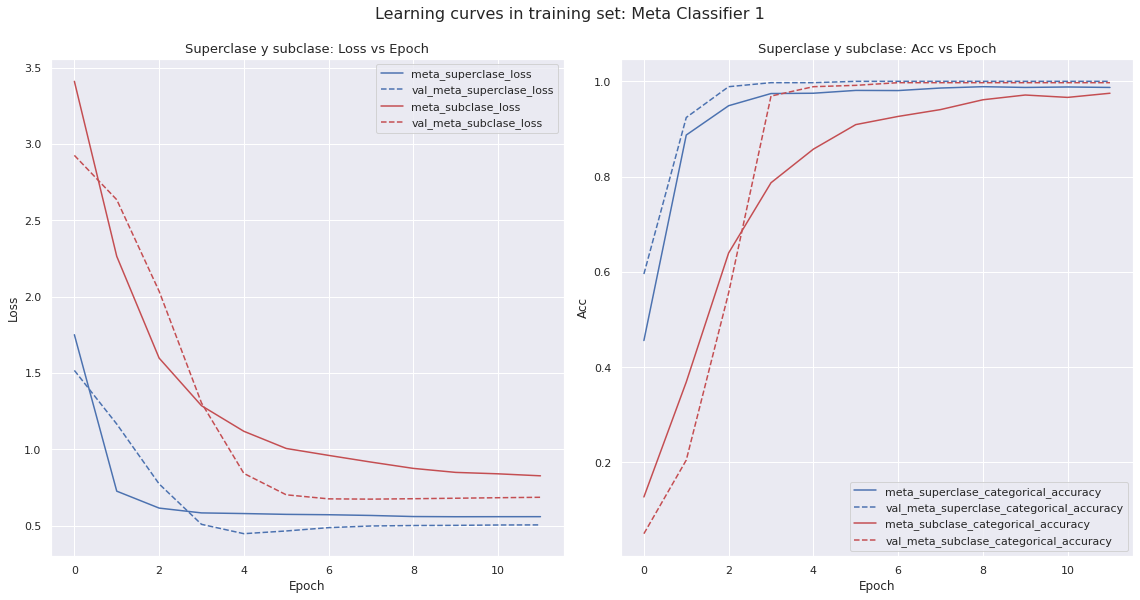

In [ ]:
plot(df=df_meta_1, model='Meta Classifier 1')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model_meta_2/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history_meta_2 = meta_classifier_2.fit(train_dataset_11, epochs=50, validation_data=val_dataset_11, callbacks=callbacks_list)

Epoch 1/50
101/101 [==============================] - 408s 1s/step - loss: 4.5814 - meta_superclase_loss: 1.2385 - meta_subclase_loss: 3.3428 - meta_superclase_categorical_accuracy: 0.6532 - meta_subclase_categorical_accuracy: 0.1289 - val_loss: 4.3624 - val_meta_superclase_loss: 1.5178 - val_meta_subclase_loss: 2.8446 - val_meta_superclase_categorical_accuracy: 0.4073 - val_meta_subclase_categorical_accuracy: 0.1854
Epoch 2/50
101/101 [==============================] - 109s 1s/step - loss: 2.9217 - meta_superclase_loss: 0.6698 - meta_subclase_loss: 2.2518 - meta_superclase_categorical_accuracy: 0.9217 - meta_subclase_categorical_accuracy: 0.3811 - val_loss: 3.6976 - val_meta_superclase_loss: 1.2021 - val_meta_subclase_loss: 2.4955 - val_meta_superclase_categorical_accuracy: 0.7556 - val_meta_subclase_categorical_accuracy: 0.4073
Epoch 3/50
101/101 [==============================] - 106s 1s/step - loss: 2.2841 - meta_superclase_loss: 0.6108 - meta_subclase_loss: 1.6734 - meta_superclas

In [ ]:
! cp -r '/content/checkpoint_model_meta_2' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df_meta_2 = pd.DataFrame(history_meta_2.history)

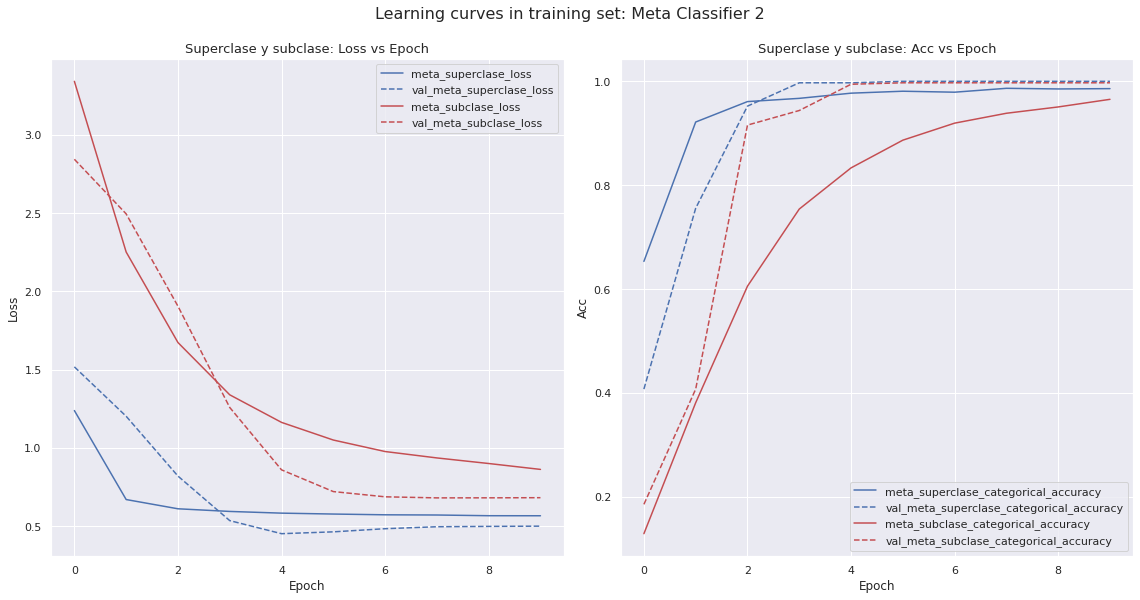

In [ ]:
plot(df=df_meta_2, model='Meta Classifier 2')

### Cargar los pesos de entrenamiento 1

In [56]:
model1.load_weights(path+'checkpoint_model1/checkpoints')
model2.load_weights(path+'checkpoint_model2/checkpoints')
model3.load_weights(path+'checkpoint_model3/checkpoints')
model4.load_weights(path+'checkpoint_model4/checkpoints')
model5.load_weights(path+'checkpoint_model5/checkpoints')
model6.load_weights(path+'checkpoint_model6/checkpoints')
model7.load_weights(path+'checkpoint_model7/checkpoints')
model8.load_weights(path+'checkpoint_model8/checkpoints')
model9.load_weights(path+'checkpoint_model9/checkpoints')
model10.load_weights(path+'checkpoint_model10/checkpoints')

### Cargar los pesos de entrenamiento 2

In [57]:
model1_1.load_weights(path+'checkpoint_model1_1/checkpoints')
model2_2.load_weights(path+'checkpoint_model2_2/checkpoints')
model3_3.load_weights(path+'checkpoint_model3_3/checkpoints')
model4_4.load_weights(path+'checkpoint_model4_4/checkpoints')
model5_5.load_weights(path+'checkpoint_model5_5/checkpoints')
model6_6.load_weights(path+'checkpoint_model6_6/checkpoints')
model7_7.load_weights(path+'checkpoint_model7_7/checkpoints')
model8_8.load_weights(path+'checkpoint_model8_8/checkpoints')
model9_9.load_weights(path+'checkpoint_model9_9/checkpoints')
model10_10.load_weights(path+'checkpoint_model10_10/checkpoints')

### Cargar los pesos de Meta Classifier

In [ ]:
meta_classifier_1.load_weights(path+'checkpoint_model_meta_1/checkpoints')
meta_classifier_2.load_weights(path+'checkpoint_model_meta_2/checkpoints')

### Modelo considerando la superclase o subclase

In [58]:
def get_model_superclase(input_shape, seed):

  tf.random.set_seed(seed)

  imagen = Input(shape=input_shape)
  subclase = Input(shape=(20, ))

  h_subclase = Dense(512, tfa.activations.gelu)(subclase)
  h_subclase = BatchNormalization()(h_subclase)
  h_subclase = Dense(512, tfa.activations.gelu)(h_subclase)


  h = DataAugmentation()(imagen)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.ResNet152V2(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h = ResidualBlockDenseNet()(model.output)

  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h) 
  h = Dense(512, activation=tfa.activations.gelu, name='dense_superclase')(h)
  concat = tf.keras.layers.concatenate([h, h_subclase]) 
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  superclase_pred = Dense(6, activation='softmax', name='superclase')(h)

  model = Model(inputs=[imagen, subclase], outputs=superclase_pred)

  model.compile(optimizer=tfa.optimizers.RectifiedAdam(learning_rate=1e-4),
                loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                metrics=['categorical_accuracy'])

  return model

In [59]:
def get_model_subclase(input_shape, seed): 
  
  tf.random.set_seed(seed)

  imagen = Input(shape=input_shape)
  superclase = Input(shape=(6, ))

  h_superclase = Dense(512, tfa.activations.gelu)(superclase)
  h_superclase = BatchNormalization()(h_superclase)
  h_superclase = Dense(512, tfa.activations.gelu)(h_superclase)

  h = DataAugmentation()(imagen)
  h = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.10)(h)

  model = tf.keras.applications.Xception(
      input_shape=None,
      include_top=False,
      weights='imagenet',
      input_tensor=h,
      pooling=None
  )

  model.trainable = False

  for layer in model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
      layer.trainable = True

  h = ResidualBlockDenseNet()(model.output)
 
  for i in range(5):
    h = ResidualBlockDenseNet()(h)

  h = TransitionLayer()(h) 
  h = Flatten()(h)
  h = Dense(512, activation=tfa.activations.gelu, name='dense_subclase')(h) 
  concat = tf.keras.layers.concatenate([h, h_superclase])
  h = BatchNormalization()(concat)
  h = Dropout(0.4)(h)

  subclase_pred = Dense(20, activation='softmax', name='subclase')(h)

  model = Model(inputs=[imagen, superclase], outputs=subclase_pred)

  model.compile(optimizer=tfa.optimizers.RectifiedAdam(learning_rate=1e-4),
                loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                metrics=['categorical_accuracy'])

  return model

In [60]:
model_superclase = get_model_superclase(input_shape=(256, 256, 3), seed=12)
model_subclase = get_model_subclase(input_shape=(256, 256, 3), seed=123)

### Entrenamiento

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model_superclase/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history_superclase = model_superclase.fit(train_dataset_superclase, epochs=50, validation_data=val_dataset_superclase, callbacks=callbacks_list)

Epoch 1/50
48/48 [==============================] - 284s 1s/step - loss: 2.1971 - categorical_accuracy: 0.2916 - val_loss: 1.6212 - val_categorical_accuracy: 0.4015
Epoch 2/50
48/48 [==============================] - 21s 430ms/step - loss: 1.2398 - categorical_accuracy: 0.6511 - val_loss: 1.4194 - val_categorical_accuracy: 0.5019
Epoch 3/50
48/48 [==============================] - 21s 436ms/step - loss: 0.8257 - categorical_accuracy: 0.8486 - val_loss: 1.3569 - val_categorical_accuracy: 0.5725
Epoch 4/50
48/48 [==============================] - 20s 426ms/step - loss: 0.7054 - categorical_accuracy: 0.9124 - val_loss: 1.2652 - val_categorical_accuracy: 0.6617
Epoch 5/50
48/48 [==============================] - 20s 426ms/step - loss: 0.6562 - categorical_accuracy: 0.9454 - val_loss: 1.2185 - val_categorical_accuracy: 0.6394
Epoch 6/50
48/48 [==============================] - 21s 439ms/step - loss: 0.6206 - categorical_accuracy: 0.9612 - val_loss: 1.1608 - val_categorical_accuracy: 0.6729


In [ ]:
! cp -r '/content/checkpoint_model_superclase' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df_superclase = pd.DataFrame(history_superclase.history)

In [ ]:
def plot(df, tipo):

  # create figure (fig), and array of axes (ax)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
  fig.suptitle('Learning curves in training set', fontsize=16, y=1.04)

  ax[0].plot(df.index, df['loss'], 'b', label=tipo+'loss')
  ax[0].plot(df.index, df['val_loss'], 'r', label='val_loss')
  ax[0].set_title(tipo+': Loss vs Epoch', fontsize=13)
  ax[0].set_ylabel('Loss')
  ax[0].set_xlabel('Epoch')
  ax[0].legend()

  ax[1].plot(df.index, df['categorical_accuracy'], 'b', label='categorical_accuracy')
  ax[1].plot(df.index, df['val_categorical_accuracy'], 'r', label='val_categorical_accuracy')
  ax[1].set_title(tipo+': Acc vs Epoch', fontsize=13)
  ax[1].set_ylabel('Acc')
  ax[1].set_xlabel('Epoch')
  ax[1].legend()

  plt.tight_layout()
  plt.legend()
  plt.show()

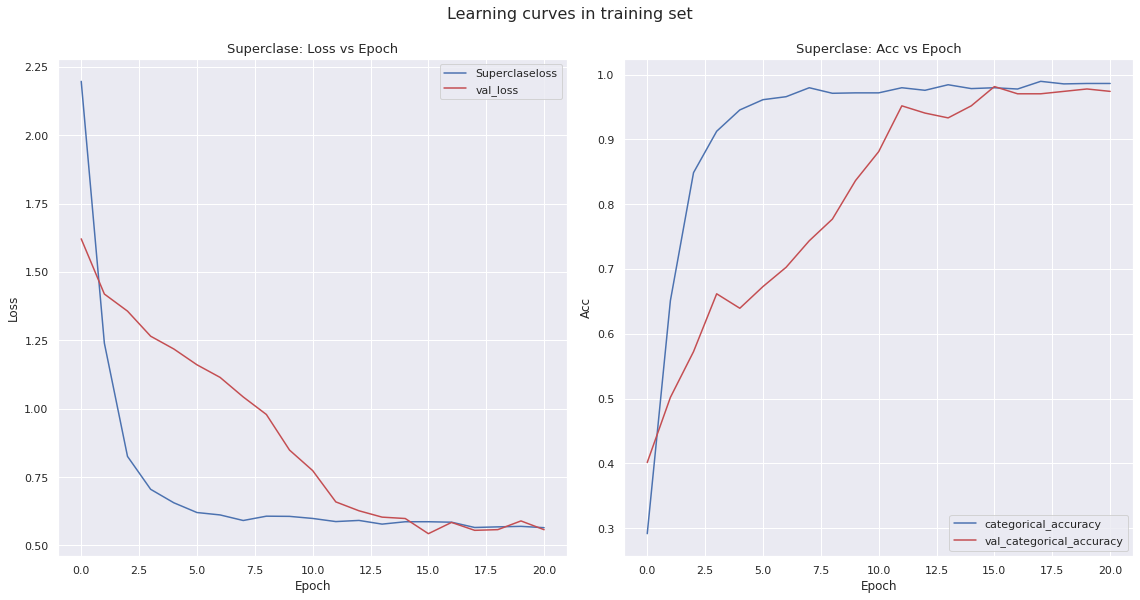

In [ ]:
plot(df=df_superclase, tipo='Superclase')

In [ ]:
# Callbacks for the model

#checkpoint
checkpoint_path = 'checkpoint_model_subclase/checkpoints'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True)

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history_subclase = model_subclase.fit(train_dataset_subclase, epochs=50, validation_data=val_dataset_subclase, callbacks=callbacks_list)

Epoch 1/50
95/95 [==============================] - 296s 537ms/step - loss: 3.3107 - categorical_accuracy: 0.1751 - val_loss: 2.6757 - val_categorical_accuracy: 0.2285
Epoch 2/50
95/95 [==============================] - 29s 308ms/step - loss: 1.7523 - categorical_accuracy: 0.5588 - val_loss: 2.0321 - val_categorical_accuracy: 0.5243
Epoch 3/50
95/95 [==============================] - 30s 318ms/step - loss: 1.3511 - categorical_accuracy: 0.7287 - val_loss: 1.5818 - val_categorical_accuracy: 0.6610
Epoch 4/50
95/95 [==============================] - 31s 322ms/step - loss: 1.1406 - categorical_accuracy: 0.8275 - val_loss: 1.2854 - val_categorical_accuracy: 0.7903
Epoch 5/50
95/95 [==============================] - 30s 317ms/step - loss: 1.0259 - categorical_accuracy: 0.8896 - val_loss: 1.0929 - val_categorical_accuracy: 0.8558
Epoch 6/50
95/95 [==============================] - 31s 324ms/step - loss: 0.9858 - categorical_accuracy: 0.9111 - val_loss: 0.9224 - val_categorical_accuracy: 0.92

In [ ]:
! cp -r '/content/checkpoint_model_subclase' '/content/drive/MyDrive/Intro a las redes neuronales/Tareas/Tarea 2'

In [ ]:
df_subclase = pd.DataFrame(history_subclase.history)

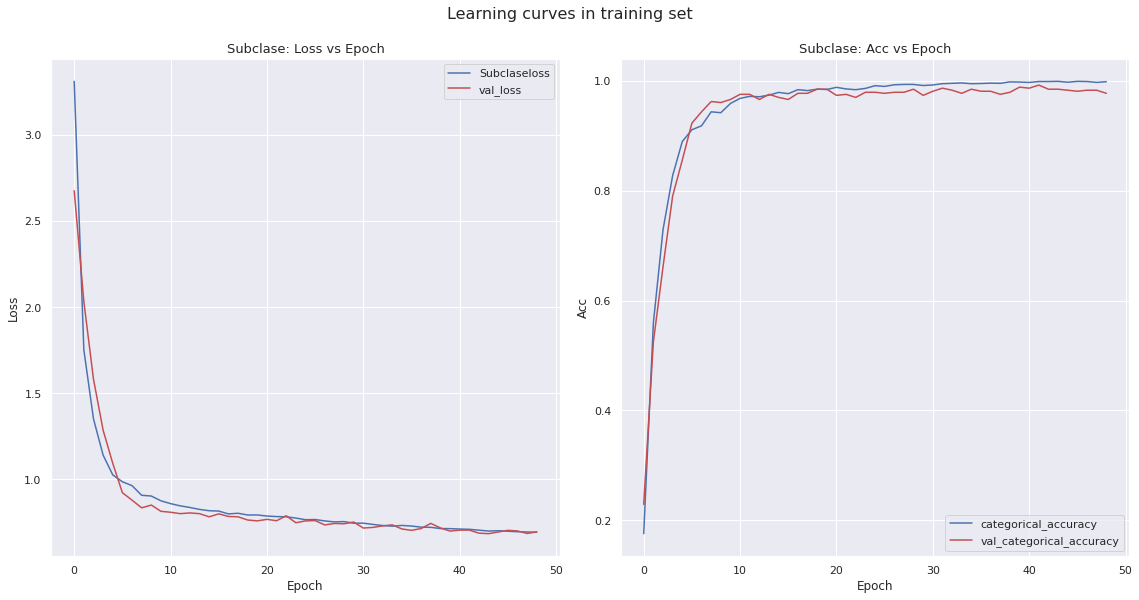

In [ ]:
plot(df=df_subclase, tipo='Subclase')

### Cargar los pesos

In [61]:
model_superclase.load_weights(path+'checkpoint_model_superclase/checkpoints')
model_subclase.load_weights(path+'checkpoint_model_subclase/checkpoints')

### Prediccion

#### Prediccion con los 22 modelos

In [62]:
test_dataset = test_dataset.batch(1)

In [70]:
pred = []                       

white_list = ['0 6', '0 7', '0 8', '0 9', '1 10', '1 11', '1 12', '1 13', '1 14', '1 23', '2 15', '2 16',
              '3 17', '3 18', '4 19', '4 20', '4 21', '4 22', '5 15', '5 23', '5 24', '5 25']

for element in test_dataset.as_numpy_iterator():

  probs_superclase_1, probs_subclase_1 = model1.predict(element)
  probs_superclase_2, probs_subclase_2 = model2.predict(element)
  probs_superclase_3, probs_subclase_3 = model3.predict(element)
  probs_superclase_4, probs_subclase_4 = model4.predict(element)
  probs_superclase_5, probs_subclase_5 = model5.predict(element)
  probs_superclase_6, probs_subclase_6 = model6.predict(element)
  probs_superclase_7, probs_subclase_7 = model7.predict(element)
  probs_superclase_8, probs_subclase_8 = model8.predict(element)
  probs_superclase_9, probs_subclase_9 = model9.predict(element)
  probs_superclase_10, probs_subclase_10 = model10.predict(element)
  probs_superclase_1_1, probs_subclase_1_1 = model1_1.predict(element)
  probs_superclase_2_2, probs_subclase_2_2 = model2_2.predict(element)
  probs_superclase_3_3, probs_subclase_3_3 = model3_3.predict(element)
  probs_superclase_4_4, probs_subclase_4_4 = model4_4.predict(element)
  probs_superclase_5_5, probs_subclase_5_5 = model5_5.predict(element)
  probs_superclase_6_6, probs_subclase_6_6 = model6_6.predict(element)
  probs_superclase_7_7, probs_subclase_7_7 = model7_7.predict(element)
  probs_superclase_8_8, probs_subclase_8_8 = model8_8.predict(element)
  probs_superclase_9_9, probs_subclase_9_9 = model9_9.predict(element)
  probs_superclase_10_10, probs_subclase_10_10 = model10_10.predict(element)
  
  candidatos_superclase = []
  candidatos_subclase = []

  candidatos_superclase.append(probs_superclase_1)
  candidatos_subclase.append(probs_subclase_1)
  candidatos_superclase.append(probs_superclase_2)
  candidatos_subclase.append(probs_subclase_2)
  candidatos_superclase.append(probs_superclase_3)
  candidatos_subclase.append(probs_subclase_3)
  candidatos_superclase.append(probs_superclase_4)
  candidatos_subclase.append(probs_subclase_4)
  candidatos_superclase.append(probs_superclase_5)
  candidatos_subclase.append(probs_subclase_5)
  candidatos_superclase.append(probs_superclase_6)
  candidatos_subclase.append(probs_subclase_6)
  candidatos_superclase.append(probs_superclase_7)
  candidatos_subclase.append(probs_subclase_7)
  candidatos_superclase.append(probs_superclase_8)
  candidatos_subclase.append(probs_subclase_8)
  candidatos_superclase.append(probs_superclase_9)
  candidatos_subclase.append(probs_subclase_9)
  candidatos_superclase.append(probs_superclase_10)
  candidatos_subclase.append(probs_subclase_10)
  candidatos_superclase.append(probs_superclase_1_1)
  candidatos_subclase.append(probs_subclase_1_1)
  candidatos_superclase.append(probs_superclase_2_2)
  candidatos_subclase.append(probs_subclase_2_2)
  candidatos_superclase.append(probs_superclase_3_3)
  candidatos_subclase.append(probs_subclase_3_3)
  candidatos_superclase.append(probs_superclase_4_4)
  candidatos_subclase.append(probs_subclase_4_4)
  candidatos_superclase.append(probs_superclase_5_5)
  candidatos_subclase.append(probs_subclase_5_5)
  candidatos_superclase.append(probs_superclase_6_6)
  candidatos_subclase.append(probs_subclase_6_6)
  candidatos_superclase.append(probs_superclase_7_7)
  candidatos_subclase.append(probs_subclase_7_7)
  candidatos_superclase.append(probs_superclase_8_8)
  candidatos_subclase.append(probs_subclase_8_8)
  candidatos_superclase.append(probs_superclase_9_9)
  candidatos_subclase.append(probs_subclase_9_9)
  candidatos_superclase.append(probs_superclase_10_10)
  candidatos_subclase.append(probs_subclase_10_10)

  pred_superclase = np.argmax(np.sum(candidatos_superclase, axis=0))
  pred_subclase = lb_train_over.classes_[np.argmax(np.sum(candidatos_subclase, axis=0))]

  prediccion = str(pred_superclase)+' '+str(pred_subclase)

  if(prediccion not in white_list): # prediccion que viola la restriccion de jerarquia

    print('Prediccion que viola la restriccion de jerarquia: ', prediccion)

    if(np.max(np.mean(candidatos_superclase, axis=0)) >= np.max(np.mean(candidatos_subclase, axis=0))): # Tengo mas confianza en la superclase
    
      pred_sup = lb_subclase_sup.transform([pred_superclase])[0]
      probs_sub = model_subclase.predict((element, pred_sup[np.newaxis, ...]))
      probs_sub = probs_sub * 0.7 + np.mean(candidatos_subclase, axis=0) * 0.3
      pred_sub = lb_subclase_sub.classes_[np.argmax(probs_sub)]
      new_prediccion = str(pred_superclase)+' '+str(pred_sub)

      if(new_prediccion in white_list):
        prediccion = new_prediccion

      else:

        pred_sub = lb_subclase_sub.transform([pred_subclase])[0]
        probs_sup = model_superclase.predict((element, pred_sub[np.newaxis, ...]))
        probs_sup = probs_sup * 0.7 + np.mean(candidatos_superclase, axis=0) * 0.3
        pred_sup = lb_superclase_sup.classes_[np.argmax(probs_sup)]
        new_prediccion = str(pred_sup)+' '+str(pred_subclase)

        if(new_prediccion in white_list):
          prediccion = new_prediccion
      
    else:


      pred_sub = lb_subclase_sub.transform([pred_subclase])[0]
      probs_sup = model_superclase.predict((element, pred_sub[np.newaxis, ...]))
      probs_sup = probs_sup * 0.7 + np.mean(candidatos_superclase, axis=0) * 0.3
      pred_sup = lb_superclase_sup.classes_[np.argmax(probs_sup)]
      new_prediccion = str(pred_sup)+' '+str(pred_subclase)

      if(new_prediccion in white_list):
        prediccion = new_prediccion

      else:

        pred_sup = lb_subclase_sup.transform([pred_superclase])[0]
        probs_sub = model_subclase.predict((element, pred_sup[np.newaxis, ...]))
        probs_sub = probs_sub * 0.7 + np.mean(candidatos_subclase, axis=0) * 0.3
        pred_sub = lb_subclase_sub.classes_[np.argmax(probs_sub)]
        new_prediccion = str(pred_superclase)+' '+str(pred_sub)

        if(new_prediccion in white_list):
          prediccion = new_prediccion

    print('Prediccion que violaba la restriccion de jerarquia ahora es : ', prediccion)

  pred.append(prediccion)

Prediccion que viola la restriccion de jerarquia:  0 17
Prediccion que violaba la restriccion de jerarquia ahora es :  3 17
Prediccion que viola la restriccion de jerarquia:  3 23
Prediccion que violaba la restriccion de jerarquia ahora es :  5 23
Prediccion que viola la restriccion de jerarquia:  0 23
Prediccion que violaba la restriccion de jerarquia ahora es :  5 23
Prediccion que viola la restriccion de jerarquia:  0 17
Prediccion que violaba la restriccion de jerarquia ahora es :  3 17
Prediccion que viola la restriccion de jerarquia:  4 15
Prediccion que violaba la restriccion de jerarquia ahora es :  2 15
Prediccion que viola la restriccion de jerarquia:  1 19
Prediccion que violaba la restriccion de jerarquia ahora es :  4 19
Prediccion que viola la restriccion de jerarquia:  1 15
Prediccion que violaba la restriccion de jerarquia ahora es :  1 10
Prediccion que viola la restriccion de jerarquia:  1 20
Prediccion que violaba la restriccion de jerarquia ahora es :  1 10
Predicci

In [71]:
cantidad = 0
for prediccion in pred:
  if(prediccion not in white_list):
    cantidad+=1

print('Cantidad de predicciones que violan la restriccion de jerarquia =', cantidad)

Cantidad de predicciones que violan la restriccion de jerarquia = 0


In [72]:
df_test['classes'] = pred

In [73]:
df_test.head()

id classes
0  1400.jpg    4 19
1  1402.jpg     0 6
2  1403.jpg     0 9
3  1404.jpg     0 6
4  1405.jpg    1 23

In [74]:
df_test.to_csv('predicciones.csv', columns=['id', 'classes'], index=False)